**Team 23A - Galaxy Rangers**

- Evi Sigalingging (SC62306)
- Winda Belinda (SC62318)
- Ayu Nursafitri (SC62302)
- Sultan Shalahuddin (SC62324)
- Nicholas Noel (SC62308)

**Judul Project** : Segmentasi Pengguna pada tiap Provinsi Berdasarkan
Transaksi untuk Optimalisasi Penawaran Produk dalam
Aplikasi Perusahaan Super App menggunakan Metode
K-Means Clustering.

# Dataset

In [ ]:
# Mengimport library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Mengabaikan semua peringatan
warnings.filterwarnings('ignore')

In [ ]:
# Menghubungkan google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Memuat dataset dan menyimpannya ke dalam variabel
location_reference = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/location_reference.csv")
product_reference = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/product_reference .csv")
user = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/user.csv")
transaction_35 = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/trx/35_processed.csv")
transaction_12 = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/trx/12_processed.csv")
transaction_13 = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/trx/13_processed.csv")
transaction_94 = pd.read_csv("/content/drive/MyDrive/Tim 23A Final Project Drive/dataset-1/trx/94_processed.csv")

In [ ]:
# Menampilkan 5 data teratas dari dataset user
user.head(5)

id               full_name     gender  money_spent    refund  \
0  SC7502062007001          PRIYANTI FIORI  perempuan    2270000.0  130000.0   
1  SC7502062007002  KURNIA MUHAMAD WANIMBO  laki-laki    2370000.0  140000.0   
2  SC7502062007003           AJENG LESTARI  perempuan          0.0       0.0   
3  SC7502062007004         TIA IRIANI S.E.  perempuan          0.0       0.0   
4  SC7502062006001                    ANCE  perempuan          0.0       0.0   

   wallet_balance   join_date       birth  
0        480000.0  2023-11-05  1984-07-25  
1        500000.0  2023-12-27  1991-02-12  
2             0.0  2024-07-19  1982-06-18  
3             0.0  2024-05-24  1972-09-27  
4             0.0  2024-11-25  1992-06-11

In [ ]:
# Menampilkan Informasi dari dataset user
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427486 entries, 0 to 427485
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              427486 non-null  object 
 1   full_name       427486 non-null  object 
 2   gender          427486 non-null  object 
 3   money_spent     427484 non-null  float64
 4   refund          427484 non-null  float64
 5   wallet_balance  427484 non-null  float64
 6   join_date       427486 non-null  object 
 7   birth           427486 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.1+ MB


In [ ]:
# Menampilakan 5 data teratas dari dataset location_reference
location_reference.head(5)

nama provinsi  kode provinsi nama kabupaten kode kabupaten  \
0     GORONTALO             75        BOALEMO           7502   
1     GORONTALO             75        BOALEMO           7502   
2     GORONTALO             75        BOALEMO           7502   
3     GORONTALO             75        BOALEMO           7502   
4     GORONTALO             75        BOALEMO           7502   

     nama kecamatan kode kecamatan  
0         BOTUMOITO         750206  
1            DULUPI         750203  
2          MANANGGU         750205  
3         PAGUYAMAN         750201  
4  PAGUYAMAN PANTAI         750207

In [ ]:
# Menampilkan informasi dari dataset location_reference
location_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nama provinsi   7407 non-null   object
 1   kode provinsi   7407 non-null   int64 
 2   nama kabupaten  7407 non-null   object
 3   kode kabupaten  7407 non-null   object
 4   nama kecamatan  7407 non-null   object
 5   kode kecamatan  7407 non-null   object
dtypes: int64(1), object(5)
memory usage: 347.3+ KB


In [ ]:
# Menampilkan 5 data teratas dari dataset product_reference
product_reference.head(5)

id            product name
0   1             Man Fashion
1   2           Woman Fashion
2   3            Food & Drink
3   4            Ride Hailing
4   5  Keperluan Rumah Tangga

In [ ]:
# Menampilkan informasi dari datasset product_reference
product_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18 non-null     int64 
 1   product name  18 non-null     object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [ ]:
# Menampilkan 5 data teratas dari dataset transaction_35
transaction_35.head(5)

id          user_id  product_id  gross_amount  discounts  \
0  TRX443072  SC3526052001006           1      519700.0        NaN   
1  TRX443073  SC3526052001006           1      185000.0        NaN   
2  TRX443074  SC3526052001006           1      488400.0   248200.0   
3  TRX443075  SC3526052001006           1      706900.0   551800.0   
4  TRX443076  SC3526052001006          14      128500.0        NaN   

  transaction_date  
0       2024-05-19  
1       2024-01-06  
2       2024-02-03  
3       2024-07-01  
4       2024-11-04

In [ ]:
# Menampilkan 5 data teratas dari dataset transaction_12
transaction_12.head(5)

id          user_id  product_id  gross_amount  discounts  \
0  TRX693205  SC1209182013002           2       68800.0        NaN   
1  TRX693206  SC1209182013002           2       24100.0        NaN   
2  TRX693207  SC1209182013002           2       91900.0    42900.0   
3  TRX693208  SC1209182013002           2       25200.0     7100.0   
4  TRX693209  SC1209182013002           3       23500.0        NaN   

  transaction_date  
0       2024-11-07  
1       2024-03-01  
2       2024-10-25  
3       2024-03-30  
4       2024-02-10

In [ ]:
# Menampilkan 5 data teratas dari dataset transaction_13
transaction_13.head(5)

id          user_id  product_id  gross_amount  discounts  \
0  TRX258654  SC1306072005001           1       21800.0        NaN   
1  TRX258655  SC1306072005001           1       28600.0        NaN   
2  TRX258656  SC1306072005001           1       29600.0    29600.0   
3  TRX258657  SC1306072005001           2       59000.0        NaN   
4  TRX258658  SC1306072005001           2       22400.0        NaN   

  transaction_date  
0       2024-03-22  
1       2024-05-24  
2       2024-09-08  
3       2024-06-03  
4       2024-08-15

In [ ]:
# Menampilkan 5 data teratas dari dataset transaction_94
transaction_94.head(5)

id          user_id  product_id  gross_amount  discounts  \
0  TRX722042  SC9404152007902           1       41700.0        NaN   
1  TRX722043  SC9404152007902           1        9300.0        NaN   
2  TRX722044  SC9404152007902           1       27100.0    27100.0   
3  TRX722045  SC9404152007902           1       41900.0    12900.0   
4  TRX722046  SC9404152007902           2       68200.0        NaN   

  transaction_date  
0       2024-05-24  
1       2024-04-11  
2       2024-05-08  
3       2024-05-17  
4       2024-01-13

In [ ]:
# Menampilkan informasi dari dataset transaction_35
transaction_35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261196 entries, 0 to 2261195
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 103.5+ MB


In [ ]:
# Menampilkan informasi dari dataset transaction_12
transaction_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408582 entries, 0 to 408581
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                408582 non-null  object 
 1   user_id           408582 non-null  object 
 2   product_id        408582 non-null  int64  
 3   gross_amount      406005 non-null  float64
 4   discounts         106036 non-null  float64
 5   transaction_date  408582 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 18.7+ MB


In [ ]:
# Menampilkan informasi dari dataset transaction_13
transaction_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391292 entries, 0 to 391291
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                391292 non-null  object 
 1   user_id           391292 non-null  object 
 2   product_id        391292 non-null  int64  
 3   gross_amount      389081 non-null  float64
 4   discounts         106806 non-null  float64
 5   transaction_date  391292 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 17.9+ MB


In [ ]:
# Menampilkan informasi dari dataset transaction_94
transaction_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3065 non-null   object 
 1   user_id           3065 non-null   object 
 2   product_id        3065 non-null   int64  
 3   gross_amount      3057 non-null   float64
 4   discounts         808 non-null    float64
 5   transaction_date  3065 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 143.8+ KB


Column Rename for Table Join

In [ ]:
# Mengubah nama tabel untuk join tabel
transaction_35 = transaction_35.rename(columns={'id': 'trx_id'})
transaction_12 = transaction_12.rename(columns={'id': 'trx_id'})
transaction_13 = transaction_13.rename(columns={'id': 'trx_id'})
transaction_94 = transaction_94.rename(columns={'id': 'trx_id'})
product_reference = product_reference.rename(columns={'id': 'product_id'})
user = user.rename(columns={'id': 'user_id'})

Code diatas akan mengubah nama kolom pada tabel transaksi, product_reference dan user agar dapat dilakukan left join antar tabel, dimana kolom tersebut sebagai penghubung antara dua tabel

In [ ]:
# Menambahkan kolom baru pada tabel user dengan nama "kode kecamatan" agar bisa di join dengan location reference
user['kode kecamatan'] = user['user_id'].str[2:8]

In [ ]:
# Menampilkan 5 data teratas dari user setelah dilakukan penambahan kolom
user.head(5)

user_id               full_name     gender  money_spent    refund  \
0  SC7502062007001          PRIYANTI FIORI  perempuan    2270000.0  130000.0   
1  SC7502062007002  KURNIA MUHAMAD WANIMBO  laki-laki    2370000.0  140000.0   
2  SC7502062007003           AJENG LESTARI  perempuan          0.0       0.0   
3  SC7502062007004         TIA IRIANI S.E.  perempuan          0.0       0.0   
4  SC7502062006001                    ANCE  perempuan          0.0       0.0   

   wallet_balance   join_date       birth kode kecamatan  
0        480000.0  2023-11-05  1984-07-25         750206  
1        500000.0  2023-12-27  1991-02-12         750206  
2             0.0  2024-07-19  1982-06-18         750206  
3             0.0  2024-05-24  1972-09-27         750206  
4             0.0  2024-11-25  1992-06-11         750206

# Jawa Timur (TRX 35)

## Data Preparation

**Data Merging**

Dilakukan data merging pada 4 tabel : transaction_35, product_reference, user, dan location_reference untuk melihat sekiranya informasi apa yang dapat diambil dari keseluruhan tabel.

In [ ]:
# Melihat tabel transaction_35
transaction_35

trx_id          user_id  product_id  gross_amount  discounts  \
0         TRX443072  SC3526052001006           1      519700.0        NaN   
1         TRX443073  SC3526052001006           1      185000.0        NaN   
2         TRX443074  SC3526052001006           1      488400.0   248200.0   
3         TRX443075  SC3526052001006           1      706900.0   551800.0   
4         TRX443076  SC3526052001006          14      128500.0        NaN   
...             ...              ...         ...           ...        ...   
2261191  TRX2704263  SC3504011002014          16           NaN        NaN   
2261192  TRX2704264  SC3504011002014          17       12400.0        NaN   
2261193  TRX2704265  SC3504011002014          17        4800.0        NaN   
2261194  TRX2704266  SC3504011002014          17       44300.0        NaN   
2261195  TRX2704267  SC3504011002014          17       38500.0        NaN   

        transaction_date  
0             2024-05-19  
1             2024-01-06  
2             2024-02-03  
3             2024-07-01  
4             2024-11-04  
...                  ...  
2261191       2024-09-11  
2261192       2024-08-26  
2261193       2024-02-25  
2261194       2024-10-19  
2261195       2024-09-14  

[2261196 rows x 6 columns]

In [ ]:
# Melakukan left join berdasarkan kolom 'Product ID'
product_transaction_35 = pd.merge(transaction_35, product_reference, on='product_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel transaction_35 dan product_reference bernama product_transaction
product_transaction_35.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX443072  SC3526052001006           1      519700.0        NaN   
1  TRX443073  SC3526052001006           1      185000.0        NaN   
2  TRX443074  SC3526052001006           1      488400.0   248200.0   
3  TRX443075  SC3526052001006           1      706900.0   551800.0   
4  TRX443076  SC3526052001006          14      128500.0        NaN   

  transaction_date product name  
0       2024-05-19  Man Fashion  
1       2024-01-06  Man Fashion  
2       2024-02-03  Man Fashion  
3       2024-07-01  Man Fashion  
4       2024-11-04    Kesehatan

In [ ]:
# Melakukan left join berdasarkan kolom 'User ID'
user_transaction_35 = pd.merge(product_transaction_35, user, on='user_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel product_transaction_35 dan user bernama user_transaction_35
user_transaction_35.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX443072  SC3526052001006           1      519700.0        NaN   
1  TRX443073  SC3526052001006           1      185000.0        NaN   
2  TRX443074  SC3526052001006           1      488400.0   248200.0   
3  TRX443075  SC3526052001006           1      706900.0   551800.0   
4  TRX443076  SC3526052001006          14      128500.0        NaN   

  transaction_date product name               full_name     gender  \
0       2024-05-19  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
1       2024-01-06  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
2       2024-02-03  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
3       2024-07-01  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
4       2024-11-04    Kesehatan  Ir. SENJAYAWATI S.Sos.  perempuan   

   money_spent  refund  wallet_balance   join_date       birth kode kecamatan  
0    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605  
1    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605  
2    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605  
3    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605  
4    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605

In [ ]:
# Melakukan left join berdasarkan kolom 'kode kecamatan'
data_35 = pd.merge(user_transaction_35, location_reference, on='kode kecamatan', how='left')

#  Melihat 5 data teratas dari hasil merging tabel user_transaction_35 dan  location_reference bernama data_35
data_35.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX443072  SC3526052001006           1      519700.0        NaN   
1  TRX443073  SC3526052001006           1      185000.0        NaN   
2  TRX443074  SC3526052001006           1      488400.0   248200.0   
3  TRX443075  SC3526052001006           1      706900.0   551800.0   
4  TRX443076  SC3526052001006          14      128500.0        NaN   

  transaction_date product name               full_name     gender  \
0       2024-05-19  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
1       2024-01-06  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
2       2024-02-03  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
3       2024-07-01  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
4       2024-11-04    Kesehatan  Ir. SENJAYAWATI S.Sos.  perempuan   

   money_spent  refund  wallet_balance   join_date       birth kode kecamatan  \
0    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605   
1    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605   
2    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605   
3    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605   
4    2220000.0     0.0        750000.0  2023-12-08  1996-01-26         352605   

  nama provinsi  kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
1    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
2    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
3    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
4    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA

In [ ]:
# Melihat 5 sampel data
data_35.sample(5)

trx_id          user_id  product_id  gross_amount  discounts  \
151612    TRX594684  SC3505062005023           2       14700.0        NaN   
1343493  TRX1786565  SC3516182006010          15        6600.0        NaN   
897511   TRX1340583  SC3578041003010          12       12400.0        NaN   
1249239  TRX1692311  SC3507042005014           3       75300.0    58100.0   
1438908  TRX1881980  SC3518131008008           3       56500.0        NaN   

        transaction_date   product name              full_name     gender  \
151612        2024-12-08  Woman Fashion                  ENDAH  perempuan   
1343493       2024-12-29      Investasi                YUSNANI  perempuan   
897511        2024-07-09       Otomotif  MAJIDARIANI DAMAYANTI  perempuan   
1249239       2024-07-09   Food & Drink     JUFRI Rosidah S.T.  perempuan   
1438908       2024-02-25   Food & Drink                   DEWI  perempuan   

         money_spent    refund  wallet_balance   join_date       birth  \
151612     1960000.0  420000.0        720000.0  2023-10-17  1993-06-17   
1343493    1810000.0  360000.0        850000.0  2023-12-15  1987-07-14   
897511     1380000.0  300000.0        780000.0  2023-12-23  1981-07-02   
1249239    1410000.0  100000.0        460000.0  2023-12-18  2003-05-26   
1438908    2010000.0  210000.0        680000.0  2023-10-21  1977-01-02   

        kode kecamatan nama provinsi  kode provinsi nama kabupaten  \
151612          350506    JAWA TIMUR             35         BLITAR   
1343493         351618    JAWA TIMUR             35      MOJOKERTO   
897511          357804    JAWA TIMUR             35  KOTA SURABAYA   
1249239         350704    JAWA TIMUR             35         MALANG   
1438908         351813    JAWA TIMUR             35        NGANJUK   

        kode kabupaten       nama kecamatan  
151612            3505              PONGGOK  
1343493           3516            MOJOANYAR  
897511            3578            WONOKROMO  
1249239           3507  SUMBERMANJING WETAN  
1438908           3518              NGANJUK

In [ ]:
# Melihat informasi dari data_35
data_35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261196 entries, 0 to 2261195
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   trx_id            object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   product name      object 
 7   full_name         object 
 8   gender            object 
 9   money_spent       float64
 10  refund            float64
 11  wallet_balance    float64
 12  join_date         object 
 13  birth             object 
 14  kode kecamatan    object 
 15  nama provinsi     object 
 16  kode provinsi     int64  
 17  nama kabupaten    object 
 18  kode kabupaten    object 
 19  nama kecamatan    object 
dtypes: float64(5), int64(2), object(13)
memory usage: 345.0+ MB


In [ ]:
# Melihat detail statistik dari data_35
data_35.describe()

product_id  gross_amount     discounts   money_spent        refund  \
count  2.261196e+06  2.247720e+06  7.122120e+05  2.261196e+06  2.261196e+06   
mean   8.233215e+00  5.906736e+04  3.191255e+04  1.937413e+06  2.356564e+05   
std    5.518552e+00  9.526087e+04  3.873891e+04  3.155844e+05  1.993690e+05   
min    1.000000e+00 -1.000000e+02 -1.000000e+02  0.000000e+00 -6.830000e+06   
25%    3.000000e+00  6.900000e+03  9.000000e+03  1.780000e+06  1.400000e+05   
50%    7.000000e+00  2.340000e+04  1.960000e+04  1.960000e+06  2.200000e+05   
75%    1.400000e+01  7.040000e+04  4.000000e+04  2.130000e+06  3.200000e+05   
max    1.800000e+01  2.899900e+06  1.238200e+06  8.850000e+06  2.238000e+07   

       wallet_balance  kode provinsi  
count    2.261196e+06      2261196.0  
mean     6.776956e+05           35.0  
std      5.046016e+06            0.0  
min     -6.470000e+06           35.0  
25%      5.100000e+05           35.0  
50%      6.600000e+05           35.0  
75%      8.100000e+05           35.0  
max      1.280390e+09           35.0

melihat kolom gross_amount, refund, discounts dan wallet_balance ada yang bernilai minus, kami menganggap kolom tersebut adalah anomali karena berdasarkan analisa kami, kolom tersebut tidak mungkin minus. Oleh karena itu, kami langsung melakukan drop baris pada kolom bernilai minus tersebut.

In [ ]:
# Kolom-kolom yang ingin dilakukan pengecekan baris berisi nilai minus
Columns = ['gross_amount', 'refund', 'discounts', 'wallet_balance']

# Menghapus baris dengan nilai minus di salah satu dari empat kolom
data_35 = data_35.drop(data_35[(data_35[Columns] < 0).any(axis=1)].index)

In [ ]:
# Mengecek detail statistik dari data yang sudah dihilangkan anomali pada data
data_35.describe()

product_id  gross_amount     discounts   money_spent        refund  \
count  2.243782e+06  2.230616e+06  7.067490e+05  2.243782e+06  2.243782e+06   
mean   8.231970e+00  5.906477e+04  3.191244e+04  1.936775e+06  2.389893e+05   
std    5.518497e+00  9.521696e+04  3.871054e+04  3.119363e+05  1.800156e+05   
min    1.000000e+00  1.110223e-12  8.673617e-14  0.000000e+00  0.000000e+00   
25%    3.000000e+00  6.900000e+03  9.000000e+03  1.780000e+06  1.400000e+05   
50%    7.000000e+00  2.340000e+04  1.960000e+04  1.960000e+06  2.300000e+05   
75%    1.400000e+01  7.040000e+04  4.000000e+04  2.130000e+06  3.200000e+05   
max    1.800000e+01  2.899900e+06  1.238200e+06  3.790000e+06  2.238000e+07   

       wallet_balance  kode provinsi  
count    2.243782e+06      2243782.0  
mean     6.910027e+05           35.0  
std      5.062272e+06            0.0  
min      0.000000e+00           35.0  
25%      5.100000e+05           35.0  
50%      6.600000e+05           35.0  
75%      8.100000e+05           35.0  
max      1.280390e+09           35.0

Dapat dilihat, nilai yang sebelumnya minus pada kolom gross_amount, refund, discounts dan wallet balance sudah dihilangkan.

**Check Missing Value**

In [ ]:
# Mengecek jumlah nilai null pada setiap kolom pada data_35
data_35.isnull().sum()

trx_id                    0
user_id                   0
product_id                0
gross_amount          13166
discounts           1537033
transaction_date          0
product name              0
full_name                 0
gender                    0
money_spent               0
refund                    0
wallet_balance            0
join_date                 0
birth                     0
kode kecamatan            0
nama provinsi             0
kode provinsi             0
nama kabupaten            0
kode kabupaten            0
nama kecamatan            0
dtype: int64

Terdapat nilai null pada discounts dan gross amount

In [ ]:
# Mengisi nilai discounts dengan nilai 0
data_35['discounts'] = data_35['discounts'].fillna(0)

Kami mengisi nilai discounts dengan 0 dengan asumsi nilai discounts yang kosong menandakan tidak adanya discount --> 0

In [ ]:
# Menghitung skewness hanya untuk kolom 'gross_amount' untuk menentukan cara mengisi nilai null pada gross_amount
skewness_gross_amount = data_35['gross_amount'].skew()

# Mencetak nilai skewness
print("Skewness untuk kolom 'gross_amount':", skewness_gross_amount)

Skewness untuk kolom 'gross_amount': 4.0614052314319995


Karena Right Skewness, digunakan median untuk mengisi missing value pada kolom gross_amount

In [ ]:
# Hitung nilai median dari kolom 'gross_amount'
median_gross_amount = data_35['gross_amount'].median()

# Mengisi nilai null dalam kolom 'gross_amount' dengan nilai median
data_35['gross_amount'].fillna(median_gross_amount, inplace=True)

In [ ]:
# Mengecek apakah masih ada nilai yang null
data_35.isnull().sum()

trx_id              0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
product name        0
full_name           0
gender              0
money_spent         0
refund              0
wallet_balance      0
join_date           0
birth               0
kode kecamatan      0
nama provinsi       0
kode provinsi       0
nama kabupaten      0
kode kabupaten      0
nama kecamatan      0
dtype: int64

Terdeteksi tidak ada lagi data yang kosong

**Data Duplikat**

In [ ]:
# Mengecek nilai duplikat
data_35.duplicated().sum()

0

Karena tidak adanya data duplikat, maka kita bisa lanjut ke langkah selanjutnya.

**Handling Outlier**

In [ ]:
# Kolom numerik yang dicek dan ditangani outliernya
outlier_check = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

In [ ]:
import numpy as np

# Fungsi untuk menghitung outlier
def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(data_35[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data_35[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Batas atas (Above Upper bound)
    upper = data_35[feature_name] >= (Q3 + 1.5 * IQR)

    # Batas bawah (Below Lower bound)
    lower = data_35[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))

In [ ]:
# Mencetak jumlah outlier sesuai feature yang ada pada variabel outlier_check

print("Number of Outlier values with respect to features : \n")

for feature in outlier_check:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

gross_amount  :  206322
discounts  :  363589
money_spent  :  55139
refund  :  49171
wallet_balance  :  35006


Dapat dilihat diatas adalah jumlah outlier yang ada pada fitur numerik

<Axes: xlabel='wallet_balance'>

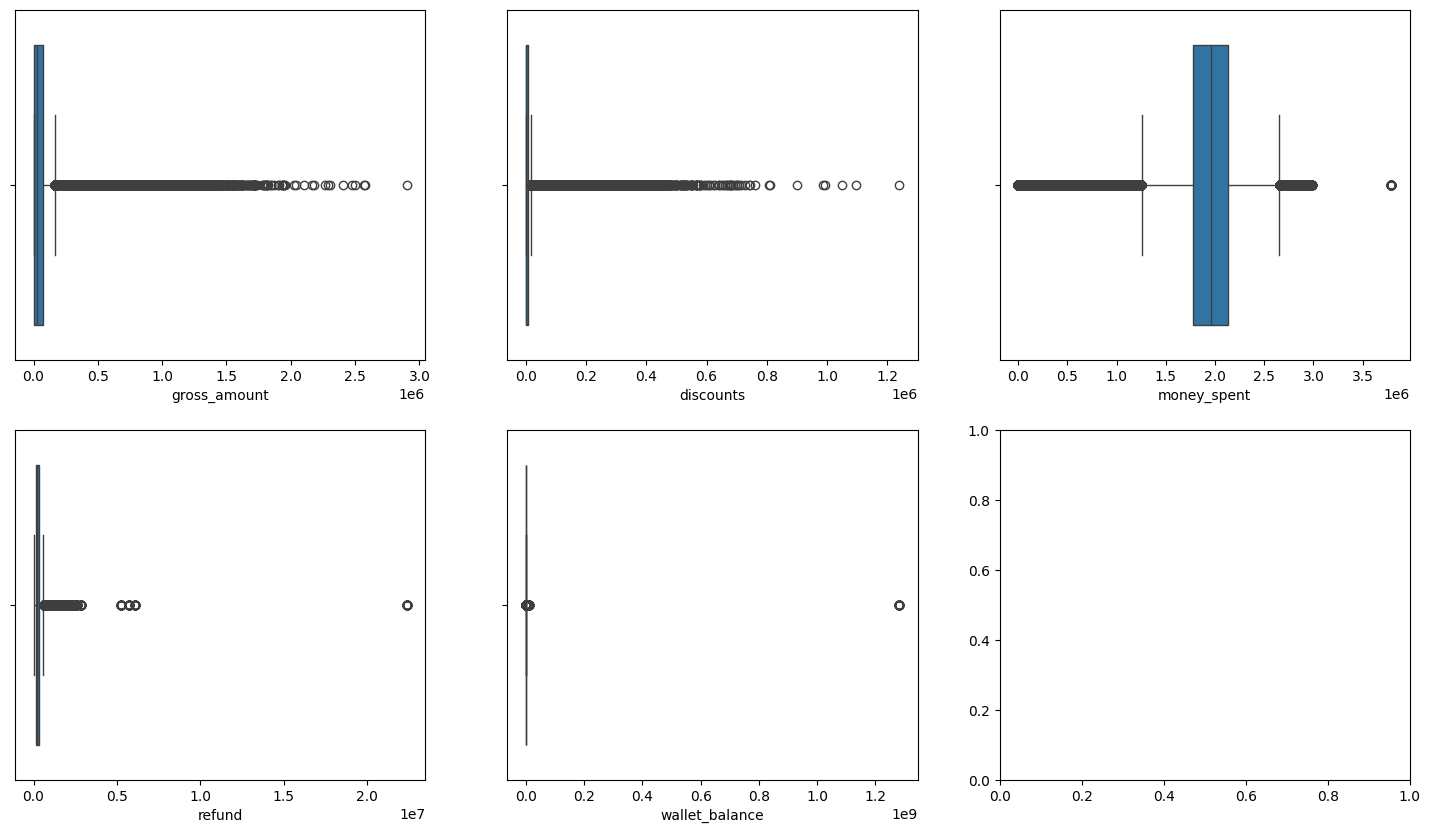

In [ ]:
# Memvisualisasikan distribusi dari fitur dan mengedintifikasikan outlier menggunakan boxplot
fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_35, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_35, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_35, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_35, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_35, x = 'wallet_balance', ax = axes[1, 1])

Dapat dilihat berdasarkan visualisasi di atas, terdapat outlier pada semua kolom yang divisualisasikan. Pada final project kali ini, untuk menghilangkan outlier dan menghindari kehilangan informasi pada data dan mempertahankan karakteristik data yang sangat besar ataupun sangat kecil, kami menggunakan **capping method** , jika data lebih dari atau kurang dari bound yang ada ( upper and lower ) maka dia sebagai outlier akan diganti nilai nya dengan nilai upper/lower bound.

In [ ]:
# Menangani Outlier
def handle_outliers_iqr(df, column):
    Q1 = data_35[column].quantile(0.25)
    Q3 = data_35[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    data_35[column] = np.where(data_35[column] < lower_bound, lower_bound, data_35[column])
    data_35[column] = np.where(data_35[column] > upper_bound, upper_bound, data_35[column])

In [ ]:
for column in outlier_check:
    handle_outliers_iqr(data_35, column)

<Axes: xlabel='wallet_balance'>

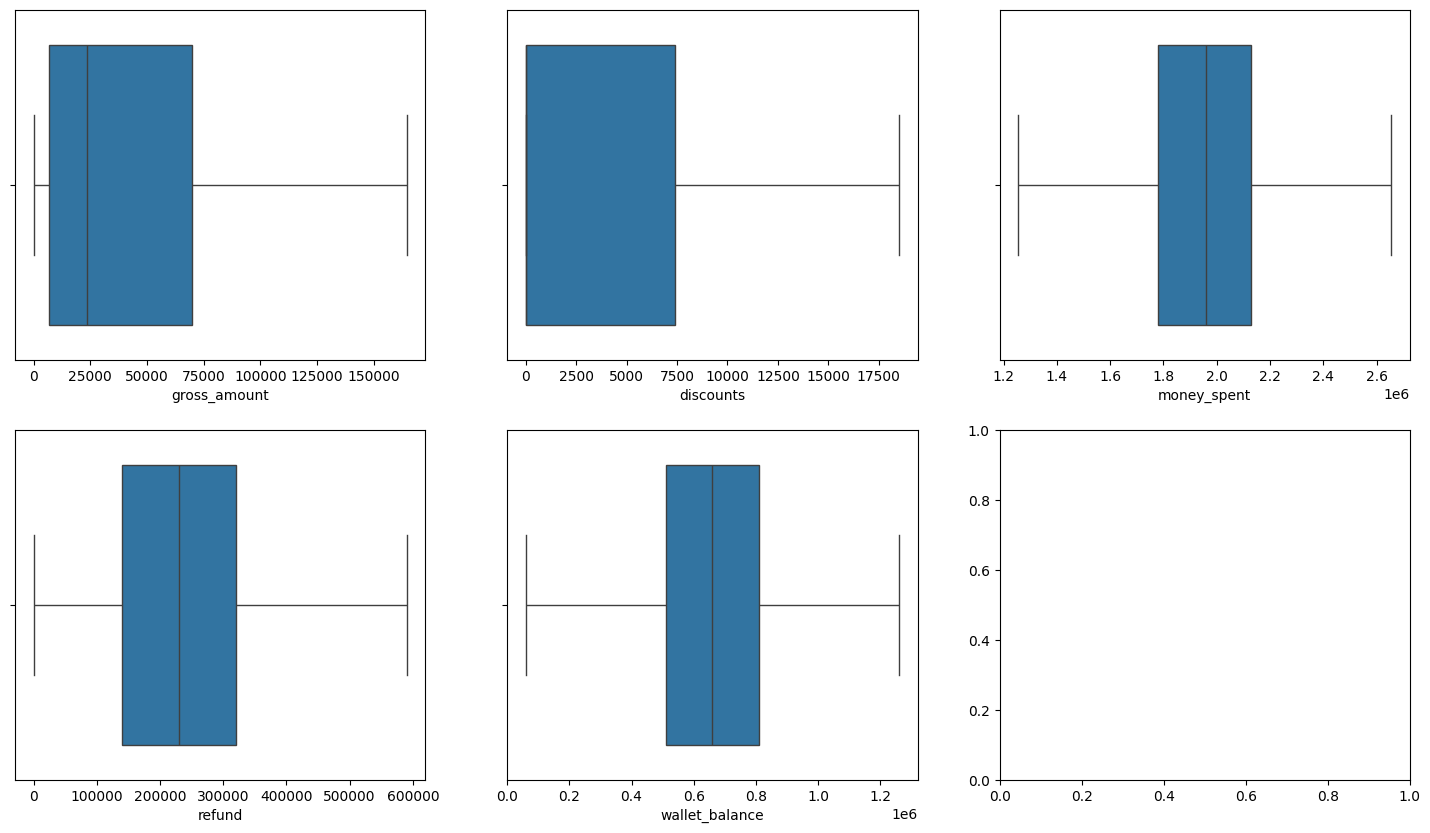

In [ ]:
# Memvisualisasikan distribusi dari fitur dan melihat apakah masih adanya outlier

fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_35, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_35, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_35, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_35, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_35, x = 'wallet_balance', ax = axes[1, 1])

Dapat terlihat, data sudah bersih dari outlier

**Changing Data Type**

In [ ]:
data_35.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2243782 entries, 0 to 2261195
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   trx_id            object 
 1   user_id           object 
 2   product_id        int64  
 3   gross_amount      float64
 4   discounts         float64
 5   transaction_date  object 
 6   product name      object 
 7   full_name         object 
 8   gender            object 
 9   money_spent       float64
 10  refund            float64
 11  wallet_balance    float64
 12  join_date         object 
 13  birth             object 
 14  kode kecamatan    object 
 15  nama provinsi     object 
 16  kode provinsi     int64  
 17  nama kabupaten    object 
 18  kode kabupaten    object 
 19  nama kecamatan    object 
dtypes: float64(5), int64(2), object(13)
memory usage: 359.5+ MB


In [ ]:
# Mengubah tipe data yang harusnya datetime menjadi datetime
data_35['transaction_date'] = pd.to_datetime(data_35['transaction_date'])
data_35['birth'] = pd.to_datetime(data_35['birth'])
data_35['join_date'] = pd.to_datetime(data_35['join_date'])

In [ ]:
data_35.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2243782 entries, 0 to 2261195
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   trx_id            object        
 1   user_id           object        
 2   product_id        int64         
 3   gross_amount      float64       
 4   discounts         float64       
 5   transaction_date  datetime64[ns]
 6   product name      object        
 7   full_name         object        
 8   gender            object        
 9   money_spent       float64       
 10  refund            float64       
 11  wallet_balance    float64       
 12  join_date         datetime64[ns]
 13  birth             datetime64[ns]
 14  kode kecamatan    object        
 15  nama provinsi     object        
 16  kode provinsi     int64         
 17  nama kabupaten    object        
 18  kode kabupaten    object        
 19  nama kecamatan    object        
dtypes: datetime64[ns](3), float64(5), int64(2), object(

## EDA

In [ ]:
# Menampilkan five statistic
data_35.describe()

product_id  gross_amount     discounts  \
count  2.243782e+06  2.243782e+06  2.243782e+06   
mean   8.231970e+00  4.696398e+04  4.266753e+03   
min    1.000000e+00  1.110223e-12  0.000000e+00   
25%    3.000000e+00  7.000000e+03  0.000000e+00   
50%    7.000000e+00  2.340000e+04  0.000000e+00   
75%    1.400000e+01  7.000000e+04  7.400000e+03   
max    1.800000e+01  1.645000e+05  1.850000e+04   
std    5.518497e+00  5.252474e+04  7.128755e+03   

                    transaction_date   money_spent        refund  \
count                        2243782  2.243782e+06  2.243782e+06   
mean   2024-07-01 03:15:28.245257216  1.945603e+06  2.349256e+05   
min              2024-01-01 00:00:00  1.255000e+06  0.000000e+00   
25%              2024-04-01 00:00:00  1.780000e+06  1.400000e+05   
50%              2024-07-01 00:00:00  1.960000e+06  2.300000e+05   
75%              2024-10-01 00:00:00  2.130000e+06  3.200000e+05   
max              2024-12-31 00:00:00  2.655000e+06  5.900000e+05   
std                              NaN  2.752378e+05  1.364012e+05   

       wallet_balance                      join_date  \
count    2.243782e+06                        2243782   
mean     6.616062e+05  2023-11-17 06:27:32.021452288   
min      6.000000e+04            2023-10-01 00:00:00   
25%      5.100000e+05            2023-10-25 00:00:00   
50%      6.600000e+05            2023-11-17 00:00:00   
75%      8.100000e+05            2023-12-10 00:00:00   
max      1.260000e+06            2024-12-28 00:00:00   
std      2.246011e+05                            NaN   

                               birth  kode provinsi  
count                        2243782      2243782.0  
mean   1989-04-07 05:14:17.130327168           35.0  
min              1959-01-02 00:00:00           35.0  
25%              1982-01-02 00:00:00           35.0  
50%              1989-06-21 00:00:00           35.0  
75%              1997-02-07 00:00:00           35.0  
max              2007-12-28 00:00:00           35.0  
std                              NaN            0.0

Daapt dilihat dari code diatas, kami akan melihat detail statistik dari data, termasuk min, q1 (25%), q2 (50%), q3 (75%), dan max dari tiap-tiap kolom.

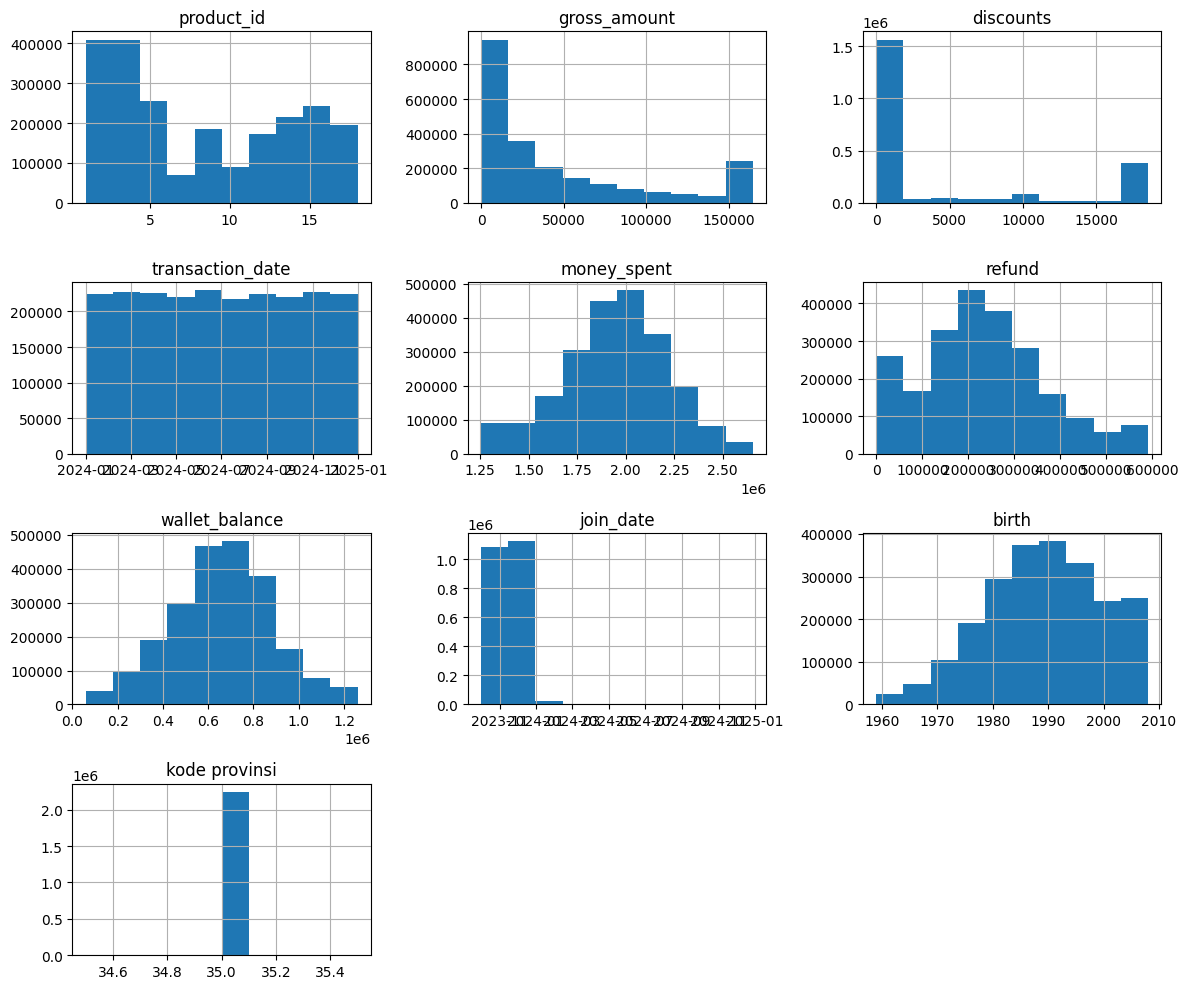

In [ ]:
# Menampilkan histogram pada variabel numerik
data_35.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

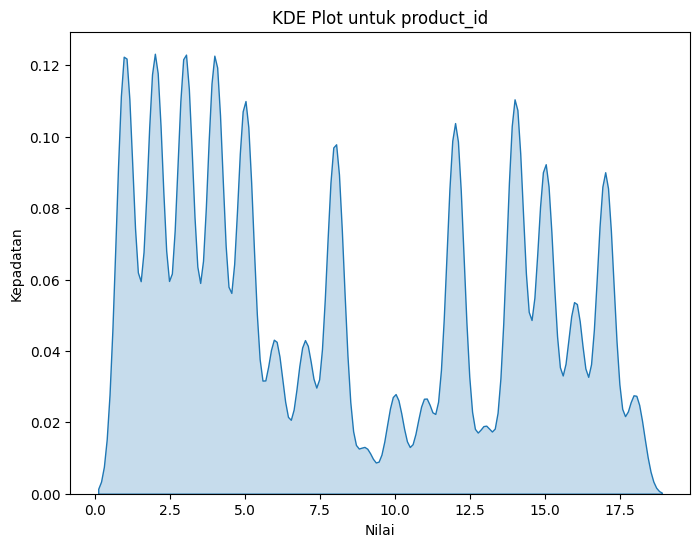

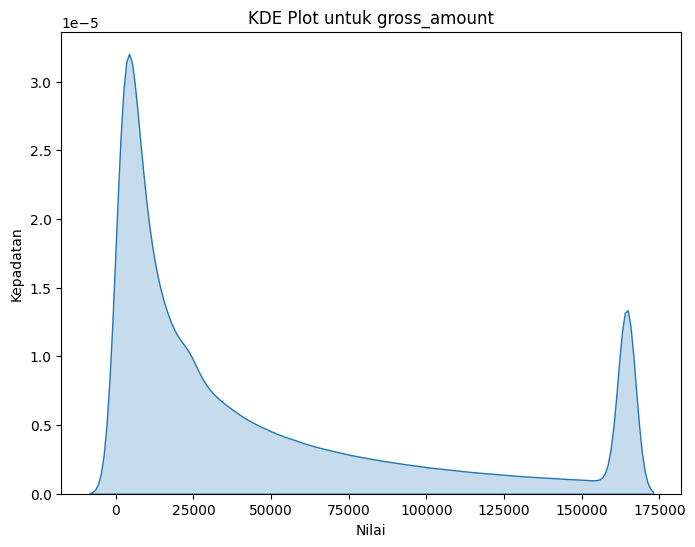

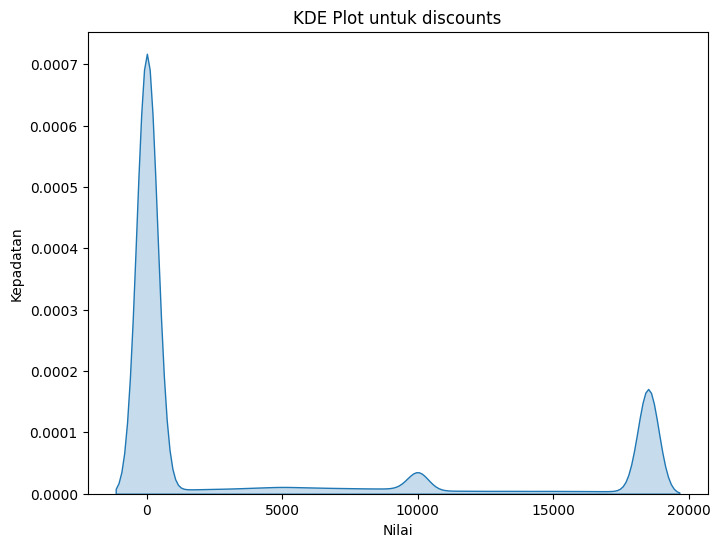

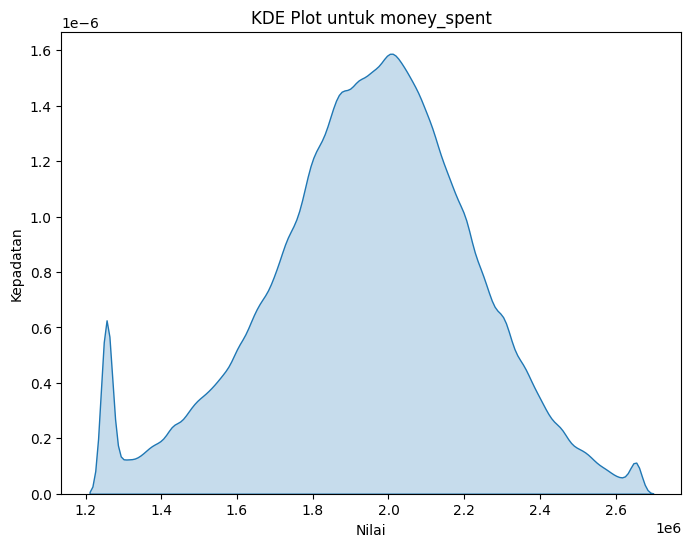

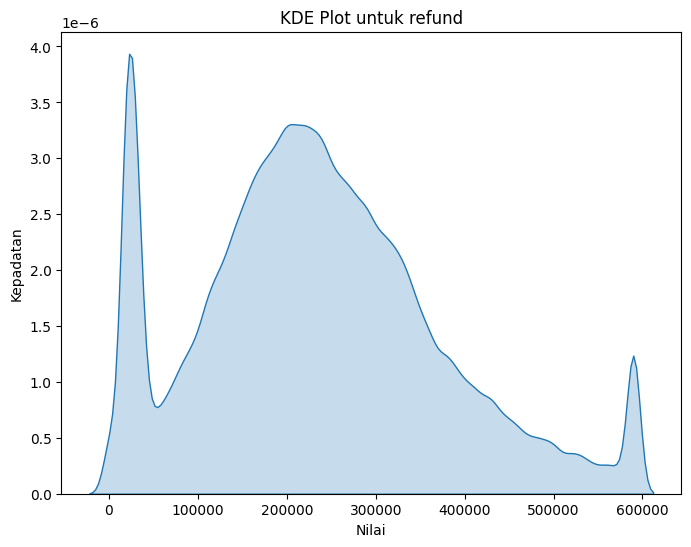

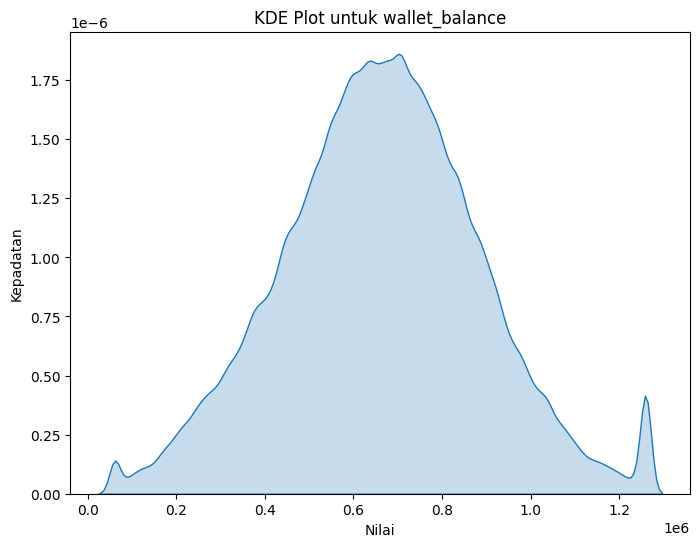

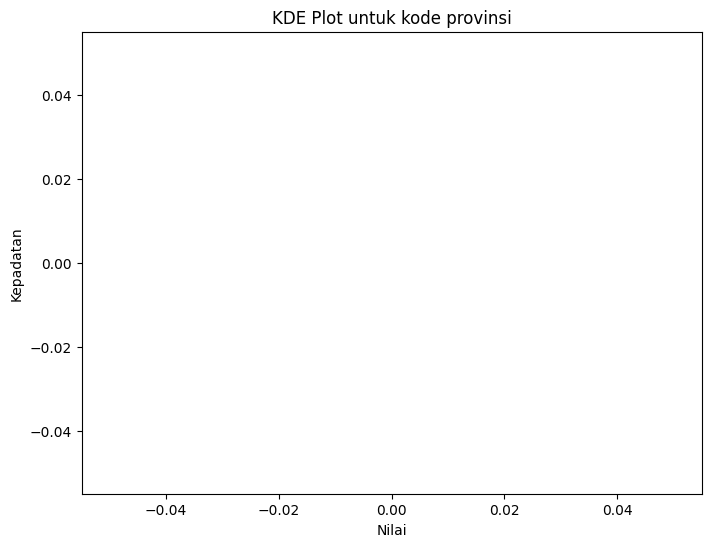

In [ ]:
#KDE Plot untuk mengetahui bentuk distrbusi

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loop melalui setiap kolom dalam DataFrame
for column in data_35.columns:
    # Pilih hanya kolom numerik
    if data_35[column].dtype in ['int64', 'float64']:
        # Buat KDE plot untuk setiap kolom numerik
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data_35[column], shade=True)

        # Tambahkan judul dan label sumbu
        plt.title('KDE Plot untuk ' + column)
        plt.xlabel('Nilai')
        plt.ylabel('Kepadatan')

        # Tampilkan plot
        plt.show()

Berdasarkan histogram dan KDE Plot yang digunakan, kita dapat mengetahui modality dari data (jumlah puncak). Seperti contohnya pada kolom discount adalah multimodal, wallet_balance adalah unimodal, gross amount adalah bimodal, dan transaction date adalah uniform.

In [ ]:
# Memilih hanya kolom-kolom numerik
numeric_columns = data_35.select_dtypes(include=['int', 'float'])

# Menghitung skewness hanya untuk kolom-kolom numerik
skewness = numeric_columns.skew()

print("Skewness untuk kolom-kolom numerik:")
print(skewness)

Skewness untuk kolom-kolom numerik:
product_id        0.272875
gross_amount      1.203934
discounts         1.279954
money_spent      -0.271184
refund            0.463804
wallet_balance    0.053260
kode provinsi     0.000000
dtype: float64


Disini kami ingin **mengkalkulasikan skewness** dari data,

Skewness merupakan cara untuk memperkirakan atau mengukur bentuk distribusi.  skewness digunakan untuk memperkirakan perilaku asimetris daripada menghitung distribusi frekuensi. Skewness dapat terdiri dari dua jenis:

- Simetris: Sebuah distribusi dapat disebut simetris jika terlihat sama dari kiri dan kanan dari titik tengah.
- Asimetris: Sebuah distribusi dapat disebut asimetris jika tidak tampak sama dari kiri dan kanan dari titik pusat.
Distribusi berdasarkan nilai kemencengan:

berikut adalah penjelasan mengenai skewness score:
- Skewness = 0: Berarti terdistribusi secara normal.
- Skewness > 0: Maka lebih banyak bobot di ekor kiri distribusi.
- Skewness < 0: Maka lebih banyak bobot di ekor kanan distribusi.

Berdasarkan skor di atas, dapat disimpulkan bahwa skewness fitur:

Data condong ke kanan:

- product_id (0.272875)
- Gross_amount (1.203934)
- Discounts (1.279954)
- refund (0.463804)
- wallet_balance (0.053260)


Data condong ke kiri:

- Money_spent (-0.271184)

Berdistribusi Normal:

- Kode Provinsi (0.000000)

## Feature Engineering

**Feature Selection**

Feature selection adalah cara memilih subset fitur yang paling relevan dari
kumpulan fitur asli dengan menghapus fitur yang redundan, tidak relevan, atau
berisik. Disini kami hanya memilih beberapa fitur yang relevan untuk kami analisis lebih lanjut hingga pembuatan dashboard

In [ ]:
# Melihat 5 data teratas dari data_35
data_35.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX443072  SC3526052001006           1      164500.0        0.0   
1  TRX443073  SC3526052001006           1      164500.0        0.0   
2  TRX443074  SC3526052001006           1      164500.0    18500.0   
3  TRX443075  SC3526052001006           1      164500.0    18500.0   
4  TRX443076  SC3526052001006          14      128500.0        0.0   

  transaction_date product name               full_name     gender  \
0       2024-05-19  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
1       2024-01-06  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
2       2024-02-03  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
3       2024-07-01  Man Fashion  Ir. SENJAYAWATI S.Sos.  perempuan   
4       2024-11-04    Kesehatan  Ir. SENJAYAWATI S.Sos.  perempuan   

   money_spent  refund  wallet_balance  join_date      birth kode kecamatan  \
0    2220000.0     0.0        750000.0 2023-12-08 1996-01-26         352605   
1    2220000.0     0.0        750000.0 2023-12-08 1996-01-26         352605   
2    2220000.0     0.0        750000.0 2023-12-08 1996-01-26         352605   
3    2220000.0     0.0        750000.0 2023-12-08 1996-01-26         352605   
4    2220000.0     0.0        750000.0 2023-12-08 1996-01-26         352605   

  nama provinsi  kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
1    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
2    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
3    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA  
4    JAWA TIMUR             35      BANGKALAN           3526       AROSBAYA

In [ ]:
# Memilih feature yang relevan yang disimpan dalam variabel feature_35
features_35 = data_35[['user_id', 'wallet_balance', 'money_spent', 'product name', 'gender', 'refund', 'birth', 'nama kabupaten']]

# Melihat isi dari features_35
features_35

user_id  wallet_balance  money_spent      product name  \
0        SC3526052001006        750000.0    2220000.0       Man Fashion   
1        SC3526052001006        750000.0    2220000.0       Man Fashion   
2        SC3526052001006        750000.0    2220000.0       Man Fashion   
3        SC3526052001006        750000.0    2220000.0       Man Fashion   
4        SC3526052001006        750000.0    2220000.0         Kesehatan   
...                  ...             ...          ...               ...   
2261191  SC3504011002014        660000.0    1970000.0  Sewa Motor/Mobil   
2261192  SC3504011002014        660000.0    1970000.0             Hotel   
2261193  SC3504011002014        660000.0    1970000.0             Hotel   
2261194  SC3504011002014        660000.0    1970000.0             Hotel   
2261195  SC3504011002014        660000.0    1970000.0             Hotel   

            gender    refund      birth nama kabupaten  
0        perempuan       0.0 1996-01-26      BANGKALAN  
1        perempuan       0.0 1996-01-26      BANGKALAN  
2        perempuan       0.0 1996-01-26      BANGKALAN  
3        perempuan       0.0 1996-01-26      BANGKALAN  
4        perempuan       0.0 1996-01-26      BANGKALAN  
...            ...       ...        ...            ...  
2261191  perempuan  170000.0 1993-05-25    TULUNGAGUNG  
2261192  perempuan  170000.0 1993-05-25    TULUNGAGUNG  
2261193  perempuan  170000.0 1993-05-25    TULUNGAGUNG  
2261194  perempuan  170000.0 1993-05-25    TULUNGAGUNG  
2261195  perempuan  170000.0 1993-05-25    TULUNGAGUNG  

[2243782 rows x 8 columns]

Diatas adalah Feature yang digunakan, yaitu user_id, wallet_balance, money_spent, product_name, gender, refund, birth dan nama kabupaten. dapat dilihat juga pada data diatas, beberapa baris memiliki user_id yang sama, oleh karena itu kami harus melakukan group by berdasarkan user_id.

**Feature encoding (one hot encoding)**

Karena kami ingin melihat jumlah transaksi user pada setiap produk, kami pertama kali akan melakukan one hot encoding pada product_name, kemudian nanti kami akan melakukan fungsi agregasi sum pada product_name bersamaan dengan groupby berdasarkan user_id untuk melihat jumlah pembelian produk masing-masing user

In [ ]:
# Melakukan One Hot Encoding pada feature_35 yang disimpan dalam variabel encoded_35
encoded_35 = pd.get_dummies(features_35, columns=['product name'], dtype=int)

# Menampilkan 5 data teratas pada encoded_35
encoded_35.head(5)

user_id  wallet_balance  money_spent     gender  refund      birth  \
0  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
1  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
2  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
3  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
4  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   

  nama kabupaten  product name_Elektronik  product name_Food & Drink  \
0      BANGKALAN                        0                          0   
1      BANGKALAN                        0                          0   
2      BANGKALAN                        0                          0   
3      BANGKALAN                        0                          0   
4      BANGKALAN                        0                          0   

   product name_Hotel  ...  product name_Other  product name_Otomotif  \
0                   0  ...                   0                      0   
1                   0  ...                   0                      0   
2                   0  ...                   0                      0   
3                   0  ...                   0                      0   
4                   0  ...                   0                      0   

   product name_Pulsa  product name_Ride Hailing  \
0                   0                          0   
1                   0                          0   
2                   0                          0   
3                   0                          0   
4                   0                          0   

   product name_Sewa Motor/Mobil  product name_Tagihan (WIFI, PLN)  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   product name_Top Up Game  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

**Feature Creation**

Pada feature creation, kami membuat kolom age berdasarkan kolom birth, dan kami akan membuat kolom total transaksi dengan menjumlahkan semua transaksi produk. Kolom age nantinya akan digunakan saat membuat dashboard, dan total transaksi akan digunakan untuk pembentukan cluster

In [ ]:
# Membuat Kolom Age
def calculate_age(birth_date):
    today = pd.Timestamp.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Membuat kolom 'age' berdasarkan kolom 'birth'
encoded_35['age'] = encoded_35['birth'].apply(calculate_age)

# Memindahkan kolom 'age' ke posisi ke-7
col_name = 'age'
col_position = 6  # posisi ke-7 (index mulai dari 0)
age_col = encoded_35.pop(col_name)
encoded_35.insert(col_position, col_name, age_col)

In [ ]:
# Membuat kolom total transaksi
encoded_35['total_transaksi'] = encoded_35.iloc[:, 8:].sum(axis=1)

In [ ]:
# Melihat 5 data teratas encoded_35 yang sudah dilakukan feature creation
encoded_35.head(5)

user_id  wallet_balance  money_spent     gender  refund      birth  \
0  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
1  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
2  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
3  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   
4  SC3526052001006        750000.0    2220000.0  perempuan     0.0 1996-01-26   

   age nama kabupaten  product name_Elektronik  product name_Food & Drink  \
0   28      BANGKALAN                        0                          0   
1   28      BANGKALAN                        0                          0   
2   28      BANGKALAN                        0                          0   
3   28      BANGKALAN                        0                          0   
4   28      BANGKALAN                        0                          0   

   ...  product name_Otomotif  product name_Pulsa  product name_Ride Hailing  \
0  ...                      0                   0                          0   
1  ...                      0                   0                          0   
2  ...                      0                   0                          0   
3  ...                      0                   0                          0   
4  ...                      0                   0                          0   

   product name_Sewa Motor/Mobil  product name_Tagihan (WIFI, PLN)  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   product name_Top Up Game  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  total_transaksi  
0                           0                1  
1                           0                1  
2                           0                1  
3                           0                1  
4                           0                1  

[5 rows x 27 columns]

**Grouping Data**

Disini, kami menggunakan data grouping, berdasarkan user_id

In [ ]:
# Mengecek jumlah nilai unik dalam kolom 'user_id'
unique_id_count = data_35['user_id'].nunique()

print("\nJumlah nilai unik dalam kolom 'user_id':")
print(unique_id_count)



Jumlah nilai unik dalam kolom 'user_id':
69587


berdasarkan jumlah nilai unik pada kolom user_id, disimpulkan bahwa terdapat 69587 user unik pada provinsi jawa timur (trx 35)

In [ ]:
# Agregasi pada kolom
agg_dict = {
    'money_spent': 'mean',
    'refund': 'mean',
    'wallet_balance': 'mean',
    'age': 'mean',
    'gender': 'first',
    'birth': 'first',
    'nama kabupaten': 'first'
}

# Menambahkan fungsi sum untuk semua kolom produk
for column in encoded_35.columns:
    if column not in ['user_id', 'money_spent', 'refund', 'wallet_balance', 'age', 'gender', 'birth', 'nama kabupaten']:
        agg_dict[column] = 'sum'

# Group by 'user_id' dan 'product_id', aggregate sesuai dengan agg_dict
grouped_35 = encoded_35.groupby('user_id').agg(agg_dict).reset_index()

# Mengatur tampilan agar hasil lebih mudah dibaca
pd.options.display.float_format = '{:,.2f}'.format

# Melihat 5 data teratas dari seluruh data yang telah dilakukan grouping
grouped_35.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC3501012001001 1,630,000.00 220,000.00      860,000.00 31.00  perempuan   
1  SC3501012001002 1,570,000.00 310,000.00    1,020,000.00 29.00  perempuan   
2  SC3501012001003 1,820,000.00 240,000.00      910,000.00 53.00  laki-laki   
3  SC3501012001004 1,560,000.00 140,000.00      690,000.00 23.00  perempuan   
4  SC3501012001005 1,680,000.00 210,000.00      830,000.00 44.00  laki-laki   

       birth nama kabupaten  product name_Elektronik  \
0 1993-05-07        PACITAN                        3   
1 1994-10-08        PACITAN                        0   
2 1971-03-24        PACITAN                        0   
3 2001-05-12        PACITAN                        2   
4 1980-03-09        PACITAN                        2   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          2  ...                      0                   0   
1                          2  ...                      0                   0   
2                          3  ...                      0                   0   
3                          2  ...                      4                   0   
4                          4  ...                      4                   0   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          4                              0   
1                          3                              0   
2                          4                              3   
3                          3                              3   
4                          3                              0   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 0                         0   
1                                 0                         2   
2                                 0                         0   
3                                 0                         4   
4                                 0                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     4   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     2   

   product name_Woman Fashion  total_transaksi  
0                           4               26  
1                           4               24  
2                           4               21  
3                           3               34  
4                           3               25  

[5 rows x 27 columns]

Setelah dilakukan groupby berdasarkan user_id, dapat dilihat tidak adanya redundansi baris user_id, lengkap dengan jumlah transaksi setiap produk dan total transaksi

**Feature Correlation**

Disini, kami ingin melihat korelasi antar fitur, semakin mendekati angka 1, baik plus atau minus, maka korelasi akan semakin kuat baik secara positif maupun negatif.

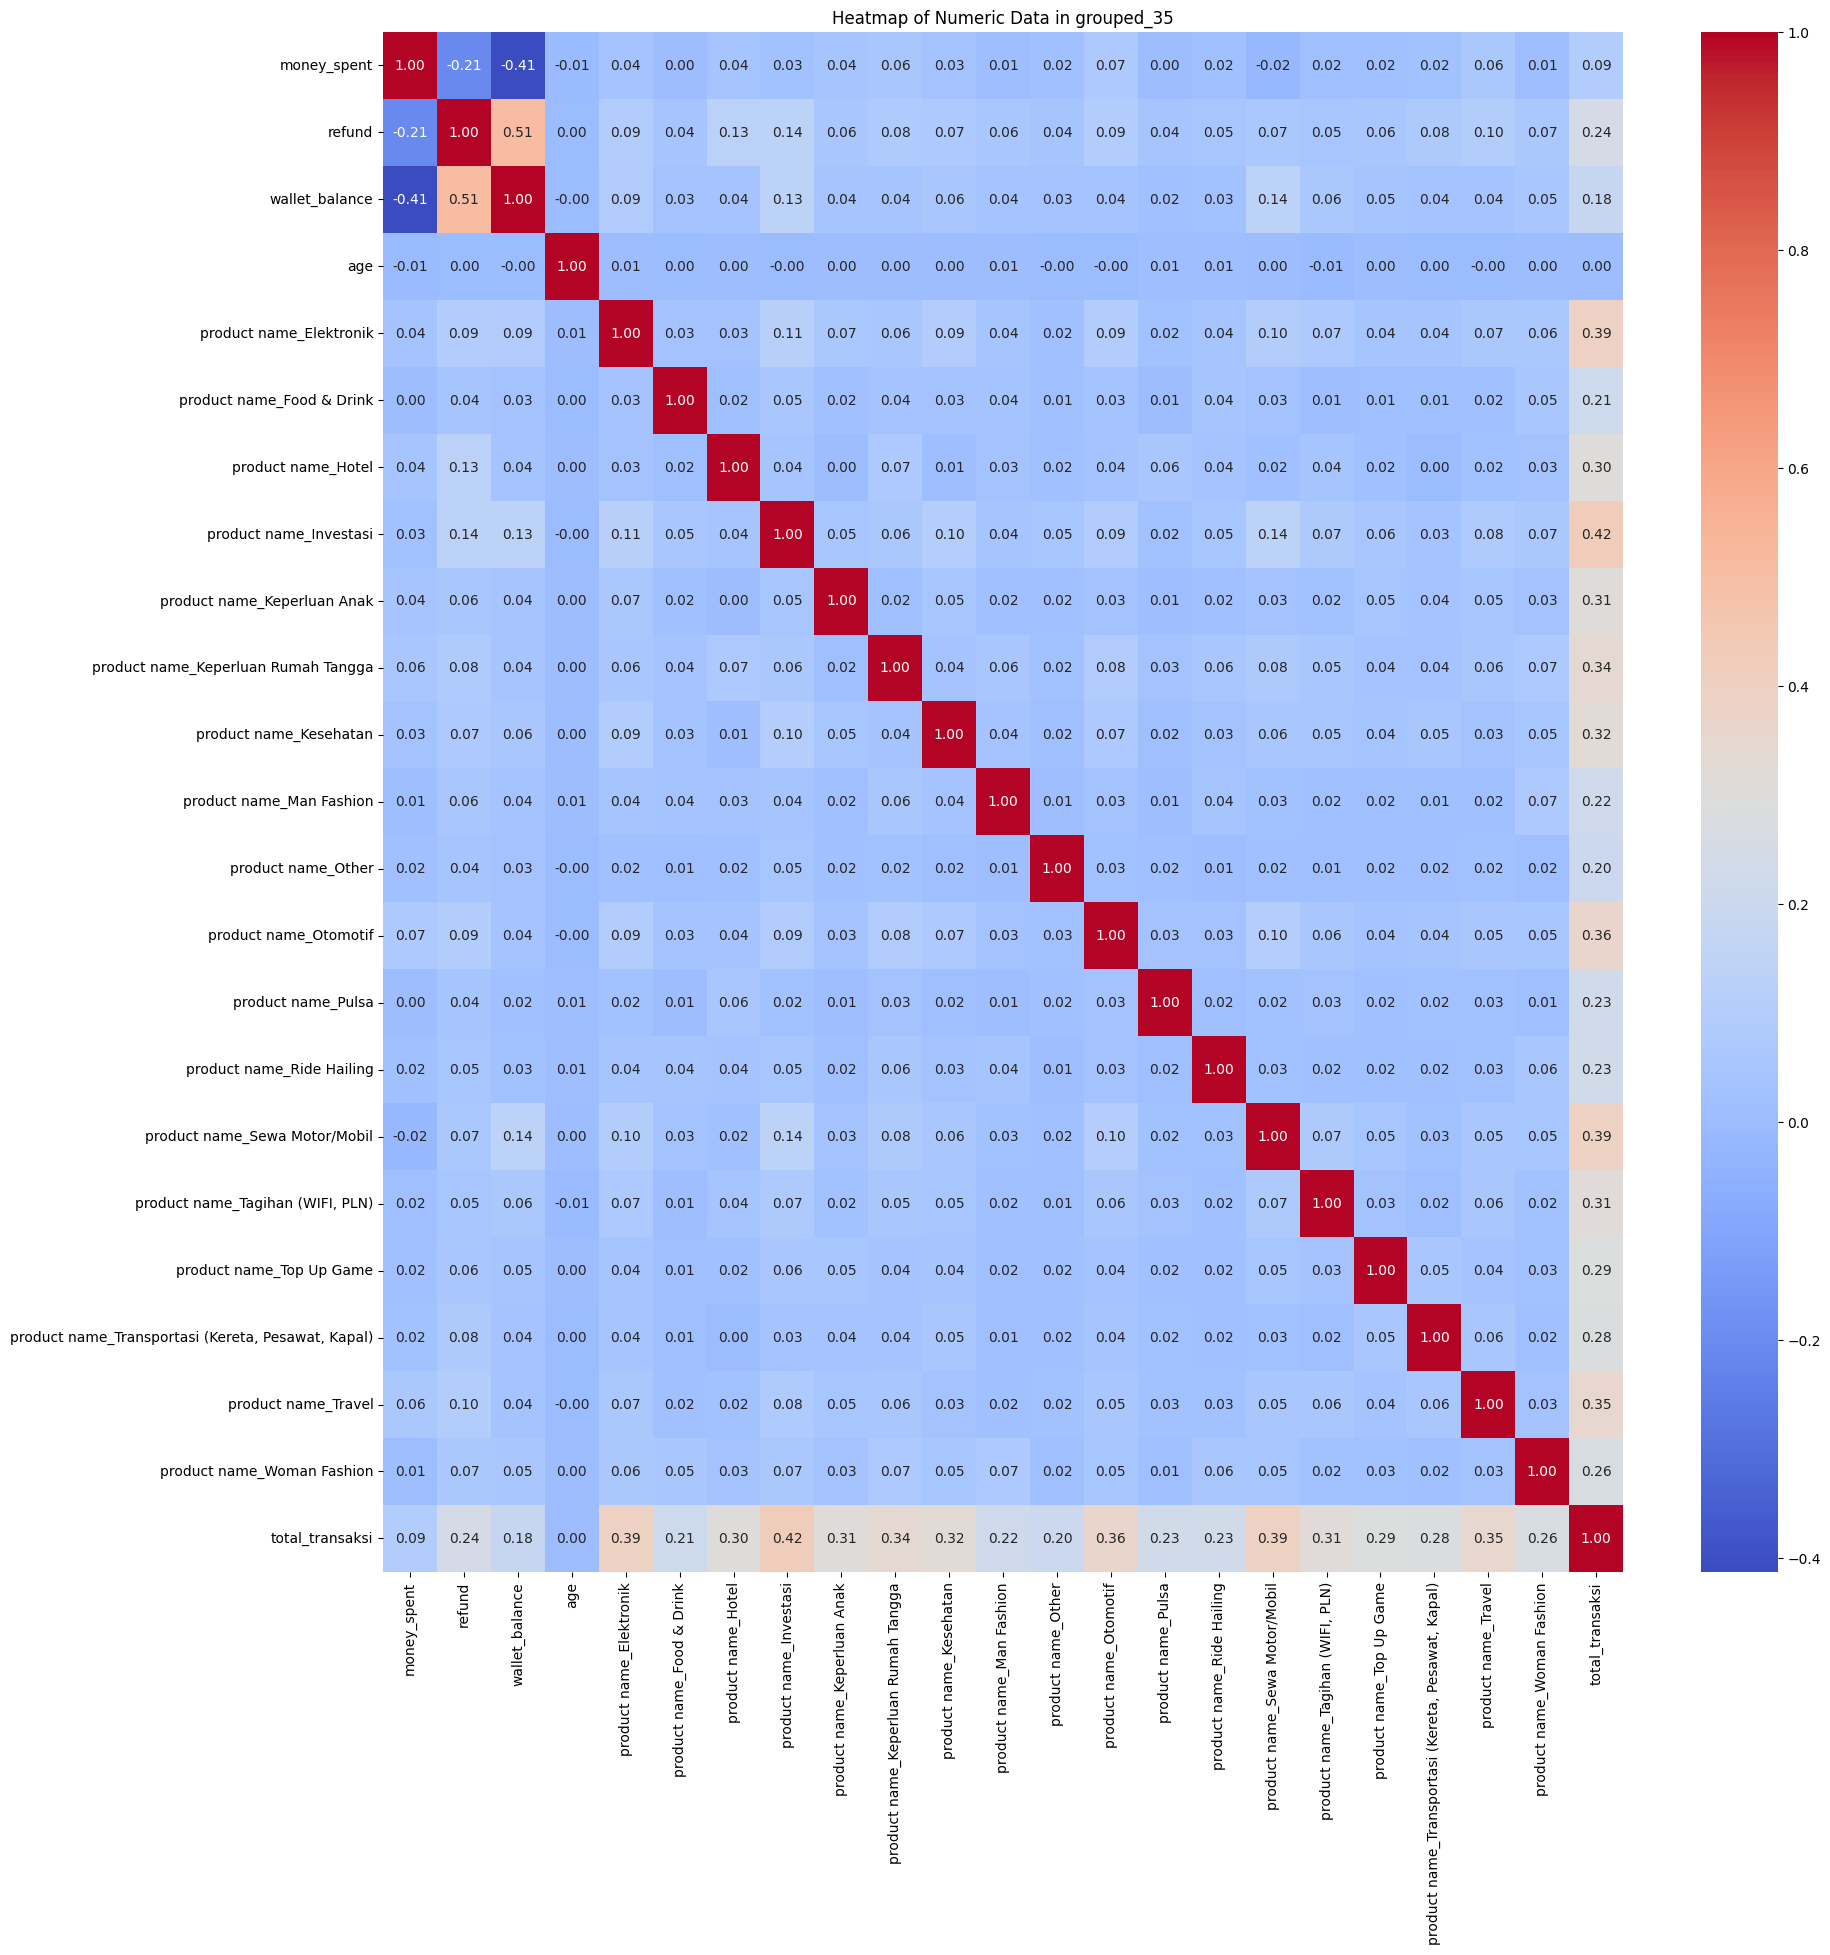

In [ ]:
# Memilih hanya kolom numerik
numeric_cols = grouped_35.select_dtypes(include='number')

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numeric Data in grouped_35')
plt.show()

Dari correlation heatmap diatas, dapat diketahui bahwa fitur yang paling berkorelasi tinggi adalah wallet_balance dengan refund dengan nilai 0.51.

## Modelling

Saat modeling, sesuai dengan judul project kami yang mengsegmentasi berdasarkan transaksi, maka kami akan menggunakan kolom money_spent, transaksi produk, dan total transaksi saja

In [ ]:
# Column_cluster_35 adalah variabel yang berisi kolom untuk pembuatan cluster, drop data yang tidak digunakan
column_cluster_35 = grouped_35.drop(columns=['user_id', 'refund', 'age', 'wallet_balance', 'gender', 'birth', 'nama kabupaten'])

**Feature Scaling**

Scaling dilakukan untuk mentransformasi nilai dari suatu fitur menjadi
range yang spesifik. Feature Scaling yang digunakan adalah normalisasi (MinMaxScaler), MinMaxScaler akan memperkecil rentang data dari 0 sampai 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_vector = column_cluster_35.values.flatten().reshape(-1, 1)

# Gunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()

# Lakukan scaling
scaled_vector = scaler.fit_transform(data_vector)

# Kembalikan vektor yang telah discaling ke bentuk aslinya (dataframe)
column_cluster_35 = pd.DataFrame(scaled_vector.reshape(column_cluster_35.shape), columns=column_cluster_35.columns)

**Model 1 - Mini Batch Kmeans Clustering**

Pada final project ini, sebelum menerapkan model final, kami akan membandingkan algoritma kmeans dan mini batch kmeans terlebih dahulu berdasarkan silhoutte score.

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import MiniBatchKMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, random state dan batch size nya
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, max_iter=50, random_state=42, batch_size = 20 )
mini_batch_kmeans.fit(column_cluster_35)

MiniBatchKMeans(batch_size=20, max_iter=50, n_clusters=4, random_state=42)

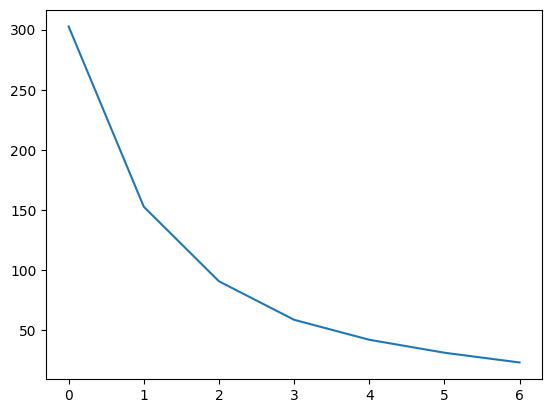

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  mini_batch_kmeans = MiniBatchKMeans (n_clusters=num_clusters, max_iter=50, random_state=42, batch_size = 20)
  mini_batch_kmeans.fit(column_cluster_35)

  ssd.append(mini_batch_kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

Berdasarkan tikungan pada elbow curve, didapatkan jumlah kluster optimal adalah 2. Karena elbow curve sering kali bersifat ambigu, maka dilakukan analisa silhoutte score untuk menentukan nilai k yang optimal

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
    # Inisialisasi Mini-Batch K-Means
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, max_iter = 50, batch_size = 20)
    mini_batch_kmeans.fit(column_cluster_35)
    cluster_labels = mini_batch_kmeans.labels_

    # Kalkulasi silhouette score
    silhouette_avg = silhouette_score(column_cluster_35, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5420602582108968
For n_clusters=3, the silhouette score is 0.5302234928924072
For n_clusters=4, the silhouette score is 0.5290942350105418
For n_clusters=5, the silhouette score is 0.5262035361755013
For n_clusters=6, the silhouette score is 0.5258403833154706
For n_clusters=7, the silhouette score is 0.5255062616829616
For n_clusters=8, the silhouette score is 0.5286390933823444


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.5420602582108968. Silhoutte score juga berperan sebagai metrik evaluasi yang mengindikasikan baik buruknya suatu model cluster.

**Model 2 - Kmeans Clustering**

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import KMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, dan random state
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(column_cluster_35)

KMeans(max_iter=50, n_clusters=4, random_state=42)

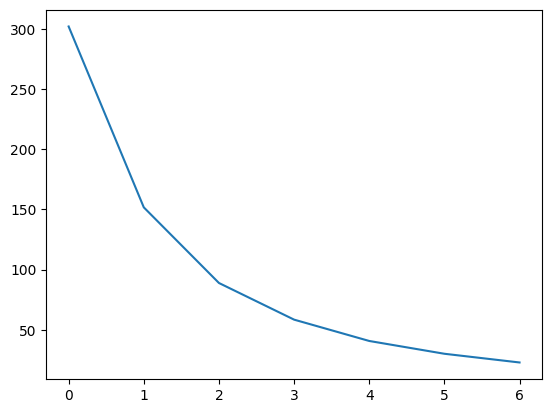

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  kmeans = KMeans (n_clusters=num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_35)

  ssd.append(kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

Berdasarkan elbow method yang ada, jumlah kluster optimal adalah 2

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
  # Inisialisasi model
  kmeans = KMeans (num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_35)
  cluster_labels = kmeans.labels_

# Kalkulasi silhouette Score
  silhouette_avg = silhouette_score(column_cluster_35, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5434234909994543
For n_clusters=3, the silhouette score is 0.5316563663757609
For n_clusters=4, the silhouette score is 0.5313281036814392
For n_clusters=5, the silhouette score is 0.5269862973140255
For n_clusters=6, the silhouette score is 0.5307332707782296
For n_clusters=7, the silhouette score is 0.5274107337161092
For n_clusters=8, the silhouette score is 0.530644884923962


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.5434234909994543

**Final Model**

Dari kedua model, minibatch dan kemans, dengan jumlah kluster yang sama yaitu 2, kmeans memiliki silhoutte score yang lebih baik daripada minibatch kmeans, oleh karena itu disini untuk model final kami menggunakan kmeans

In [ ]:
# Final model dengan k=2
kmeans = KMeans (n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(column_cluster_35)

KMeans(max_iter=50, n_clusters=2, random_state=42)

In [ ]:
# Menetapkan label pada grouped_35
grouped_35['Cluster_id'] = kmeans.labels_
grouped_35.sample(5)

user_id  money_spent     refund  wallet_balance   age  \
32617  SC3513162006003 1,710,000.00 230,000.00      500,000.00 50.00   
66286  SC3575041006004 2,010,000.00 220,000.00      550,000.00 16.00   
31934  SC3513092005003 1,830,000.00 330,000.00      870,000.00 57.00   
767    SC3501062013008 1,710,000.00 200,000.00      710,000.00 57.00   
45324  SC3517122001002 1,730,000.00 590,000.00      890,000.00 37.00   

          gender      birth nama kabupaten  product name_Elektronik  \
32617  perempuan 1973-08-20    PROBOLINGGO                        0   
66286  perempuan 2007-09-06  KOTA PASURUAN                        2   
31934  perempuan 1966-11-03    PROBOLINGGO                        3   
767    perempuan 1966-07-01        PACITAN                        0   
45324  perempuan 1986-10-21        JOMBANG                        2   

       product name_Food & Drink  ...  product name_Pulsa  \
32617                          3  ...                   0   
66286                          2  ...                   0   
31934                          4  ...                   0   
767                            4  ...                   0   
45324                          3  ...                   0   

       product name_Ride Hailing  product name_Sewa Motor/Mobil  \
32617                          3                              4   
66286                          2                              0   
31934                          4                              4   
767                            3                              0   
45324                          2                              0   

       product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
32617                                 0                         0   
66286                                 0                         0   
31934                                 4                         4   
767                                   0                         0   
45324                                 3                         0   

       product name_Transportasi (Kereta, Pesawat, Kapal)  \
32617                                                  0    
66286                                                  2    
31934                                                  0    
767                                                    4    
45324                                                  0    

       product name_Travel  product name_Woman Fashion  total_transaksi  \
32617                    0                           3               28   
66286                    0                           2               26   
31934                    0                           3               38   
767                      4                           4               40   
45324                    0                           3               29   

       Cluster_id  
32617           0  
66286           1  
31934           0  
767             0  
45324           0  

[5 rows x 28 columns]

Cluster id diterapkan pada variabel grouped_35, yang sebelumnya sudah dijelaskan berisi kolom yang ingin kita analisa lebih lanjut.

In [ ]:
# Mengubah nama kolom agar data menjadi lebih rapi
grouped_35 = grouped_35.rename(columns=lambda x: x.replace('product name_', 'Transaksi '))

# Melihat 5 data teratas dari grouped_35
grouped_35.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC3501012001001 1,630,000.00 220,000.00      860,000.00 31.00  perempuan   
1  SC3501012001002 1,570,000.00 310,000.00    1,020,000.00 29.00  perempuan   
2  SC3501012001003 1,820,000.00 240,000.00      910,000.00 53.00  laki-laki   
3  SC3501012001004 1,560,000.00 140,000.00      690,000.00 23.00  perempuan   
4  SC3501012001005 1,680,000.00 210,000.00      830,000.00 44.00  laki-laki   

       birth nama kabupaten  Transaksi Elektronik  Transaksi Food & Drink  \
0 1993-05-07        PACITAN                     3                       2   
1 1994-10-08        PACITAN                     0                       2   
2 1971-03-24        PACITAN                     0                       3   
3 2001-05-12        PACITAN                     2                       2   
4 1980-03-09        PACITAN                     2                       4   

   ...  Transaksi Pulsa  Transaksi Ride Hailing  Transaksi Sewa Motor/Mobil  \
0  ...                0                       4                           0   
1  ...                0                       3                           0   
2  ...                0                       4                           3   
3  ...                0                       3                           3   
4  ...                0                       3                           0   

   Transaksi Tagihan (WIFI, PLN)  Transaksi Top Up Game  \
0                              0                      0   
1                              0                      2   
2                              0                      0   
3                              0                      4   
4                              0                      0   

   Transaksi Transportasi (Kereta, Pesawat, Kapal)  Transaksi Travel  \
0                                                0                 4   
1                                                0                 0   
2                                                0                 0   
3                                                0                 0   
4                                                0                 2   

   Transaksi Woman Fashion  total_transaksi  Cluster_id  
0                        4               26           0  
1                        4               24           0  
2                        4               21           0  
3                        3               34           0  
4                        3               25           0  

[5 rows x 28 columns]

In [ ]:
# Mengecek jumlah masing-masing cluster
name_counts = grouped_35['Cluster_id'].value_counts()

print("\nFrekuensi nilai unik dalam kolom 'cluster_id':")
print(name_counts)


Frekuensi nilai unik dalam kolom 'cluster_id':
Cluster_id
1    39045
0    30542
Name: count, dtype: int64


Dapat terlihat, jumlah cluster 1 lebih banyak daripada cluster 0

In [ ]:
from google.colab import files

grouped_35.to_csv("grouped_35_new.csv", index=False)
# Mengunduh file CSV
files.download("grouped_35_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Diatas adalah kode untuk mengunduh file csv grouped_35 yang sudah di assign label dan diubah nama kolomnya.

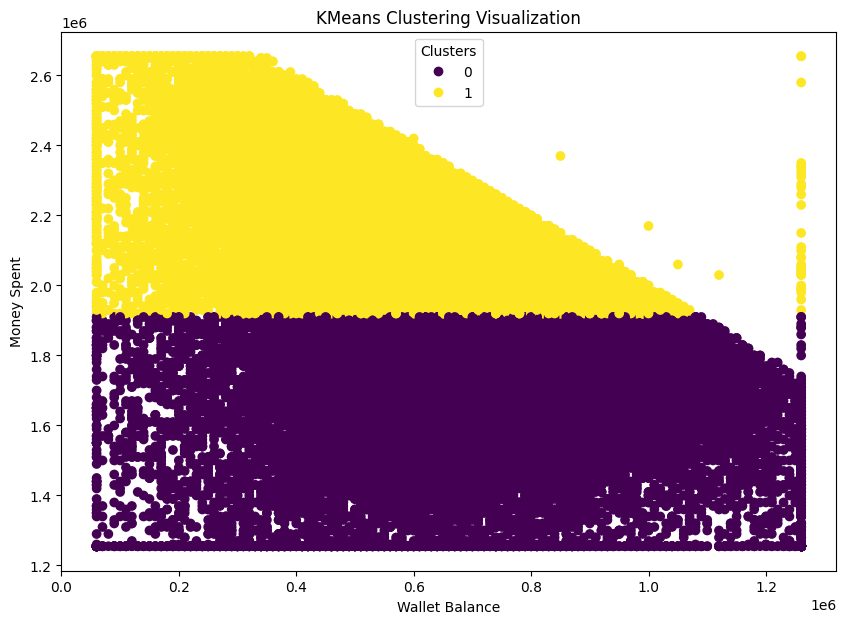

In [ ]:
# Visualisasi hasil clustering berdasarkan 'wallet_balance' dan 'money_spent'
plt.figure(figsize=(10, 7))
scatter = plt.scatter(grouped_35['wallet_balance'], grouped_35['money_spent'], c=grouped_35['Cluster_id'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization')
plt.xlabel('Wallet Balance')
plt.ylabel('Money Spent')
plt.show()

Karena dimensi data yang besar, kami mencoba memvisualisasikan dalam 2 dimensi saja menggunakan wallet_balance dan money spent. Dapat terlihat data tercluster dengan baik

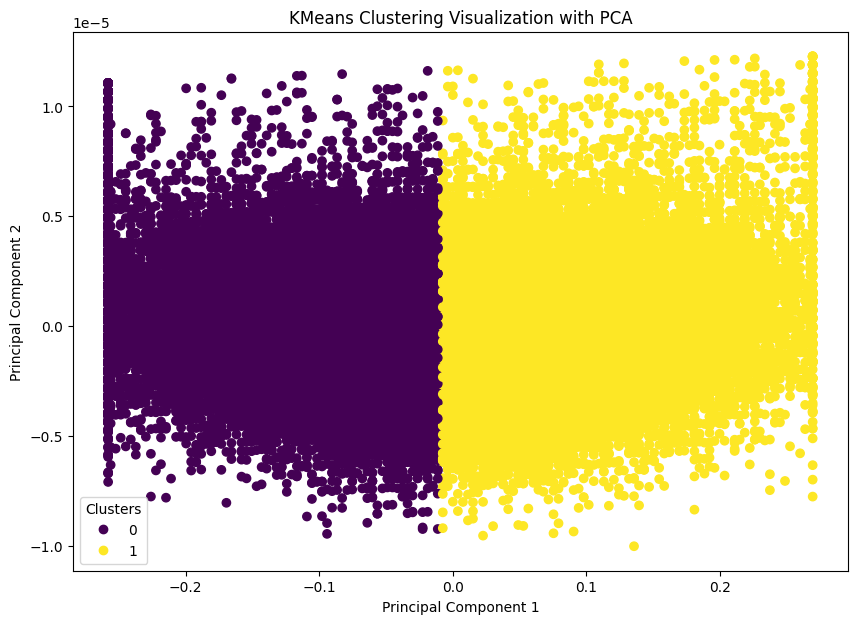

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Proyeksi data ke dalam dua dimensi menggunakan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(column_cluster_35)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Menambahkan label ke DataFrame PCA untuk visualisasi
pca_df['cluster_label'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['cluster_label'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Karena dimensi data yang sangat besar pula, kami menggunakan pca untuk memproyeksikan data menjadi dua dimensi saja. Dapat terlihat bahwa data terc;uster dengan baik

# Sumatera Utara (TRX 12)

## Data Preparation

**Data Merging**

Dilakukan data merging pada 4 tabel : transaction_12, product_reference, user, dan location_reference untuk melihat sekiranya informasi apa yang dapat diambil dari keseluruhan tabel.

In [ ]:
# Melihat tabel transaction_12
transaction_12

trx_id          user_id  product_id  gross_amount  discounts  \
0        TRX693205  SC1209182013002           2     68,800.00        NaN   
1        TRX693206  SC1209182013002           2     24,100.00        NaN   
2        TRX693207  SC1209182013002           2     91,900.00  42,900.00   
3        TRX693208  SC1209182013002           2     25,200.00   7,100.00   
4        TRX693209  SC1209182013002           3     23,500.00        NaN   
...            ...              ...         ...           ...        ...   
408577  TRX1101782  SC1212102010002          11      3,700.00        NaN   
408578  TRX1101783  SC1212102010002          14     59,900.00        NaN   
408579  TRX1101784  SC1212102010002          14     63,700.00        NaN   
408580  TRX1101785  SC1212102010002          14     50,300.00        NaN   
408581  TRX1101786  SC1212102010002          14     56,100.00        NaN   

       transaction_date  
0            2024-11-07  
1            2024-03-01  
2            2024-10-25  
3            2024-03-30  
4            2024-02-10  
...                 ...  
408577       2024-07-24  
408578       2024-02-15  
408579       2024-02-27  
408580       2024-06-17  
408581       2024-06-11  

[408582 rows x 6 columns]

In [ ]:
# Melakukan left join berdasarkan kolom 'Product ID'
product_transaction_12 = pd.merge(transaction_12, product_reference, on='product_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel transaction_12 dan product_reference bernama product_transaction
product_transaction_12.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX693205  SC1209182013002           2     68,800.00        NaN   
1  TRX693206  SC1209182013002           2     24,100.00        NaN   
2  TRX693207  SC1209182013002           2     91,900.00  42,900.00   
3  TRX693208  SC1209182013002           2     25,200.00   7,100.00   
4  TRX693209  SC1209182013002           3     23,500.00        NaN   

  transaction_date   product name  
0       2024-11-07  Woman Fashion  
1       2024-03-01  Woman Fashion  
2       2024-10-25  Woman Fashion  
3       2024-03-30  Woman Fashion  
4       2024-02-10   Food & Drink

In [ ]:
# Melakukan left join berdasarkan kolom 'User ID'
user_transaction_12 = pd.merge(product_transaction_12, user, on='user_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel product_transaction_12 dan user bernama user_transaction_12
user_transaction_12.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX693205  SC1209182013002           2     68,800.00        NaN   
1  TRX693206  SC1209182013002           2     24,100.00        NaN   
2  TRX693207  SC1209182013002           2     91,900.00  42,900.00   
3  TRX693208  SC1209182013002           2     25,200.00   7,100.00   
4  TRX693209  SC1209182013002           3     23,500.00        NaN   

  transaction_date   product name full_name     gender  money_spent  \
0       2024-11-07  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
1       2024-03-01  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
2       2024-10-25  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
3       2024-03-30  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
4       2024-02-10   Food & Drink  PARDIMAN  laki-laki 1,560,000.00   

      refund  wallet_balance   join_date       birth kode kecamatan  
0 210,000.00      750,000.00  2023-10-23  1977-10-07         120918  
1 210,000.00      750,000.00  2023-10-23  1977-10-07         120918  
2 210,000.00      750,000.00  2023-10-23  1977-10-07         120918  
3 210,000.00      750,000.00  2023-10-23  1977-10-07         120918  
4 210,000.00      750,000.00  2023-10-23  1977-10-07         120918

In [ ]:
# Melakukan left join berdasarkan kolom 'kode kecamatan'
data_12 = pd.merge(user_transaction_12, location_reference, on='kode kecamatan', how='left')

#  Melihat 5 data teratas dari hasil merging tabel user_transaction_12 dan  location_reference bernama data_12
data_12.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX693205  SC1209182013002           2     68,800.00        NaN   
1  TRX693206  SC1209182013002           2     24,100.00        NaN   
2  TRX693207  SC1209182013002           2     91,900.00  42,900.00   
3  TRX693208  SC1209182013002           2     25,200.00   7,100.00   
4  TRX693209  SC1209182013002           3     23,500.00        NaN   

  transaction_date   product name full_name     gender  money_spent  \
0       2024-11-07  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
1       2024-03-01  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
2       2024-10-25  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
3       2024-03-30  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
4       2024-02-10   Food & Drink  PARDIMAN  laki-laki 1,560,000.00   

      refund  wallet_balance   join_date       birth kode kecamatan  \
0 210,000.00      750,000.00  2023-10-23  1977-10-07         120918   
1 210,000.00      750,000.00  2023-10-23  1977-10-07         120918   
2 210,000.00      750,000.00  2023-10-23  1977-10-07         120918   
3 210,000.00      750,000.00  2023-10-23  1977-10-07         120918   
4 210,000.00      750,000.00  2023-10-23  1977-10-07         120918   

    nama provinsi  kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
1  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
2  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
3  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
4  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN

In [ ]:
# Melihat 5 sampel data
data_12.sample(5)

trx_id          user_id  product_id  gross_amount  discounts  \
148543   TRX841748  SC1276021013006          15      9,200.00        NaN   
403287  TRX1096492  SC1202072001001           3    100,900.00        NaN   
69475    TRX762680  SC1207262002035          15      2,100.00   2,100.00   
42971    TRX736176  SC1211032014007           3     50,700.00        NaN   
61957    TRX755162  SC1207322019005          15      3,200.00   3,200.00   

       transaction_date  product name                      full_name  \
148543       2024-11-13     Investasi                YENNI FITRIANTI   
403287       2024-08-13  Food & Drink                              R   
69475        2024-03-06     Investasi                  SUCIPTO Retno   
42971        2024-10-16  Food & Drink                 WIJAYANTI LEVY   
61957        2024-01-26     Investasi  TRISTIAWATI MINTARSIH JAMILAH   

           gender  money_spent     refund  wallet_balance   join_date  \
148543  perempuan 1,860,000.00 430,000.00      820,000.00  2023-10-31   
403287  perempuan 1,590,000.00 120,000.00   -1,590,000.00  2023-10-18   
69475   perempuan 1,670,000.00 150,000.00      820,000.00  2023-11-20   
42971   perempuan 1,760,000.00  40,000.00      310,000.00  2023-11-05   
61957   perempuan 1,630,000.00 350,000.00      790,000.00  2023-10-02   

             birth kode kecamatan   nama provinsi  kode provinsi  \
148543  1989-09-17         127602  SUMATERA UTARA             12   
403287  1981-07-14         120207  SUMATERA UTARA             12   
69475   2007-09-07         120726  SUMATERA UTARA             12   
42971   1979-11-16         121103  SUMATERA UTARA             12   
61957   1997-12-16         120732  SUMATERA UTARA             12   

            nama kabupaten kode kabupaten   nama kecamatan  
148543  KOTA TEBING TINGGI           1276         RAMBUTAN  
403287      TAPANULI UTARA           1202      SIMANGUMBAN  
69475         DELI SERDANG           1207  PERCUT SEI TUAN  
42971                DAIRI           1211       TIGALINGGA  
61957         DELI SERDANG           1207      PANTAI LABU

In [ ]:
# Melihat informasi dari data_12
data_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408582 entries, 0 to 408581
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trx_id            408582 non-null  object 
 1   user_id           408582 non-null  object 
 2   product_id        408582 non-null  int64  
 3   gross_amount      406005 non-null  float64
 4   discounts         106036 non-null  float64
 5   transaction_date  408582 non-null  object 
 6   product name      408582 non-null  object 
 7   full_name         408582 non-null  object 
 8   gender            408582 non-null  object 
 9   money_spent       408582 non-null  float64
 10  refund            408582 non-null  float64
 11  wallet_balance    408582 non-null  float64
 12  join_date         408582 non-null  object 
 13  birth             408582 non-null  object 
 14  kode kecamatan    408582 non-null  object 
 15  nama provinsi     408582 non-null  object 
 16  kode provinsi     40

In [ ]:
# Melihat detail statistik dari data_12
data_12.describe()

product_id  gross_amount  discounts   money_spent         refund  \
count  408,582.00    406,005.00 106,036.00    408,582.00     408,582.00   
mean         8.00     52,129.63  19,646.78  1,640,278.99     162,956.86   
std          5.29     91,666.61  22,166.62    425,249.58     235,002.73   
min          1.00       -100.00    -100.00          0.00 -16,500,000.00   
25%          3.00      5,700.00   7,000.00  1,410,000.00      80,000.00   
50%          7.00     18,200.00  10,500.00  1,660,000.00     140,000.00   
75%         13.00     58,000.00  24,800.00  1,900,000.00     220,000.00   
max         18.00  2,761,300.00 746,400.00 18,740,000.00   5,070,000.00   

       wallet_balance  kode provinsi  
count      408,582.00     408,582.00  
mean       710,939.88          12.00  
std        445,589.01           0.00  
min    -15,870,000.00          12.00  
25%        520,000.00          12.00  
50%        710,000.00          12.00  
75%        910,000.00          12.00  
max      7,280,000.00          12.00

melihat kolom gross_amount, refund, discounts dan wallet_balance ada yang bernilai minus, kami menganggap kolom tersebut adalah anomali karena berdasarkan analisa kami, kolom tersebut tidak mungkin minus. Oleh karena itu, kami langsung melakukan drop baris pada kolom bernilai minus tersebut.

In [ ]:
# Kolom-kolom yang ingin dilakukan pengecekan baris berisi nilai minus
Columns = ['gross_amount', 'refund', 'discounts', 'wallet_balance']

# Menghapus baris dengan nilai minus di salah satu dari empat kolom
data_12 = data_12.drop(data_12[(data_12[Columns] < 0).any(axis=1)].index)

In [ ]:
# Mengecek detail statistik dari data yang sudah dihilangkan anomali pada data
data_12.describe()

product_id  gross_amount  discounts  money_spent       refund  \
count  403,345.00    400,855.00 104,636.00   403,345.00   403,345.00   
mean         8.00     52,116.75  19,619.38 1,636,928.36   167,893.81   
std          5.29     91,570.71  21,988.19   379,289.52   140,462.09   
min          1.00          0.00       0.00         0.00         0.00   
25%          3.00      5,700.00   7,000.00 1,410,000.00    80,000.00   
50%          7.00     18,200.00  10,500.00 1,660,000.00   140,000.00   
75%         13.00     58,100.00  24,800.00 1,900,000.00   220,000.00   
max         18.00  2,761,300.00 746,400.00 2,830,000.00 5,070,000.00   

       wallet_balance  kode provinsi  
count      403,345.00     403,345.00  
mean       735,761.59          12.00  
std        339,265.45           0.00  
min              0.00          12.00  
25%        530,000.00          12.00  
50%        710,000.00          12.00  
75%        910,000.00          12.00  
max      7,280,000.00          12.00

Dapat dilihat, nilai yang sebelumnya minus pada kolom gross_amount, refund, discounts dan wallet balance sudah dihilangkan.

**Check Missing Value**

In [ ]:
# Mengecek jumlah nilai null pada setiap kolom pada data_12
data_12.isnull().sum()

trx_id                   0
user_id                  0
product_id               0
gross_amount          2490
discounts           298709
transaction_date         0
product name             0
full_name                0
gender                   0
money_spent              0
refund                   0
wallet_balance           0
join_date                0
birth                    0
kode kecamatan           0
nama provinsi            0
kode provinsi            0
nama kabupaten           0
kode kabupaten           0
nama kecamatan           0
dtype: int64

Terdapat nilai null pada discounts dan gross amount

In [ ]:
# Mengisi nilai discounts dengan nilai 0
data_12['discounts'] = data_12['discounts'].fillna(0)

Kami mengisi nilai discounts dengan 0 dengan asumsi nilai discounts yang kosong menandakan tidak adanya discount --> 0

In [ ]:
# Menghitung skewness hanya untuk kolom 'gross_amount' untuk menentukan cara mengisi nilai null pada gross_amount
skewness_gross_amount = data_12['gross_amount'].skew()

# Mencetak nilai skewness
print("Skewness untuk kolom 'gross_amount':", skewness_gross_amount)

Skewness untuk kolom 'gross_amount': 4.541080669152143


Karena Right Skewness, digunakan median untuk mengisi missing value pada kolom gross_amount

In [ ]:
# Hitung nilai median dari kolom 'gross_amount'
median_gross_amount = data_12['gross_amount'].median()

# Mengisi nilai null dalam kolom 'gross_amount' dengan nilai median
data_12['gross_amount'].fillna(median_gross_amount, inplace=True)

In [ ]:
# Mengecek apakah masih ada nilai yang null
data_12.isnull().sum()

trx_id              0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
product name        0
full_name           0
gender              0
money_spent         0
refund              0
wallet_balance      0
join_date           0
birth               0
kode kecamatan      0
nama provinsi       0
kode provinsi       0
nama kabupaten      0
kode kabupaten      0
nama kecamatan      0
dtype: int64

Terdeteksi tidak ada lagi data yang kosong

**Data Duplikat**

In [ ]:
# Mengecek nilai duplikat
data_12.duplicated().sum()

0

Karena tidak adanya data duplikat, maka kita bisa lanjut ke langkah selanjutnya.

**Handling Outlier**

In [ ]:
# Kolom numerik yang dicek dan ditangani outliernya
outlier_check = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

In [ ]:
import numpy as np

# Fungsi untuk menghitung outlier
def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(data_12[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data_12[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Batas atas (Above Upper bound)
    upper = data_12[feature_name] >= (Q3 + 1.5 * IQR)

    # Batas bawah (Below Lower bound)
    lower = data_12[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))

In [ ]:
# Mencetak jumlah outlier sesuai feature yang ada pada variabel outlier_check

print("Number of Outlier values with respect to features : \n")

for feature in outlier_check:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

gross_amount  :  41062
discounts  :  93152
money_spent  :  5499
refund  :  14333
wallet_balance  :  5993


Dapat dilihat diatas adalah jumlah outlier yang ada pada fitur numerik

<Axes: xlabel='wallet_balance'>

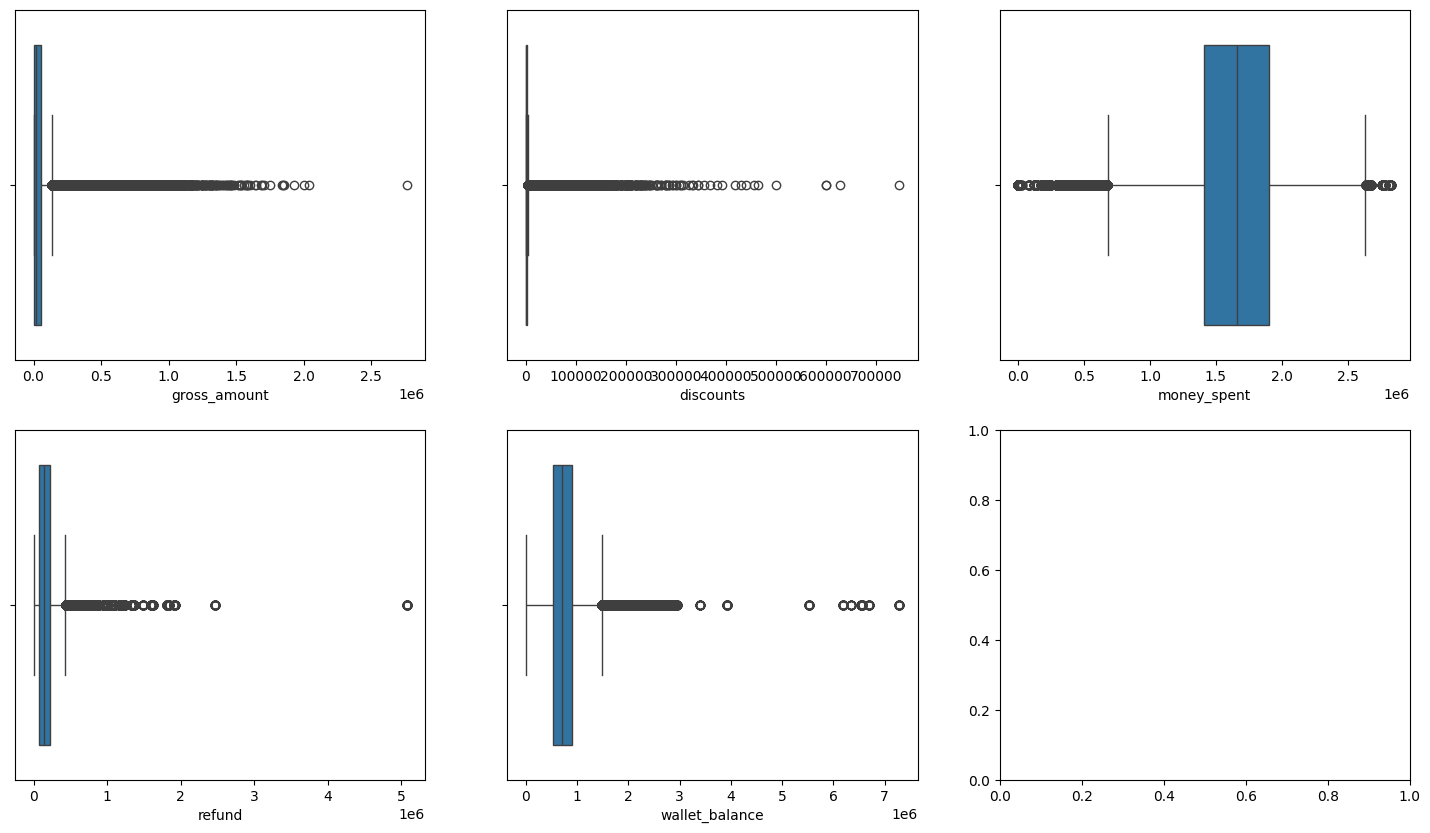

In [ ]:
# Memvisualisasikan distribusi dari fitur dan mengedintifikasikan outlier menggunakan boxplot
fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_12, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_12, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_12, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_12, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_12, x = 'wallet_balance', ax = axes[1, 1])

Dapat dilihat berdasarkan visualisasi di atas, terdapat outlier pada semua kolom yang divisualisasikan. Pada final project kali ini, untuk menghilangkan outlier dan menghindari kehilangan informasi pada data dan mempertahankan karakteristik data yang sangat besar ataupun sangat kecil, kami menggunakan **capping method** , jika data lebih dari atau kurang dari bound yang ada ( upper and lower ) maka dia sebagai outlier akan diganti nilai nya dengan nilai upper/lower bound.

In [ ]:
# Menangani Outlier
def handle_outliers_iqr(df, column):
    Q1 = data_12[column].quantile(0.25)
    Q3 = data_12[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    data_12[column] = np.where(data_12[column] < lower_bound, lower_bound, data_12[column])
    data_12[column] = np.where(data_12[column] > upper_bound, upper_bound, data_12[column])

In [ ]:
for column in outlier_check:
    handle_outliers_iqr(data_12, column)

<Axes: xlabel='wallet_balance'>

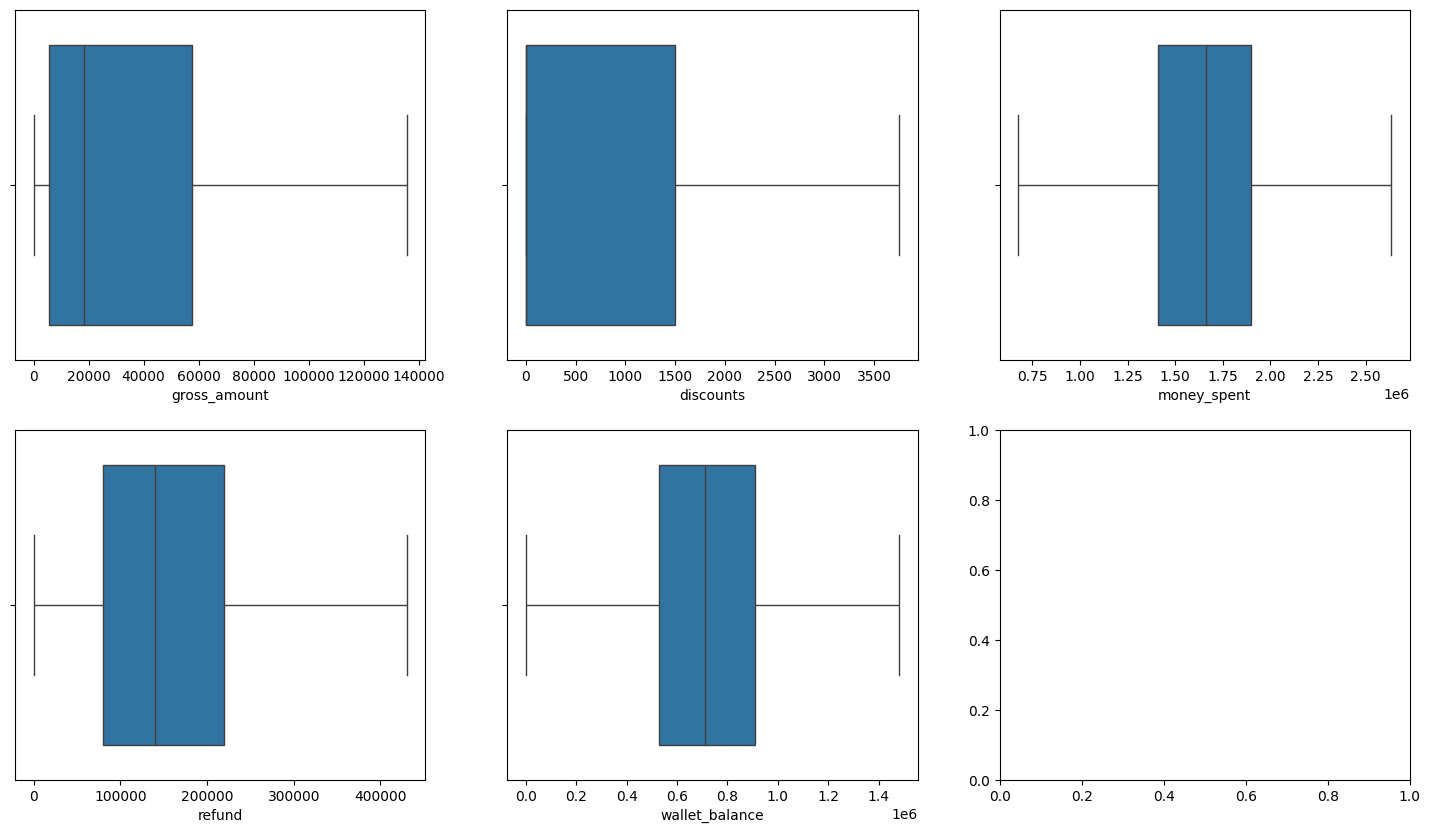

In [ ]:
# Memvisualisasikan distribusi dari fitur dan melihat apakah masih adanya outlier

fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_12, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_12, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_12, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_12, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_12, x = 'wallet_balance', ax = axes[1, 1])

Dapat terlihat, data sudah bersih dari outlier

**Changing Data Type**

In [ ]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403345 entries, 0 to 408581
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trx_id            403345 non-null  object 
 1   user_id           403345 non-null  object 
 2   product_id        403345 non-null  int64  
 3   gross_amount      403345 non-null  float64
 4   discounts         403345 non-null  float64
 5   transaction_date  403345 non-null  object 
 6   product name      403345 non-null  object 
 7   full_name         403345 non-null  object 
 8   gender            403345 non-null  object 
 9   money_spent       403345 non-null  float64
 10  refund            403345 non-null  float64
 11  wallet_balance    403345 non-null  float64
 12  join_date         403345 non-null  object 
 13  birth             403345 non-null  object 
 14  kode kecamatan    403345 non-null  object 
 15  nama provinsi     403345 non-null  object 
 16  kode provinsi     403345 

In [ ]:
# Mengubah tipe data yang harusnya datetime menjadi datetime
data_12['transaction_date'] = pd.to_datetime(data_12['transaction_date'])
data_12['birth'] = pd.to_datetime(data_12['birth'])
data_12['join_date'] = pd.to_datetime(data_12['join_date'])

In [ ]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403345 entries, 0 to 408581
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            403345 non-null  object        
 1   user_id           403345 non-null  object        
 2   product_id        403345 non-null  int64         
 3   gross_amount      403345 non-null  float64       
 4   discounts         403345 non-null  float64       
 5   transaction_date  403345 non-null  datetime64[ns]
 6   product name      403345 non-null  object        
 7   full_name         403345 non-null  object        
 8   gender            403345 non-null  object        
 9   money_spent       403345 non-null  float64       
 10  refund            403345 non-null  float64       
 11  wallet_balance    403345 non-null  float64       
 12  join_date         403345 non-null  datetime64[ns]
 13  birth             403345 non-null  datetime64[ns]
 14  kode keca

## EDA

In [ ]:
# Menampilkan five statistic
data_12.describe()

product_id  gross_amount  discounts               transaction_date  \
count  403,345.00    403,345.00 403,345.00                         403345   
mean         8.00     38,831.16     924.84  2024-07-01 02:20:59.957604864   
min          1.00          0.00       0.00            2024-01-01 00:00:00   
25%          3.00      5,700.00       0.00            2024-04-01 00:00:00   
50%          7.00     18,200.00       0.00            2024-07-01 00:00:00   
75%         13.00     57,600.00   1,500.00            2024-10-01 00:00:00   
max         18.00    135,450.00   3,750.00            2024-12-31 00:00:00   
std          5.29     44,113.75   1,595.99                            NaN   

       money_spent     refund  wallet_balance                      join_date  \
count   403,345.00 403,345.00      403,345.00                         403345   
mean  1,641,681.85 162,409.33      726,477.01  2023-11-17 17:06:44.274256640   
min     675,000.00       0.00            0.00            2023-10-01 00:00:00   
25%   1,410,000.00  80,000.00      530,000.00            2023-10-25 00:00:00   
50%   1,660,000.00 140,000.00      710,000.00            2023-11-18 00:00:00   
75%   1,900,000.00 220,000.00      910,000.00            2023-12-10 00:00:00   
max   2,635,000.00 430,000.00    1,480,000.00            2024-12-27 00:00:00   
std     362,764.24 108,021.85      284,143.15                            NaN   

                               birth  kode provinsi  
count                         403345     403,345.00  
mean   1989-03-26 14:31:06.917899136          12.00  
min              1959-01-01 00:00:00          12.00  
25%              1981-11-14 00:00:00          12.00  
50%              1989-06-06 00:00:00          12.00  
75%              1997-02-06 00:00:00          12.00  
max              2007-12-28 00:00:00          12.00  
std                              NaN           0.00

Daapt dilihat dari code diatas, kami akan melihat detail statistik dari data, termasuk min, q1 (25%), q2 (50%), q3 (75%), dan max dari tiap-tiap kolom.

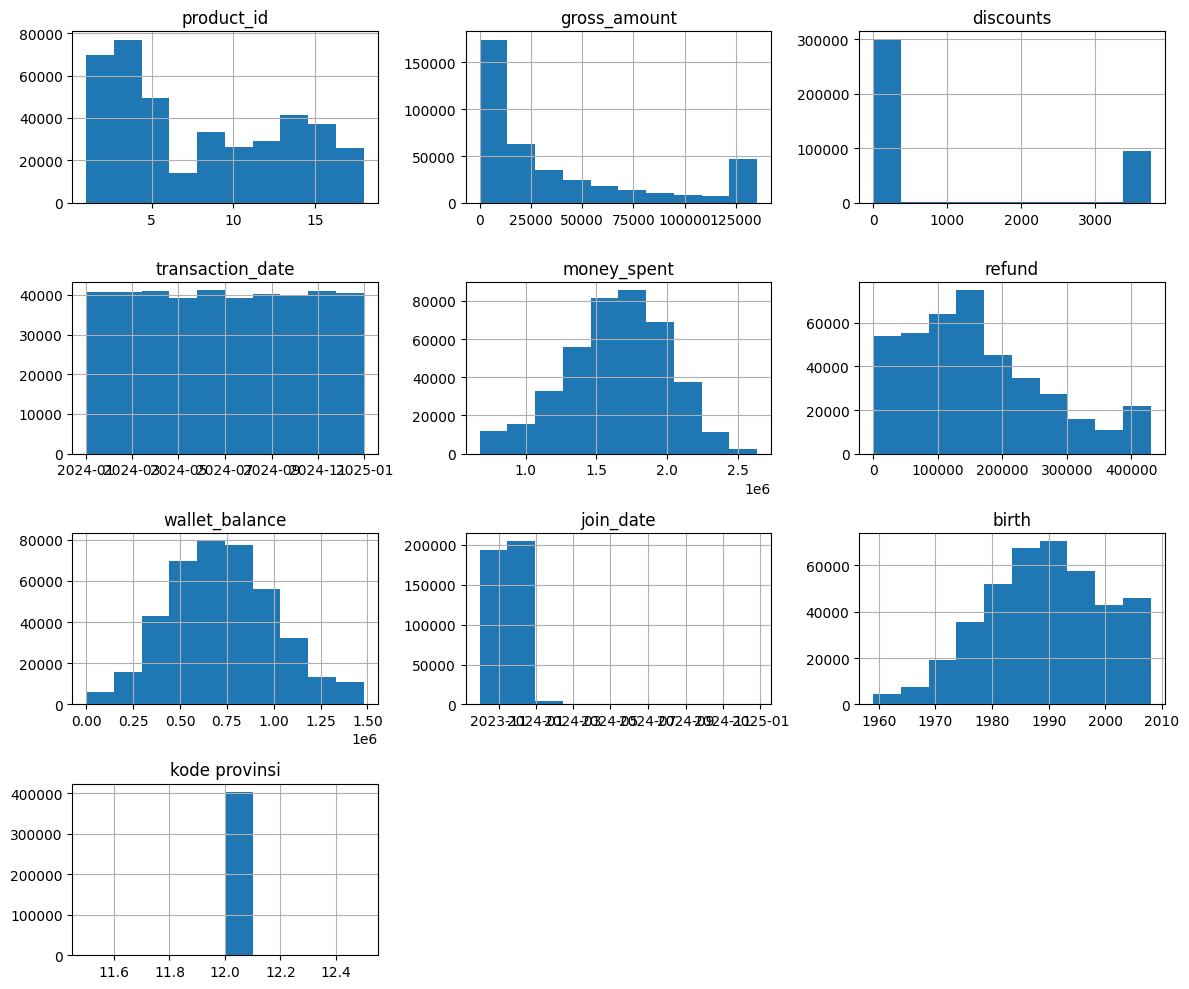

In [ ]:
# Menampilkan histogram pada variabel numerik
data_12.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

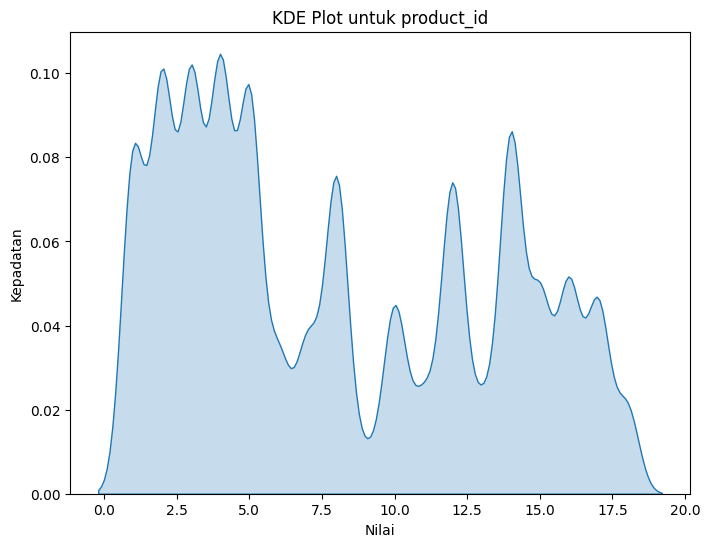

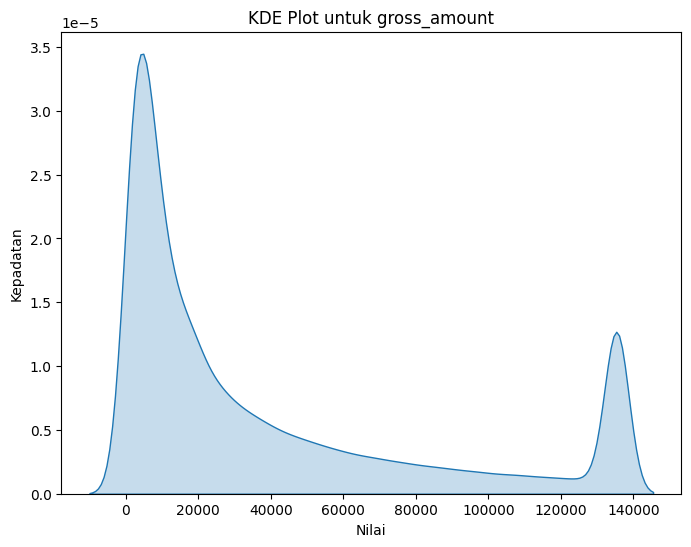

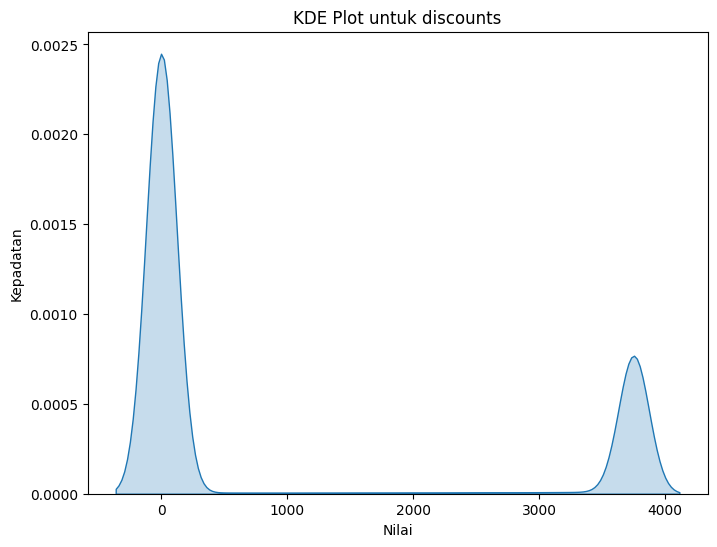

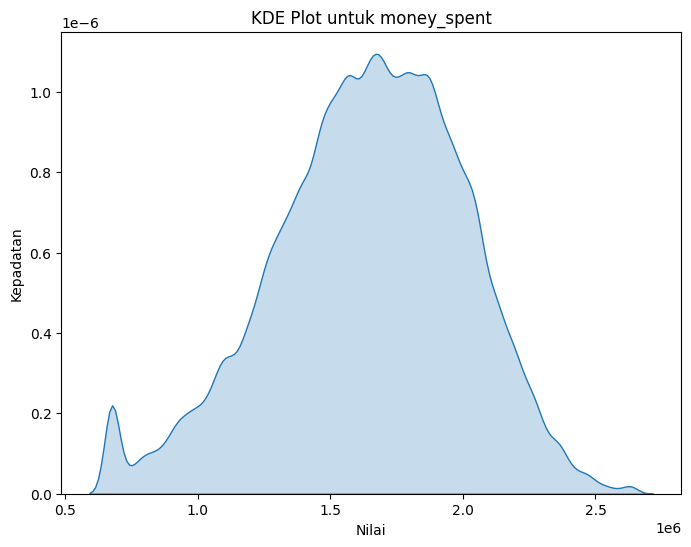

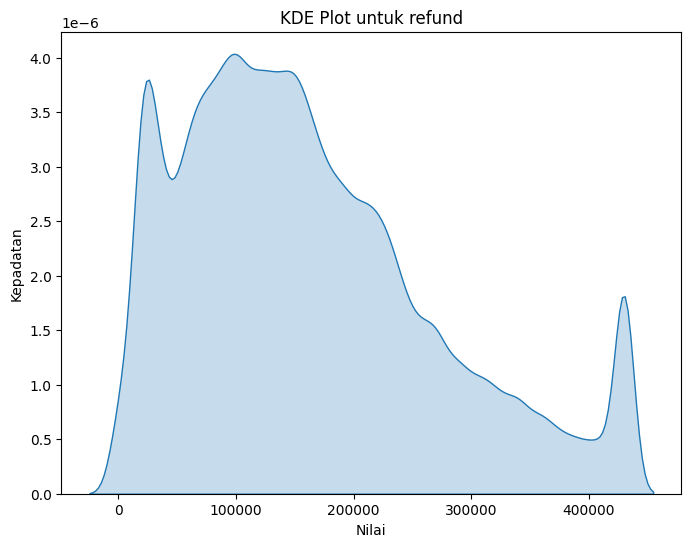

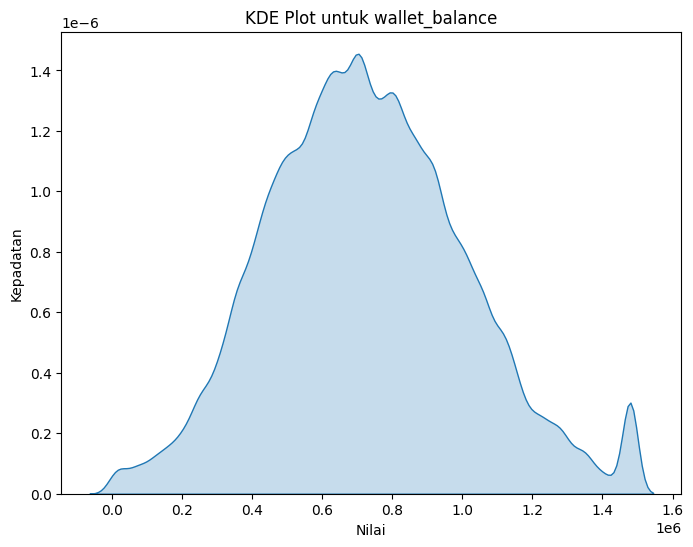

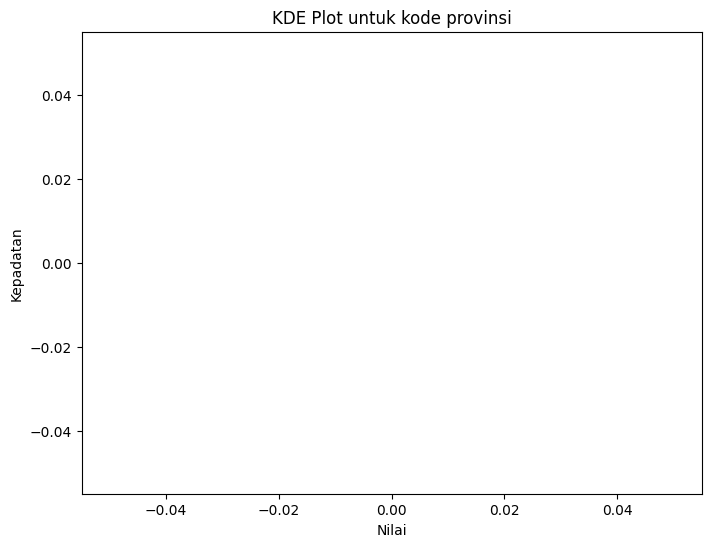

In [ ]:
#KDE Plot untuk mengetahui bentuk distrbusi

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loop melalui setiap kolom dalam DataFrame
for column in data_12.columns:
    # Pilih hanya kolom numerik
    if data_12[column].dtype in ['int64', 'float64']:
        # Buat KDE plot untuk setiap kolom numerik
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data_12[column], shade=True)

        # Tambahkan judul dan label sumbu
        plt.title('KDE Plot untuk ' + column)
        plt.xlabel('Nilai')
        plt.ylabel('Kepadatan')

        # Tampilkan plot
        plt.show()

Berdasarkan histogram dan KDE Plot yang digunakan, kita dapat mengetahui modality dari data (jumlah puncak). Seperti contohnya pada kolom discount adalah bimodal, wallet_balance adalah unimodal, product id adalah multimodal, dan transaction date adalah uniform.

In [ ]:
# Memilih hanya kolom-kolom numerik
numeric_columns = data_12.select_dtypes(include=['int', 'float'])

# Menghitung skewness hanya untuk kolom-kolom numerik
skewness = numeric_columns.skew()

print("Skewness untuk kolom-kolom numerik:")
print(skewness)

Skewness untuk kolom-kolom numerik:
product_id        0.34
gross_amount      1.21
discounts         1.17
money_spent      -0.33
refund            0.76
wallet_balance    0.24
kode provinsi     0.00
dtype: float64


Disini kami ingin **mengkalkulasikan skewness** dari data,

Skewness merupakan cara untuk memperkirakan atau mengukur bentuk distribusi.  skewness digunakan untuk memperkirakan perilaku asimetris daripada menghitung distribusi frekuensi. Skewness dapat terdiri dari dua jenis:

- Simetris: Sebuah distribusi dapat disebut simetris jika terlihat sama dari kiri dan kanan dari titik tengah.
- Asimetris: Sebuah distribusi dapat disebut asimetris jika tidak tampak sama dari kiri dan kanan dari titik pusat.
Distribusi berdasarkan nilai kemencengan:

berikut adalah penjelasan mengenai skewness score:
- Skewness = 0: Berarti terdistribusi secara normal.
- Skewness > 0: Maka lebih banyak bobot di ekor kiri distribusi.
- Skewness < 0: Maka lebih banyak bobot di ekor kanan distribusi.

Berdasarkan skor di atas, dapat disimpulkan bahwa skewness fitur:

Data condong ke kanan:

- product_id (0.34)
- Gross_amount (1.21)
- Discounts (1.17)
- refund (0.76)
- wallet_balance (0.24)


Data condong ke kiri:

- Money_spent (-0.33)

Berdistribusi Normal:

- Kode Provinsi (0.000000)

## Feature Engineering

**Feature Selection**

Feature selection adalah cara memilih subset fitur yang paling relevan dari
kumpulan fitur asli dengan menghapus fitur yang redundan, tidak relevan, atau
berisik. Disini kami hanya memilih beberapa fitur yang relevan untuk kami analisis lebih lanjut hingga pembuatan dashboard

In [ ]:
# Melihat 5 data teratas dari data_12
data_12.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX693205  SC1209182013002           2     68,800.00       0.00   
1  TRX693206  SC1209182013002           2     24,100.00       0.00   
2  TRX693207  SC1209182013002           2     91,900.00   3,750.00   
3  TRX693208  SC1209182013002           2     25,200.00   3,750.00   
4  TRX693209  SC1209182013002           3     23,500.00       0.00   

  transaction_date   product name full_name     gender  money_spent  \
0       2024-11-07  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
1       2024-03-01  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
2       2024-10-25  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
3       2024-03-30  Woman Fashion  PARDIMAN  laki-laki 1,560,000.00   
4       2024-02-10   Food & Drink  PARDIMAN  laki-laki 1,560,000.00   

      refund  wallet_balance  join_date      birth kode kecamatan  \
0 210,000.00      750,000.00 2023-10-23 1977-10-07         120918   
1 210,000.00      750,000.00 2023-10-23 1977-10-07         120918   
2 210,000.00      750,000.00 2023-10-23 1977-10-07         120918   
3 210,000.00      750,000.00 2023-10-23 1977-10-07         120918   
4 210,000.00      750,000.00 2023-10-23 1977-10-07         120918   

    nama provinsi  kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
1  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
2  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
3  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN  
4  SUMATERA UTARA             12         ASAHAN           1209     AEK KUASAN

In [ ]:
# Memilih feature yang relevan yang disimpan dalam variabel feature_12
features_12 = data_12[['user_id', 'wallet_balance', 'money_spent', 'product name', 'gender', 'refund', 'birth', 'nama kabupaten']]

# Melihat isi dari features_12
features_12

user_id  wallet_balance  money_spent   product name  \
0       SC1209182013002      750,000.00 1,560,000.00  Woman Fashion   
1       SC1209182013002      750,000.00 1,560,000.00  Woman Fashion   
2       SC1209182013002      750,000.00 1,560,000.00  Woman Fashion   
3       SC1209182013002      750,000.00 1,560,000.00  Woman Fashion   
4       SC1209182013002      750,000.00 1,560,000.00   Food & Drink   
...                 ...             ...          ...            ...   
408577  SC1212102010002      460,000.00 1,730,000.00    Top Up Game   
408578  SC1212102010002      460,000.00 1,730,000.00      Kesehatan   
408579  SC1212102010002      460,000.00 1,730,000.00      Kesehatan   
408580  SC1212102010002      460,000.00 1,730,000.00      Kesehatan   
408581  SC1212102010002      460,000.00 1,730,000.00      Kesehatan   

           gender     refund      birth nama kabupaten  
0       laki-laki 210,000.00 1977-10-07         ASAHAN  
1       laki-laki 210,000.00 1977-10-07         ASAHAN  
2       laki-laki 210,000.00 1977-10-07         ASAHAN  
3       laki-laki 210,000.00 1977-10-07         ASAHAN  
4       laki-laki 210,000.00 1977-10-07         ASAHAN  
...           ...        ...        ...            ...  
408577  perempuan  80,000.00 1990-03-17           TOBA  
408578  perempuan  80,000.00 1990-03-17           TOBA  
408579  perempuan  80,000.00 1990-03-17           TOBA  
408580  perempuan  80,000.00 1990-03-17           TOBA  
408581  perempuan  80,000.00 1990-03-17           TOBA  

[403345 rows x 8 columns]

Diatas adalah Feature yang digunakan, yaitu user_id, wallet_balance, money_spent, product_name, gender, refund, birth dan nama kabupaten. dapat dilihat juga pada data diatas, beberapa baris memiliki user_id yang sama, oleh karena itu kami harus melakukan group by berdasarkan user_id.

**Feature encoding (one hot encoding)**

Karena kami ingin melihat jumlah transaksi user pada setiap produk, kami pertama kali akan melakukan one hot encoding pada product_name, kemudian nanti kami akan melakukan fungsi agregasi sum pada product_name bersamaan dengan groupby berdasarkan user_id untuk melihat jumlah pembelian produk masing-masing user

In [ ]:
# Melakukan One Hot Encoding pada kolom product name feature_12 yang disimpan dalam variabel encoded_12
encoded_12 = pd.get_dummies(features_12, columns=['product name'], dtype=int)

# Menampilkan 5 data teratas pada encoded_35
encoded_12.head(5)

user_id  wallet_balance  money_spent     gender     refund  \
0  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
1  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
2  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
3  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
4  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   

       birth nama kabupaten  product name_Elektronik  \
0 1977-10-07         ASAHAN                        0   
1 1977-10-07         ASAHAN                        0   
2 1977-10-07         ASAHAN                        0   
3 1977-10-07         ASAHAN                        0   
4 1977-10-07         ASAHAN                        0   

   product name_Food & Drink  product name_Hotel  ...  product name_Other  \
0                          0                   0  ...                   0   
1                          0                   0  ...                   0   
2                          0                   0  ...                   0   
3                          0                   0  ...                   0   
4                          1                   0  ...                   0   

   product name_Otomotif  product name_Pulsa  product name_Ride Hailing  \
0                      0                   0                          0   
1                      0                   0                          0   
2                      0                   0                          0   
3                      0                   0                          0   
4                      0                   0                          0   

   product name_Sewa Motor/Mobil  product name_Tagihan (WIFI, PLN)  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   product name_Top Up Game  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  
0                           1  
1                           1  
2                           1  
3                           1  
4                           0  

[5 rows x 25 columns]

**Feature Creation**

Pada feature creation, kami membuat kolom age berdasarkan kolom birth, dan kami akan membuat kolom total transaksi dengan menjumlahkan semua transaksi produk. Kolom age nantinya akan digunakan saat membuat dashboard, dan total transaksi akan digunakan untuk pembentukan cluster

In [ ]:
# Membuat Kolom Age
def calculate_age(birth_date):
    today = pd.Timestamp.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Membuat kolom 'age' berdasarkan kolom 'birth'
encoded_12['age'] = encoded_12['birth'].apply(calculate_age)

# Memindahkan kolom 'age' ke posisi ke-7
col_name = 'age'
col_position = 6  # posisi ke-7 (index mulai dari 0)
age_col = encoded_12.pop(col_name)
encoded_12.insert(col_position, col_name, age_col)

In [ ]:
# Membuat kolom total transaksi
encoded_12['total_transaksi'] = encoded_12.iloc[:, 8:].sum(axis=1)

In [ ]:
# Melihat 5 data teratas encoded_12 yang sudah dilakukan feature creation
encoded_12.head(5)

user_id  wallet_balance  money_spent     gender     refund  \
0  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
1  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
2  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
3  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   
4  SC1209182013002      750,000.00 1,560,000.00  laki-laki 210,000.00   

       birth  age nama kabupaten  product name_Elektronik  \
0 1977-10-07   46         ASAHAN                        0   
1 1977-10-07   46         ASAHAN                        0   
2 1977-10-07   46         ASAHAN                        0   
3 1977-10-07   46         ASAHAN                        0   
4 1977-10-07   46         ASAHAN                        0   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          0  ...                      0                   0   
1                          0  ...                      0                   0   
2                          0  ...                      0                   0   
3                          0  ...                      0                   0   
4                          1  ...                      0                   0   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  total_transaksi  
0                           1                1  
1                           1                1  
2                           1                1  
3                           1                1  
4                           0                1  

[5 rows x 27 columns]

**Grouping Data**

Disini, kami menggunakan data grouping, berdasarkan user_id

In [ ]:
# Mengecek jumlah nilai unik dalam kolom 'user_id'
unique_id_count = data_12['user_id'].nunique()

print("\nJumlah nilai unik dalam kolom 'user_id':")
print(unique_id_count)



Jumlah nilai unik dalam kolom 'user_id':
13145


berdasarkan jumlah nilai unik pada kolom user_id, disimpulkan bahwa terdapat 13145 user unik pada provinsi sumatera utara (trx 12)

In [ ]:
# Agregasi pada kolom
agg_dict = {
    'money_spent': 'mean',
    'refund': 'mean',
    'wallet_balance': 'mean',
    'age': 'mean',
    'gender': 'first',
    'birth': 'first',
    'nama kabupaten': 'first'
}

# Menambahkan fungsi sum untuk semua kolom produk
for column in encoded_12.columns:
    if column not in ['user_id', 'money_spent', 'refund', 'wallet_balance', 'age', 'gender', 'birth', 'nama kabupaten']:
        agg_dict[column] = 'sum'

# Group by 'user_id' dan 'product_id', aggregate sesuai dengan agg_dict
grouped_12 = encoded_12.groupby('user_id').agg(agg_dict).reset_index()

# Mengatur tampilan agar hasil lebih mudah dibaca
pd.options.display.float_format = '{:,.2f}'.format

# Melihat 5 data teratas dari seluruh data yang telah dilakukan grouping
grouped_12.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC1201011001001 1,780,000.00  30,000.00      440,000.00 50.00  perempuan   
1  SC1201011001002 1,780,000.00  40,000.00      490,000.00 16.00  perempuan   
2  SC1201011001004 1,720,000.00  60,000.00      580,000.00 29.00  perempuan   
3  SC1201011002001 1,810,000.00  50,000.00      510,000.00 34.00  laki-laki   
4  SC1201011002003 1,630,000.00 100,000.00      880,000.00 16.00  perempuan   

       birth   nama kabupaten  product name_Elektronik  \
0 1974-02-17  TAPANULI TENGAH                        3   
1 2007-11-21  TAPANULI TENGAH                        3   
2 1994-06-21  TAPANULI TENGAH                        3   
3 1989-10-06  TAPANULI TENGAH                        4   
4 2007-11-20  TAPANULI TENGAH                        4   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          3  ...                      0                   0   
1                          2  ...                      3                   0   
2                          0  ...                      4                   0   
3                          2  ...                      2                   0   
4                          3  ...                      4                   0   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          0                              0   
1                          4                              4   
2                          2                              0   
3                          3                              2   
4                          4                              0   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 0                         0   
1                                 0                         3   
2                                 0                         2   
3                                 0                         3   
4                                 0                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     3   
3                                                  0                     0   
4                                                  0                     3   

   product name_Woman Fashion  total_transaksi  
0                           4               17  
1                           2               29  
2                           3               26  
3                           3               32  
4                           3               30  

[5 rows x 27 columns]

Setelah dilakukan groupby berdasarkan user_id, dapat dilihat tidak adanya redundansi baris user_id, lengkap dengan jumlah transaksi setiap produk dan total transaksi

**Feature Correlation**

Disini, kami ingin melihat korelasi antar fitur, semakin mendekati angka 1, baik plus atau minus, maka korelasi akan semakin kuat baik secara positif maupun negatif.

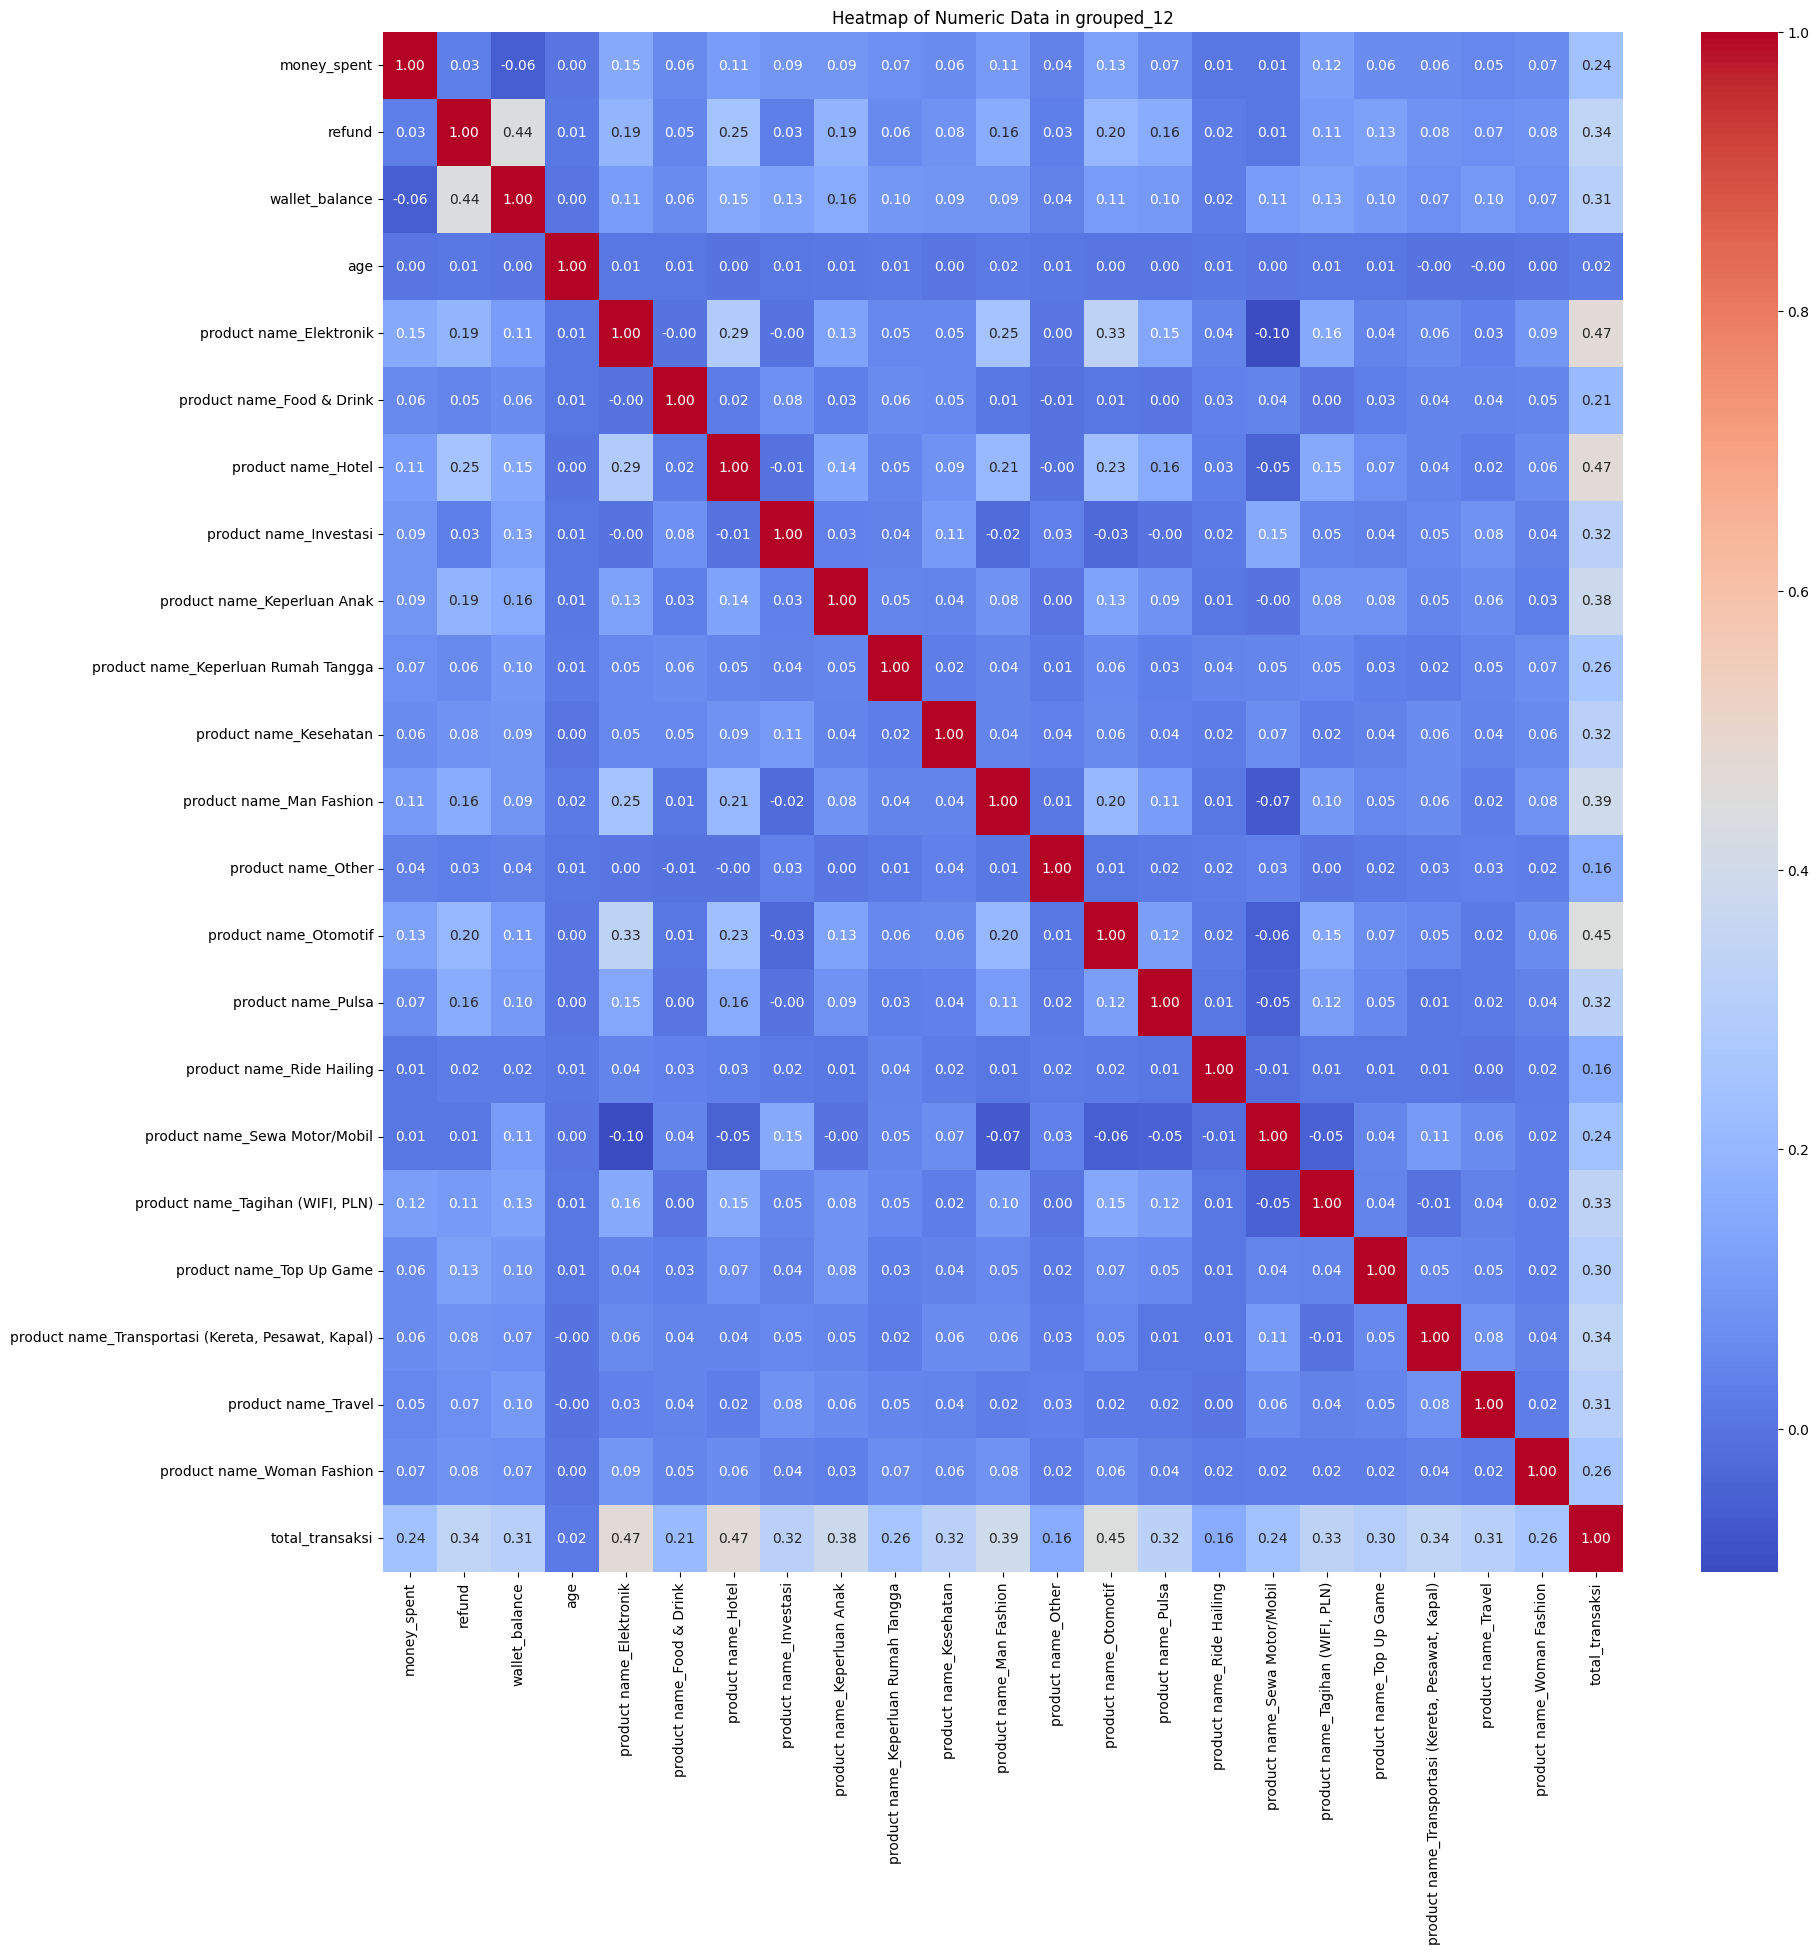

In [ ]:
# Memilih hanya kolom numerik
numeric_cols = grouped_12.select_dtypes(include='number')

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numeric Data in grouped_12')
plt.show()

Dari correlation heatmap diatas, dapat diketahui bahwa fitur yang paling berkorelasi tinggi adalah product name_ Elektronik dan product name_ Hotel dengan kolom total_transaksi (nilai korelasio 0.47)

## Modelling

Saat modeling, sesuai dengan judul project kami yang mengsegmentasi berdasarkan transaksi, maka kami akan menggunakan kolom money_spent, transaksi produk, dan total transaksi saja

In [ ]:
# Column_cluster_12 adalah variabel yang berisi kolom untuk pembuatan cluster, drop data yang tidak digunakan
column_cluster_12 = grouped_12.drop(columns=['user_id', 'refund', 'age', 'wallet_balance', 'gender', 'birth', 'nama kabupaten'])

**Feature Scaling**

Scaling dilakukan untuk mentransformasi nilai dari suatu fitur menjadi
range yang spesifik. Feature Scaling yang digunakan adalah normalisasi (MinMaxScaler), MinMaxScaler akan memperkecil rentang data dari 0 sampai 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_vector = column_cluster_12.values.flatten().reshape(-1, 1)

# Gunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()

# Lakukan scaling
scaled_vector = scaler.fit_transform(data_vector)

# Kembalikan vektor yang telah discaling ke bentuk aslinya (dataframe)
column_cluster_12 = pd.DataFrame(scaled_vector.reshape(column_cluster_12.shape), columns=column_cluster_12.columns)

**Model 1 - Mini Batch Kmeans Clustering**

Pada final project ini, sebelum menerapkan model final, kami akan membandingkan algoritma kmeans dan mini batch kmeans terlebih dahulu berdasarkan silhoutte score.

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import MiniBatchKMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, random state dan batch size nya
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, max_iter=50, random_state=42, batch_size = 20 )
mini_batch_kmeans.fit(column_cluster_12)

MiniBatchKMeans(batch_size=20, max_iter=50, n_clusters=4, random_state=42)

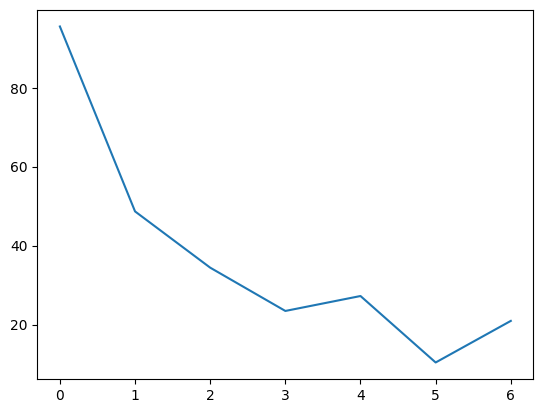

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  mini_batch_kmeans = MiniBatchKMeans (n_clusters=num_clusters, max_iter=50, random_state=42, batch_size = 20)
  mini_batch_kmeans.fit(column_cluster_12)

  ssd.append(mini_batch_kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
    # Inisialisasi Mini-Batch K-Means
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, max_iter = 50, batch_size = 20)
    mini_batch_kmeans.fit(column_cluster_12)
    cluster_labels = mini_batch_kmeans.labels_

    # Kalkulasi silhouette score
    silhouette_avg = silhouette_score(column_cluster_12, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5610560693518739
For n_clusters=3, the silhouette score is 0.5393326306146349
For n_clusters=4, the silhouette score is 0.5129582974134897
For n_clusters=5, the silhouette score is 0.5123760880146636
For n_clusters=6, the silhouette score is 0.4698356425374538
For n_clusters=7, the silhouette score is 0.5223711072176949
For n_clusters=8, the silhouette score is 0.4619374565755916


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.5610560693518739. Silhoutte score juga berperan sebagai metrik evaluasi yang mengindikasikan baik buruknya suatu model cluster.

**Model 2 - Kmeans Clustering**

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import KMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, dan random state
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(column_cluster_12)

KMeans(max_iter=50, n_clusters=4, random_state=42)

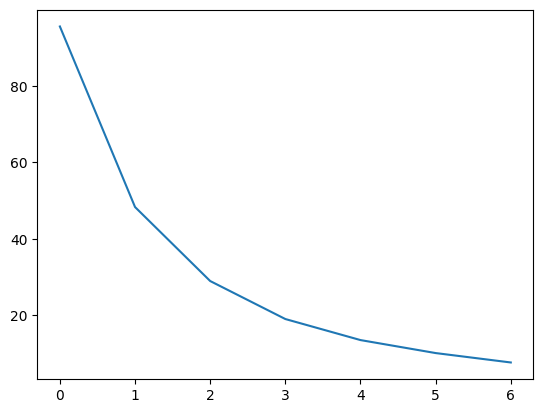

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  kmeans = KMeans (n_clusters=num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_12)

  ssd.append(kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

Berdasarkan elbow method yang ada, jumlah kluster optimal adalah 2

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
  # Inisialisasi model
  kmeans = KMeans (num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_12)
  cluster_labels = kmeans.labels_

# Kalkulasi silhouette Score
  silhouette_avg = silhouette_score(column_cluster_12, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5610560693518739
For n_clusters=3, the silhouette score is 0.5380931118247988
For n_clusters=4, the silhouette score is 0.5272249818720927
For n_clusters=5, the silhouette score is 0.5287851210793143
For n_clusters=6, the silhouette score is 0.5247677412206365
For n_clusters=7, the silhouette score is 0.523158335486726
For n_clusters=8, the silhouette score is 0.5295295143675237


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.5610560693518739

**Final Model**

Dari kedua model, minibatch dan kemans, dengan jumlah kluster yang sama yaitu 2, kmeans dan minibatch kmeans memiliki silhoutte score yang sama. Namun seiring bertambahnya jumlah kluster, silhouette score dari minibatch kmeans tidak stabil di angka 0.5, berbeda dengan kmeans yang stabil di angka 0.5. Oleh karena itu kami memilih model kmeans.

In [ ]:
# Final model dengan k=2
kmeans = KMeans (n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(column_cluster_12)

KMeans(max_iter=50, n_clusters=2, random_state=42)

In [ ]:
# Menetapkan label pada grouped_12
grouped_12['Cluster_id'] = kmeans.labels_
grouped_12.sample(5)

user_id  money_spent     refund  wallet_balance   age  \
11418  SC1225022005001 1,070,000.00 230,000.00      500,000.00 19.00   
12011  SC1272011002017 1,720,000.00 130,000.00      840,000.00 41.00   
406    SC1201142006003 1,640,000.00  90,000.00      830,000.00 51.00   
3028   SC1205161010002   970,000.00 170,000.00      650,000.00 43.00   
12415  SC1273031004022 1,880,000.00 130,000.00      590,000.00 35.00   

          gender      birth        nama kabupaten  product name_Elektronik  \
11418  perempuan 2004-11-24            NIAS BARAT                        0   
12011  perempuan 1983-02-03  KOTA PEMATANGSIANTAR                        3   
406    laki-laki 1972-07-16       TAPANULI TENGAH                        3   
3028   perempuan 1981-01-20               LANGKAT                        3   
12415  laki-laki 1989-03-26          KOTA SIBOLGA                        3   

       product name_Food & Drink  ...  product name_Pulsa  \
11418                          3  ...                   0   
12011                          4  ...                   0   
406                            3  ...                   0   
3028                           4  ...                   3   
12415                          4  ...                   0   

       product name_Ride Hailing  product name_Sewa Motor/Mobil  \
11418                          2                              4   
12011                          2                              3   
406                            4                              3   
3028                           2                              2   
12415                          2                              2   

       product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
11418                                 0                         0   
12011                                 0                         3   
406                                   0                         0   
3028                                  0                         0   
12415                                 0                         0   

       product name_Transportasi (Kereta, Pesawat, Kapal)  \
11418                                                  4    
12011                                                  3    
406                                                    0    
3028                                                   3    
12415                                                  0    

       product name_Travel  product name_Woman Fashion  total_transaksi  \
11418                    0                           4               30   
12011                    0                           4               39   
406                      2                           3               37   
3028                     3                           2               28   
12415                    0                           4               30   

       Cluster_id  
11418           1  
12011           0  
406             0  
3028            1  
12415           0  

[5 rows x 28 columns]

Cluster id diterapkan pada variabel grouped_12, yang sebelumnya sudah dijelaskan berisi kolom yang ingin kita analisa lebih lanjut.

In [ ]:
# Mengubah nama kolom agar data menjadi lebih rapi
grouped_12 = grouped_12.rename(columns=lambda x: x.replace('product name_', 'Transaksi '))

# Melihat 5 data teratas dari grouped_12
grouped_12.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC1201011001001 1,780,000.00  30,000.00      440,000.00 50.00  perempuan   
1  SC1201011001002 1,780,000.00  40,000.00      490,000.00 16.00  perempuan   
2  SC1201011001004 1,720,000.00  60,000.00      580,000.00 29.00  perempuan   
3  SC1201011002001 1,810,000.00  50,000.00      510,000.00 34.00  laki-laki   
4  SC1201011002003 1,630,000.00 100,000.00      880,000.00 16.00  perempuan   

       birth   nama kabupaten  Transaksi Elektronik  Transaksi Food & Drink  \
0 1974-02-17  TAPANULI TENGAH                     3                       3   
1 2007-11-21  TAPANULI TENGAH                     3                       2   
2 1994-06-21  TAPANULI TENGAH                     3                       0   
3 1989-10-06  TAPANULI TENGAH                     4                       2   
4 2007-11-20  TAPANULI TENGAH                     4                       3   

   ...  Transaksi Pulsa  Transaksi Ride Hailing  Transaksi Sewa Motor/Mobil  \
0  ...                0                       0                           0   
1  ...                0                       4                           4   
2  ...                0                       2                           0   
3  ...                0                       3                           2   
4  ...                0                       4                           0   

   Transaksi Tagihan (WIFI, PLN)  Transaksi Top Up Game  \
0                              0                      0   
1                              0                      3   
2                              0                      2   
3                              0                      3   
4                              0                      0   

   Transaksi Transportasi (Kereta, Pesawat, Kapal)  Transaksi Travel  \
0                                                0                 0   
1                                                0                 0   
2                                                0                 3   
3                                                0                 0   
4                                                0                 3   

   Transaksi Woman Fashion  total_transaksi  Cluster_id  
0                        4               17           0  
1                        2               29           0  
2                        3               26           0  
3                        3               32           0  
4                        3               30           0  

[5 rows x 28 columns]

In [ ]:
# Mengecek jumlah masing-masing cluster
name_counts = grouped_12['Cluster_id'].value_counts()

print("\nFrekuensi nilai unik dalam kolom 'cluster_id':")
print(name_counts)


Frekuensi nilai unik dalam kolom 'cluster_id':
Cluster_id
0    7327
1    5818
Name: count, dtype: int64


Dapat terlihat, jumlah cluster 0 lebih banyak daripada cluster 1

In [ ]:
from google.colab import files

grouped_12.to_csv("grouped_12_new.csv", index=False)
# Mengunduh file CSV
files.download("grouped_12_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Diatas adalah kode untuk mengunduh file csv grouped_12 yang sudah di assign label dan diubah nama kolomnya.

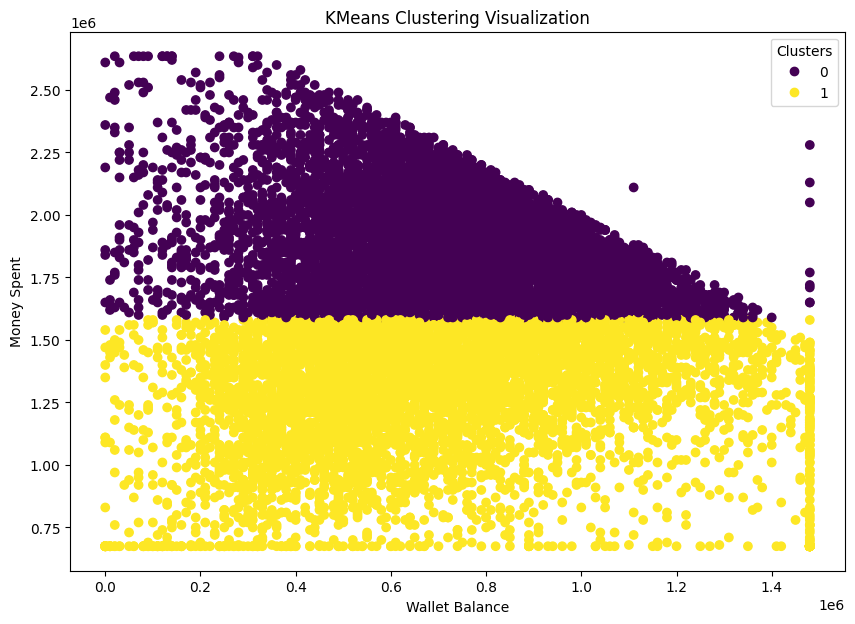

In [ ]:
# Visualisasi hasil clustering berdasarkan 'wallet_balance' dan 'money_spent'
plt.figure(figsize=(10, 7))
scatter = plt.scatter(grouped_12['wallet_balance'], grouped_12['money_spent'], c=grouped_12['Cluster_id'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization')
plt.xlabel('Wallet Balance')
plt.ylabel('Money Spent')
plt.show()

Karena dimensi data yang besar, kami mencoba memvisualisasikan dalam 2 dimensi saja menggunakan wallet_balance dan money spent. Dapat terlihat data tercluster dengan baik

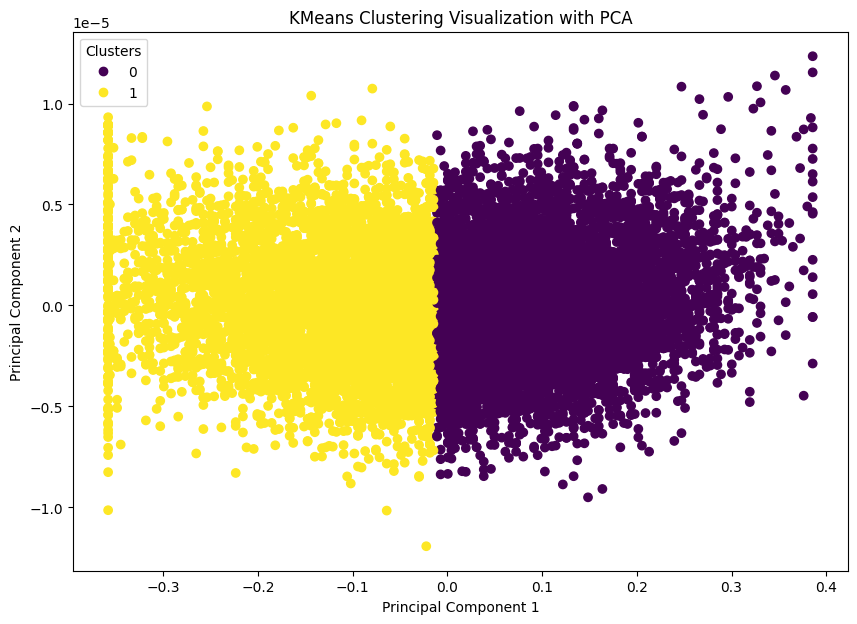

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Proyeksi data ke dalam dua dimensi menggunakan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(column_cluster_12)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Menambahkan label ke DataFrame PCA untuk visualisasi
pca_df['cluster_label'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['cluster_label'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Karena dimensi data yang sangat besar pula, kami menggunakan pca untuk memproyeksikan data menjadi dua dimensi saja. Dapat terlihat bahwa data terc;uster dengan baik

# Sumatera Barat (TRX 13)

## Data Preparation

**Data Merging**

Dilakukan data merging pada 4 tabel : transaction_13, product_reference, user, dan location_reference untuk melihat sekiranya informasi apa yang dapat diambil dari keseluruhan tabel.

In [ ]:
# Melihat tabel transaction_13
transaction_13

trx_id          user_id  product_id  gross_amount  discounts  \
0       TRX258654  SC1306072005001           1     21,800.00        NaN   
1       TRX258655  SC1306072005001           1     28,600.00        NaN   
2       TRX258656  SC1306072005001           1     29,600.00  29,600.00   
3       TRX258657  SC1306072005001           2     59,000.00        NaN   
4       TRX258658  SC1306072005001           2     22,400.00        NaN   
...           ...              ...         ...           ...        ...   
391287  TRX649941  SC1304012001008          13      9,400.00        NaN   
391288  TRX649942  SC1304012001008          17     28,400.00        NaN   
391289  TRX649943  SC1304012001008          17      6,900.00        NaN   
391290  TRX649944  SC1304012001008          17     19,600.00   2,400.00   
391291  TRX649945  SC1304012001008          17     15,100.00   7,600.00   

       transaction_date  
0            2024-03-22  
1            2024-05-24  
2            2024-09-08  
3            2024-06-03  
4            2024-08-15  
...                 ...  
391287       2024-12-25  
391288       2024-03-14  
391289       2024-03-27  
391290       2024-11-13  
391291       2024-09-09  

[391292 rows x 6 columns]

In [ ]:
# Melakukan left join berdasarkan kolom 'Product ID'
product_transaction_13 = pd.merge(transaction_13, product_reference, on='product_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel transaction_13 dan product_reference bernama product_transaction_13
product_transaction_13.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX258654  SC1306072005001           1     21,800.00        NaN   
1  TRX258655  SC1306072005001           1     28,600.00        NaN   
2  TRX258656  SC1306072005001           1     29,600.00  29,600.00   
3  TRX258657  SC1306072005001           2     59,000.00        NaN   
4  TRX258658  SC1306072005001           2     22,400.00        NaN   

  transaction_date   product name  
0       2024-03-22    Man Fashion  
1       2024-05-24    Man Fashion  
2       2024-09-08    Man Fashion  
3       2024-06-03  Woman Fashion  
4       2024-08-15  Woman Fashion

In [ ]:
# Melakukan left join berdasarkan kolom 'User ID'
user_transaction_13 = pd.merge(product_transaction_13, user, on='user_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel product_transaction_13 dan user bernama user_transaction_13
user_transaction_13.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX258654  SC1306072005001           1     21,800.00        NaN   
1  TRX258655  SC1306072005001           1     28,600.00        NaN   
2  TRX258656  SC1306072005001           1     29,600.00  29,600.00   
3  TRX258657  SC1306072005001           2     59,000.00        NaN   
4  TRX258658  SC1306072005001           2     22,400.00        NaN   

  transaction_date   product name full_name     gender  money_spent    refund  \
0       2024-03-22    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
1       2024-05-24    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
2       2024-09-08    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
3       2024-06-03  Woman Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
4       2024-08-15  Woman Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   

   wallet_balance   join_date       birth kode kecamatan  
0      670,000.00  2023-10-30  2002-05-16         130607  
1      670,000.00  2023-10-30  2002-05-16         130607  
2      670,000.00  2023-10-30  2002-05-16         130607  
3      670,000.00  2023-10-30  2002-05-16         130607  
4      670,000.00  2023-10-30  2002-05-16         130607

In [ ]:
# Melakukan left join berdasarkan kolom 'kode kecamatan'
data_13 = pd.merge(user_transaction_13, location_reference, on='kode kecamatan', how='left')

#  Melihat 5 data teratas dari hasil merging tabel user_transaction_13 dan location_reference bernama data_13
data_13.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX258654  SC1306072005001           1     21,800.00        NaN   
1  TRX258655  SC1306072005001           1     28,600.00        NaN   
2  TRX258656  SC1306072005001           1     29,600.00  29,600.00   
3  TRX258657  SC1306072005001           2     59,000.00        NaN   
4  TRX258658  SC1306072005001           2     22,400.00        NaN   

  transaction_date   product name full_name     gender  money_spent    refund  \
0       2024-03-22    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
1       2024-05-24    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
2       2024-09-08    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
3       2024-06-03  Woman Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
4       2024-08-15  Woman Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   

   wallet_balance   join_date       birth kode kecamatan   nama provinsi  \
0      670,000.00  2023-10-30  2002-05-16         130607  SUMATERA BARAT   
1      670,000.00  2023-10-30  2002-05-16         130607  SUMATERA BARAT   
2      670,000.00  2023-10-30  2002-05-16         130607  SUMATERA BARAT   
3      670,000.00  2023-10-30  2002-05-16         130607  SUMATERA BARAT   
4      670,000.00  2023-10-30  2002-05-16         130607  SUMATERA BARAT   

   kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0             13           AGAM           1306   AMPEK ANGKEK  
1             13           AGAM           1306   AMPEK ANGKEK  
2             13           AGAM           1306   AMPEK ANGKEK  
3             13           AGAM           1306   AMPEK ANGKEK  
4             13           AGAM           1306   AMPEK ANGKEK

In [ ]:
# Melihat 5 sampel data
data_13.sample(5)

trx_id          user_id  product_id  gross_amount  discounts  \
308494  TRX567148  SC1303102002004          14     24,900.00        NaN   
221396  TRX480050  SC1308072001003          12      5,000.00        NaN   
151534  TRX410188  SC1372011005006           5     16,700.00  16,700.00   
313116  TRX571770  SC1303042009006           3     94,300.00  21,900.00   
358336  TRX616990  SC1311052002007           3     91,200.00  31,000.00   

       transaction_date            product name                 full_name  \
308494       2024-04-27               Kesehatan  MAKARAWO IRAWATI M.Pd.K.   
221396       2024-03-22                Otomotif         Dr. SAPUTRA M.Sc.   
151534       2024-07-22  Keperluan Rumah Tangga         AJUNI S.H., M.Kn.   
313116       2024-10-17            Food & Drink               ANNA S.Psi.   
358336       2024-05-25            Food & Drink         Muchamat GERUNGAN   

           gender  money_spent     refund  wallet_balance   join_date  \
308494  perempuan 1,820,000.00 110,000.00      500,000.00  2023-10-31   
221396  laki-laki 1,170,000.00  30,000.00      350,000.00  2023-10-23   
151534  perempuan 1,410,000.00 250,000.00      590,000.00  2023-10-08   
313116  perempuan 1,700,000.00 100,000.00      510,000.00  2023-12-22   
358336  laki-laki 2,080,000.00 240,000.00      760,000.00  2023-11-19   

             birth kode kecamatan   nama provinsi  kode provinsi  \
308494  1981-06-17         130310  SUMATERA BARAT             13   
221396  1994-08-01         130807  SUMATERA BARAT             13   
151534  1993-07-04         137201  SUMATERA BARAT             13   
313116  1988-06-22         130304  SUMATERA BARAT             13   
358336  1989-11-04         131105  SUMATERA BARAT             13   

       nama kabupaten kode kabupaten      nama kecamatan  
308494      SIJUNJUNG           1303             KUPITAN  
221396        PASAMAN           1308               PANTI  
151534     KOTA SOLOK           1372       LUBUK SIKARAH  
313116      SIJUNJUNG           1303           SIJUNJUNG  
358336  SOLOK SELATAN           1311  SANGIR BATANG HARI

In [ ]:
# Melihat informasi dari data_13
data_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391292 entries, 0 to 391291
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trx_id            391292 non-null  object 
 1   user_id           391292 non-null  object 
 2   product_id        391292 non-null  int64  
 3   gross_amount      389081 non-null  float64
 4   discounts         106806 non-null  float64
 5   transaction_date  391292 non-null  object 
 6   product name      391292 non-null  object 
 7   full_name         391292 non-null  object 
 8   gender            391292 non-null  object 
 9   money_spent       391292 non-null  float64
 10  refund            391292 non-null  float64
 11  wallet_balance    391292 non-null  float64
 12  join_date         391292 non-null  object 
 13  birth             391292 non-null  object 
 14  kode kecamatan    391292 non-null  object 
 15  nama provinsi     391292 non-null  object 
 16  kode provinsi     39

In [ ]:
# Melihat detail statistik dari data_13
data_13.describe()

product_id  gross_amount  discounts  money_spent        refund  \
count  391,292.00    389,081.00 106,806.00   391,292.00    391,292.00   
mean         8.38     48,503.11  19,615.19 1,679,839.33    111,561.24   
std          5.41     80,230.20  21,460.33   369,003.87    122,742.43   
min          1.00       -100.00    -100.00         0.00 -5,260,000.00   
25%          4.00      5,800.00   7,025.00 1,440,000.00     70,000.00   
50%          8.00     18,700.00  10,700.00 1,710,000.00    100,000.00   
75%         13.00     56,100.00  24,900.00 1,940,000.00    150,000.00   
max         18.00  2,439,800.00 580,000.00 8,880,000.00  7,000,000.00   

       wallet_balance  kode provinsi  
count      391,292.00     391,292.00  
mean       663,352.79          13.00  
std        338,471.05           0.00  
min     -6,280,000.00          13.00  
25%        500,000.00          13.00  
50%        660,000.00          13.00  
75%        820,000.00          13.00  
max      7,260,000.00          13.00

melihat kolom gross_amount, refund, discounts dan wallet_balance ada yang bernilai minus, kami menganggap kolom tersebut adalah anomali karena berdasarkan analisa kami, kolom tersebut tidak mungkin minus. Oleh karena itu, kami langsung melakukan drop baris pada kolom bernilai minus tersebut.

In [ ]:
# Kolom-kolom yang ingin dilakukan pengecekan baris berisi nilai minus
Columns = ['gross_amount', 'refund', 'discounts', 'wallet_balance']

# Menghapus baris dengan nilai minus di salah satu dari empat kolom
data_13 = data_13.drop(data_13[(data_13[Columns] < 0).any(axis=1)].index)

In [ ]:
# Mengecek detail statistik dari data yang sudah dihilangkan anomali pada data
data_13.describe()

product_id  gross_amount  discounts  money_spent       refund  \
count  388,041.00    385,886.00 105,930.00   388,041.00   388,041.00   
mean         8.38     48,471.26  19,610.42 1,679,109.86   114,362.97   
std          5.41     80,075.47  21,343.69   362,373.96    93,655.81   
min          1.00          0.00       0.00         0.00         0.00   
25%          4.00      5,800.00   7,100.00 1,440,000.00    70,000.00   
50%          8.00     18,700.00  10,700.00 1,710,000.00   100,000.00   
75%         13.00     56,100.00  24,900.00 1,940,000.00   150,000.00   
max         18.00  2,439,800.00 462,700.00 2,910,000.00 7,000,000.00   

       wallet_balance  kode provinsi  
count      388,041.00     388,041.00  
mean       675,268.67          13.00  
std        293,317.97           0.00  
min              0.00          13.00  
25%        500,000.00          13.00  
50%        660,000.00          13.00  
75%        830,000.00          13.00  
max      7,260,000.00          13.00

Dapat dilihat, nilai yang sebelumnya minus pada kolom gross_amount, refund, discounts dan wallet balance sudah dihilangkan.

**Check Missing Value**

In [ ]:
# Mengecek jumlah nilai null pada setiap kolom pada data_13
data_13.isnull().sum()

trx_id                   0
user_id                  0
product_id               0
gross_amount          2155
discounts           282111
transaction_date         0
product name             0
full_name                0
gender                   0
money_spent              0
refund                   0
wallet_balance           0
join_date                0
birth                    0
kode kecamatan           0
nama provinsi            0
kode provinsi            0
nama kabupaten           0
kode kabupaten           0
nama kecamatan           0
dtype: int64

Terdapat nilai null pada discounts dan gross amount

In [ ]:
# Mengisi nilai discounts dengan nilai 0
data_13['discounts'] = data_13['discounts'].fillna(0)

Kami mengisi nilai discounts dengan 0 dengan asumsi nilai discounts yang kosong menandakan tidak adanya discount --> 0

In [ ]:
# Menghitung skewness hanya untuk kolom 'gross_amount' untuk menentukan cara mengisi nilai null pada gross_amount
skewness_gross_amount = data_13['gross_amount'].skew()

# Mencetak nilai skewness
print("Skewness untuk kolom 'gross_amount':", skewness_gross_amount)

Skewness untuk kolom 'gross_amount': 4.340568302756446


Karena Right Skewness, digunakan median untuk mengisi missing value pada kolom gross_amount

In [ ]:
# Hitung nilai median dari kolom 'gross_amount'
median_gross_amount = data_13['gross_amount'].median()

# Mengisi nilai null dalam kolom 'gross_amount' dengan nilai median
data_13['gross_amount'].fillna(median_gross_amount, inplace=True)

In [ ]:
# Mengecek apakah masih ada nilai yang null
data_13.isnull().sum()

trx_id              0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
product name        0
full_name           0
gender              0
money_spent         0
refund              0
wallet_balance      0
join_date           0
birth               0
kode kecamatan      0
nama provinsi       0
kode provinsi       0
nama kabupaten      0
kode kabupaten      0
nama kecamatan      0
dtype: int64

Terdeteksi tidak ada lagi data yang kosong

**Data Duplikat**

In [ ]:
# Mengecek nilai duplikat
data_13.duplicated().sum()

0

Karena tidak adanya data duplikat, maka kita bisa lanjut ke langkah selanjutnya.

**Handling Outlier**

In [ ]:
# Kolom numerik yang dicek dan ditangani outliernya
outlier_check = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

In [ ]:
import numpy as np

# Fungsi untuk menghitung outlier
def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(data_13[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data_13[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Batas atas (Above Upper bound)
    upper = data_13[feature_name] >= (Q3 + 1.5 * IQR)

    # Batas bawah (Below Lower bound)
    lower = data_13[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))

In [ ]:
# Mencetak jumlah outlier sesuai feature yang ada pada variabel outlier_check

print("Number of Outlier values with respect to features : \n")

for feature in outlier_check:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

gross_amount  :  37755
discounts  :  77500
money_spent  :  3095
refund  :  8643
wallet_balance  :  3821


Dapat dilihat diatas adalah jumlah outlier yang ada pada fitur numerik

<Axes: xlabel='wallet_balance'>

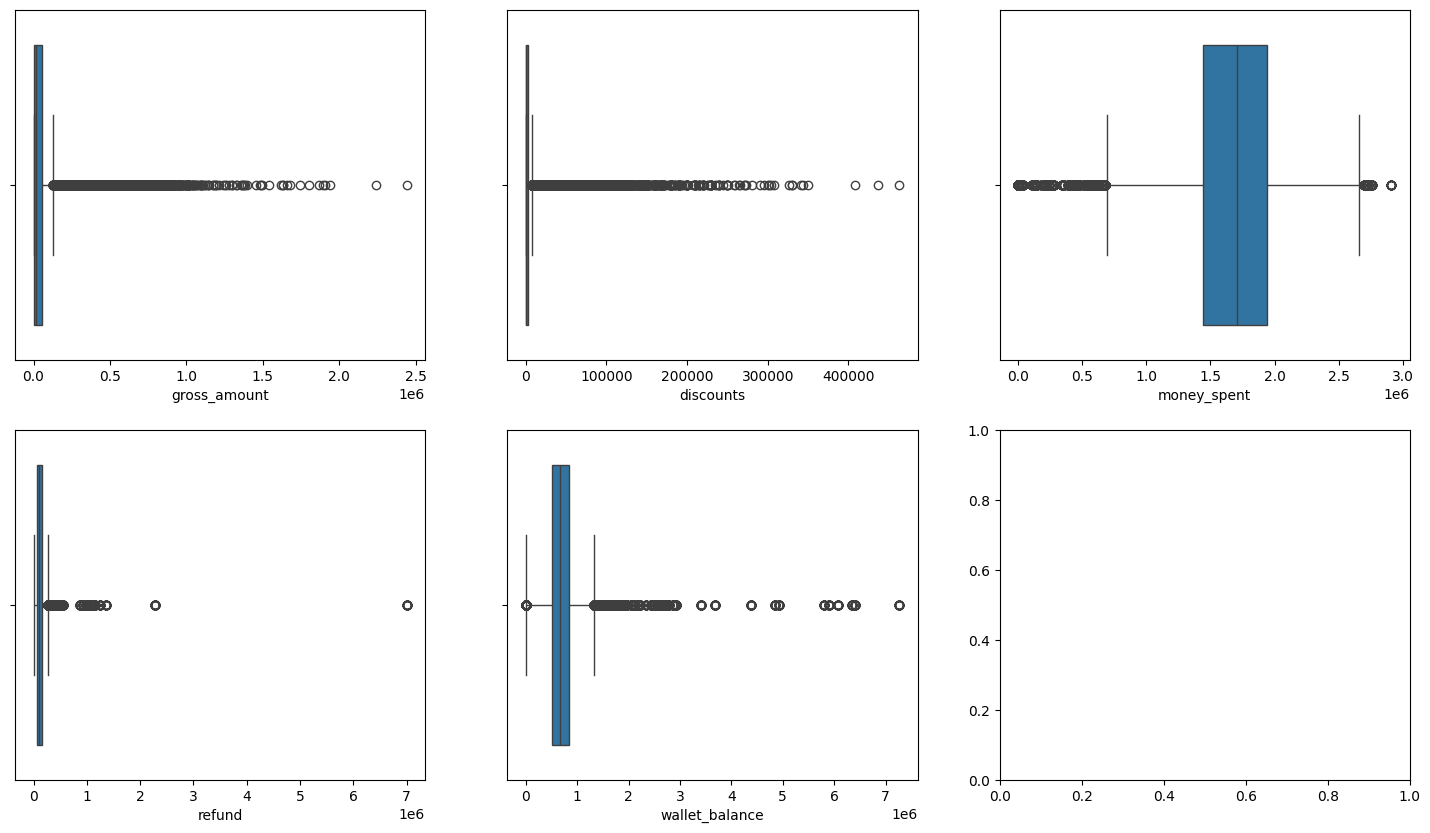

In [ ]:
# Memvisualisasikan distribusi dari fitur dan mengedintifikasikan outlier menggunakan boxplot
fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_13, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_13, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_13, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_13, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_13, x = 'wallet_balance', ax = axes[1, 1])

Dapat dilihat berdasarkan visualisasi di atas, terdapat outlier pada semua kolom yang divisualisasikan. Pada final project kali ini, untuk menghilangkan outlier dan menghindari kehilangan informasi pada data dan mempertahankan karakteristik data yang sangat besar ataupun sangat kecil, kami menggunakan **capping method** , jika data lebih dari atau kurang dari bound yang ada ( upper and lower ) maka dia sebagai outlier akan diganti nilai nya dengan nilai upper/lower bound.

In [ ]:
# Menangani Outlier
def handle_outliers_iqr(df, column):
    Q1 = data_13[column].quantile(0.25)
    Q3 = data_13[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    data_13[column] = np.where(data_13[column] < lower_bound, lower_bound, data_13[column])
    data_13[column] = np.where(data_13[column] > upper_bound, upper_bound, data_13[column])

In [ ]:
for column in outlier_check:
    handle_outliers_iqr(data_13, column)

<Axes: xlabel='wallet_balance'>

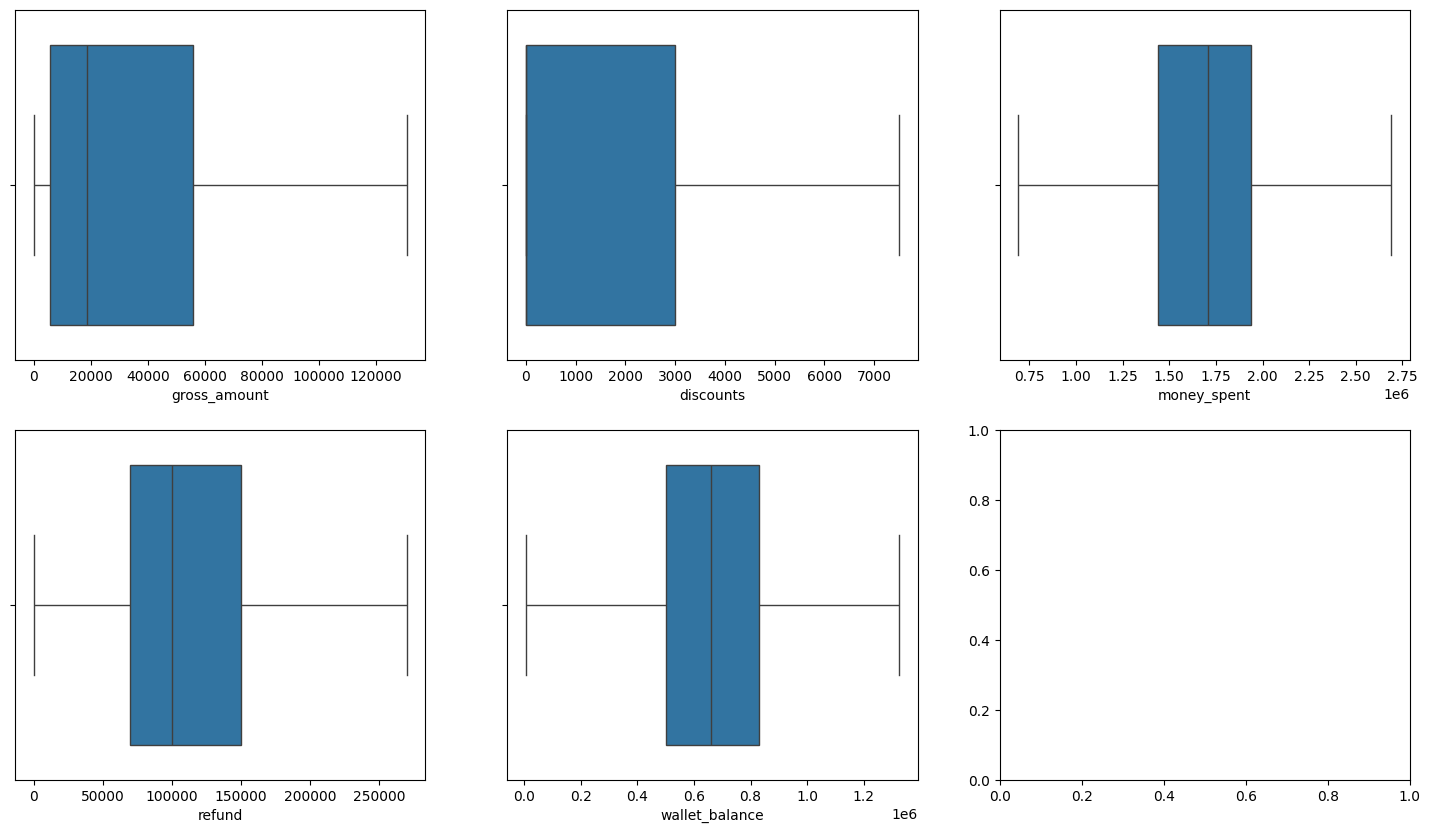

In [ ]:
# Memvisualisasikan distribusi dari fitur dan melihat apakah masih adanya outlier

fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_13, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_13, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_13, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_13, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_13, x = 'wallet_balance', ax = axes[1, 1])

Dapat terlihat, data sudah bersih dari outlier

**Changing Data Type**

In [ ]:
data_13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388041 entries, 0 to 391291
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trx_id            388041 non-null  object 
 1   user_id           388041 non-null  object 
 2   product_id        388041 non-null  int64  
 3   gross_amount      388041 non-null  float64
 4   discounts         388041 non-null  float64
 5   transaction_date  388041 non-null  object 
 6   product name      388041 non-null  object 
 7   full_name         388041 non-null  object 
 8   gender            388041 non-null  object 
 9   money_spent       388041 non-null  float64
 10  refund            388041 non-null  float64
 11  wallet_balance    388041 non-null  float64
 12  join_date         388041 non-null  object 
 13  birth             388041 non-null  object 
 14  kode kecamatan    388041 non-null  object 
 15  nama provinsi     388041 non-null  object 
 16  kode provinsi     388041 

In [ ]:
# Mengubah tipe data yang harusnya datetime menjadi datetime
data_13['transaction_date'] = pd.to_datetime(data_13['transaction_date'])
data_13['birth'] = pd.to_datetime(data_13['birth'])
data_13['join_date'] = pd.to_datetime(data_13['join_date'])

In [ ]:
data_13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388041 entries, 0 to 391291
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   trx_id            388041 non-null  object        
 1   user_id           388041 non-null  object        
 2   product_id        388041 non-null  int64         
 3   gross_amount      388041 non-null  float64       
 4   discounts         388041 non-null  float64       
 5   transaction_date  388041 non-null  datetime64[ns]
 6   product name      388041 non-null  object        
 7   full_name         388041 non-null  object        
 8   gender            388041 non-null  object        
 9   money_spent       388041 non-null  float64       
 10  refund            388041 non-null  float64       
 11  wallet_balance    388041 non-null  float64       
 12  join_date         388041 non-null  datetime64[ns]
 13  birth             388041 non-null  datetime64[ns]
 14  kode keca

## EDA

In [ ]:
# Menampilkan five statistic
data_13.describe()

product_id  gross_amount  discounts               transaction_date  \
count  388,041.00    388,041.00 388,041.00                         388041   
mean         8.38     37,702.10   1,802.41  2024-07-01 03:27:51.902711296   
min          1.00          0.00       0.00            2024-01-01 00:00:00   
25%          4.00      5,900.00       0.00            2024-04-01 00:00:00   
50%          8.00     18,700.00       0.00            2024-07-01 00:00:00   
75%         13.00     55,800.00   3,000.00            2024-09-30 00:00:00   
max         18.00    130,650.00   7,500.00            2024-12-31 00:00:00   
std          5.41     42,035.26   3,091.60                            NaN   

       money_spent     refund  wallet_balance                      join_date  \
count   388,041.00 388,041.00      388,041.00                         388041   
mean  1,681,940.23 111,778.88      668,138.33  2023-11-17 06:18:31.002187264   
min     690,000.00       0.00        5,000.00            2023-10-01 00:00:00   
25%   1,440,000.00  70,000.00      500,000.00            2023-10-25 00:00:00   
50%   1,710,000.00 100,000.00      660,000.00            2023-11-17 00:00:00   
75%   1,940,000.00 150,000.00      830,000.00            2023-12-10 00:00:00   
max   2,690,000.00 270,000.00    1,325,000.00            2024-12-14 00:00:00   
std     352,047.05  59,865.26      239,590.31                            NaN   

                               birth  kode provinsi  
count                         388041     388,041.00  
mean   1989-04-15 07:34:36.136284544          13.00  
min              1959-01-18 00:00:00          13.00  
25%              1982-02-10 00:00:00          13.00  
50%              1989-07-17 00:00:00          13.00  
75%              1997-01-18 00:00:00          13.00  
max              2007-12-28 00:00:00          13.00  
std                              NaN           0.00

Daapt dilihat dari code diatas, kami akan melihat detail statistik dari data, termasuk min, q1 (25%), q2 (50%), q3 (75%), dan max dari tiap-tiap kolom.

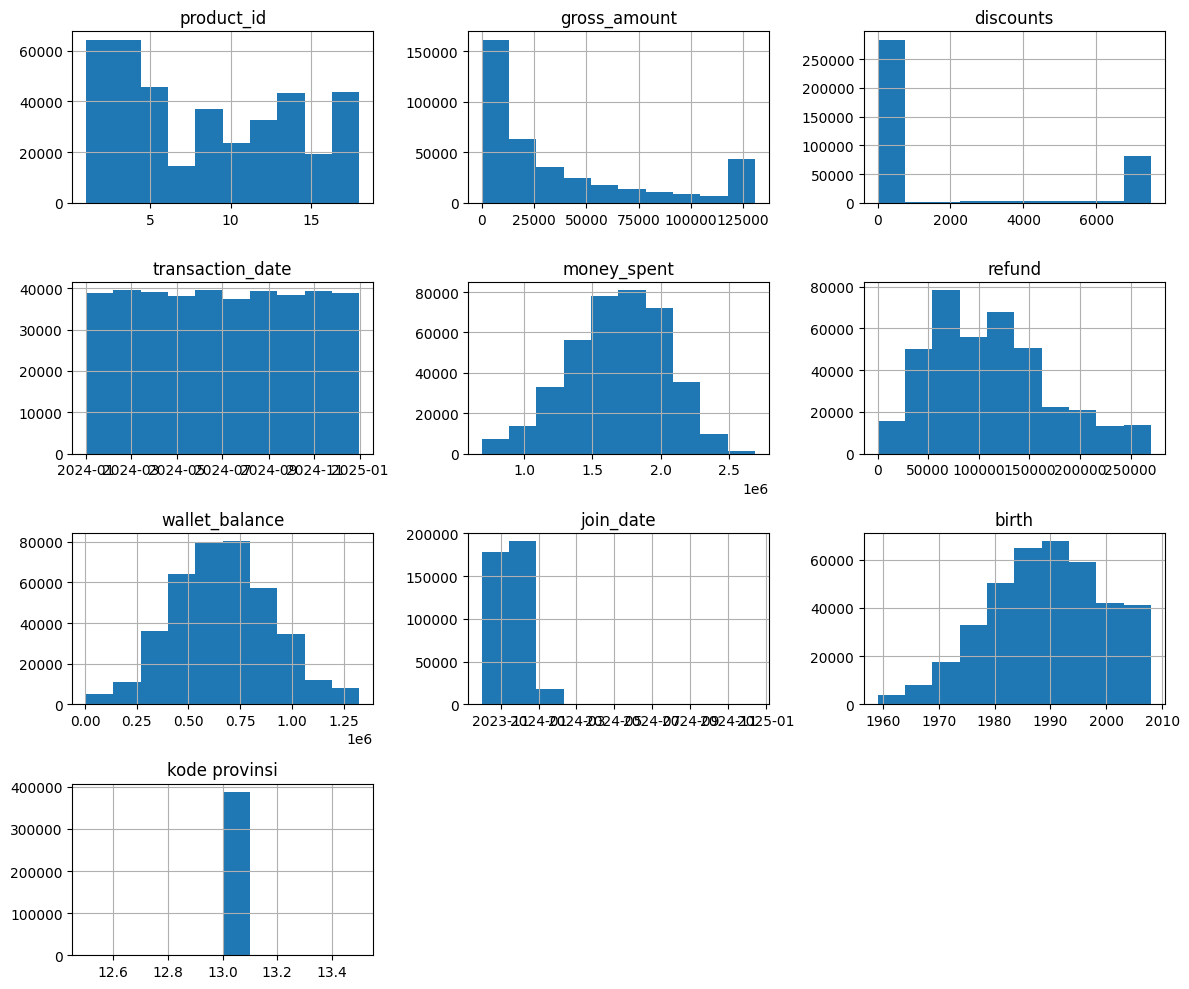

In [ ]:
# Menampilkan histogram pada variabel numerik
data_13.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

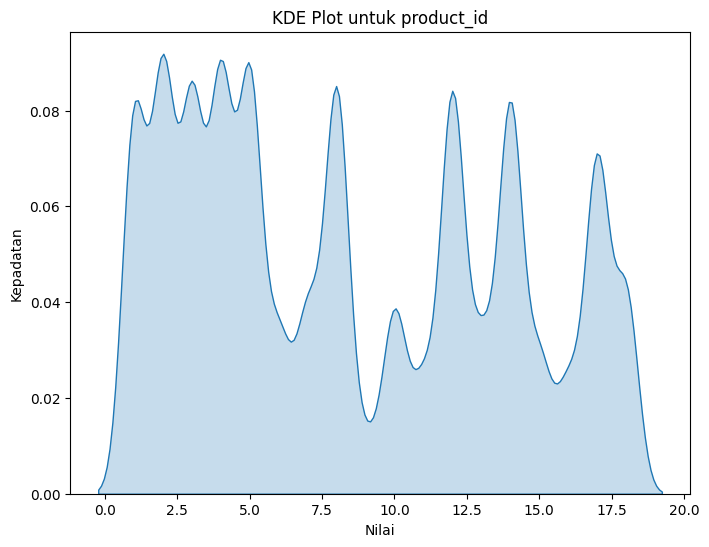

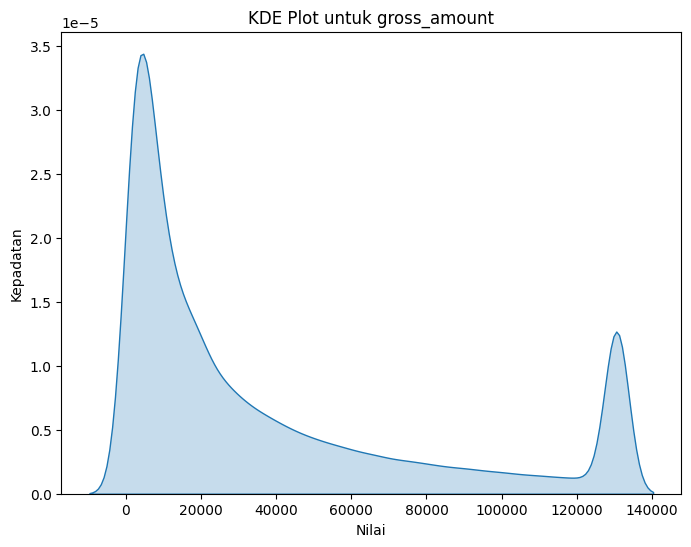

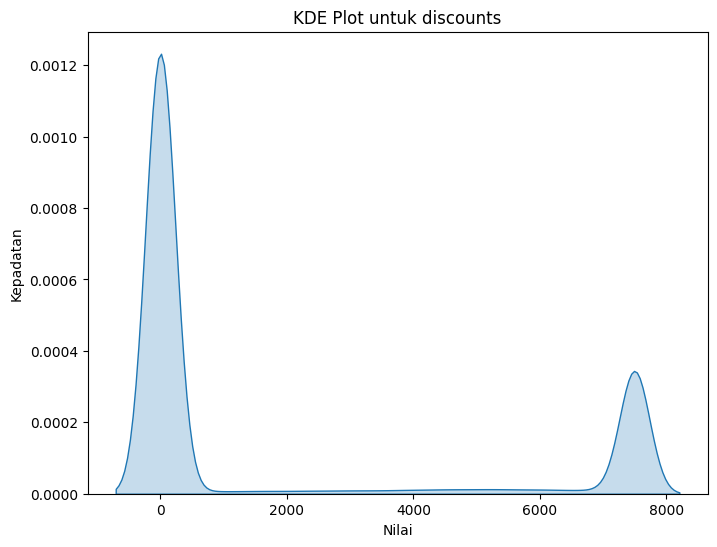

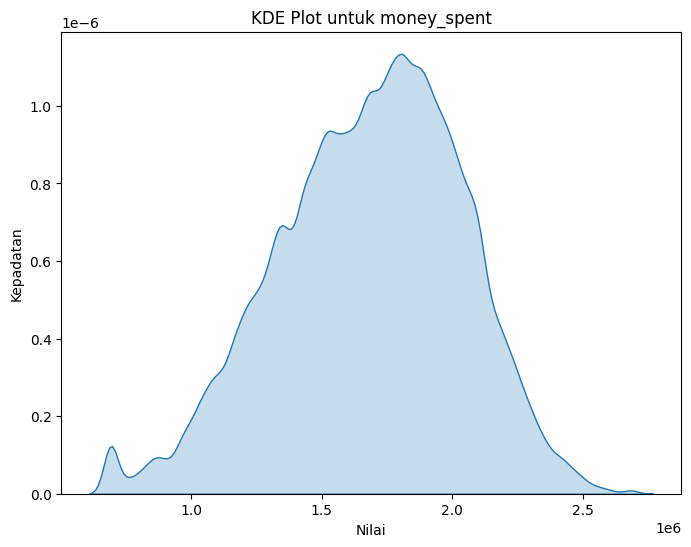

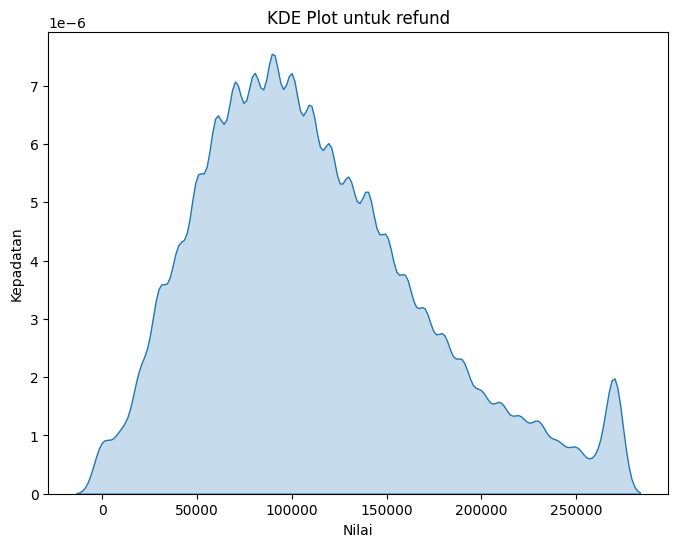

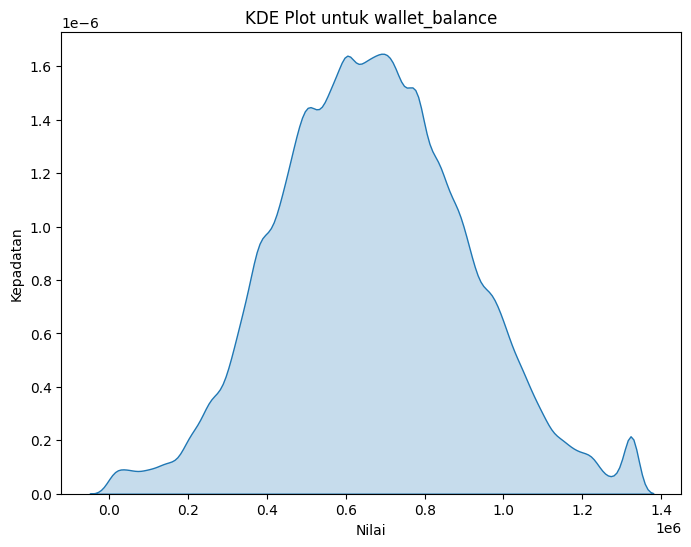

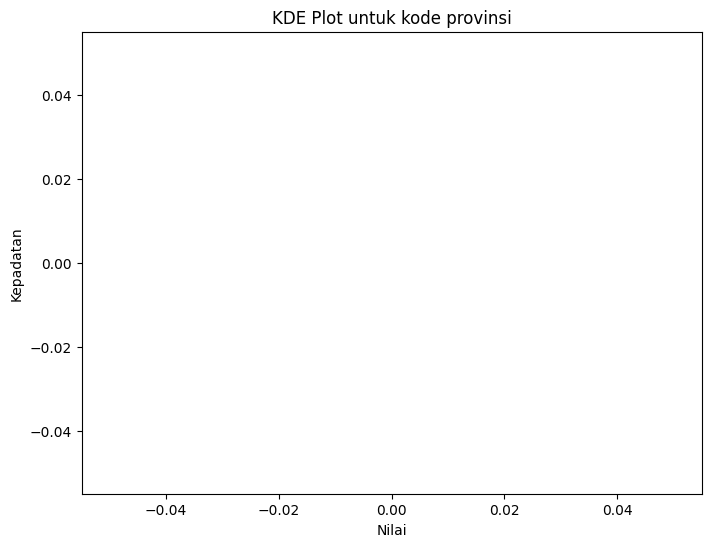

In [ ]:
#KDE Plot untuk mengetahui bentuk distrbusi

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loop melalui setiap kolom dalam DataFrame
for column in data_13.columns:
    # Pilih hanya kolom numerik
    if data_13[column].dtype in ['int64', 'float64']:
        # Buat KDE plot untuk setiap kolom numerik
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data_13[column], shade=True)

        # Tambahkan judul dan label sumbu
        plt.title('KDE Plot untuk ' + column)
        plt.xlabel('Nilai')
        plt.ylabel('Kepadatan')

        # Tampilkan plot
        plt.show()

Berdasarkan histogram dan KDE Plot yang digunakan, kita dapat mengetahui modality dari data (jumlah puncak). Seperti contohnya pada kolom discount adalah bimodal, wallet_balance adalah unimodal, product id adalah multimodal, dan transaction date adalah uniform.

In [ ]:
# Memilih hanya kolom-kolom numerik
numeric_columns = data_13.select_dtypes(include=['int', 'float'])

# Menghitung skewness hanya untuk kolom-kolom numerik
skewness = numeric_columns.skew()

print("Skewness untuk kolom-kolom numerik:")
print(skewness)

Skewness untuk kolom-kolom numerik:
product_id        0.28
gross_amount      1.20
discounts         1.21
money_spent      -0.29
refund            0.64
wallet_balance    0.14
kode provinsi     0.00
dtype: float64


Disini kami ingin **mengkalkulasikan skewness** dari data,

Skewness merupakan cara untuk memperkirakan atau mengukur bentuk distribusi.  skewness digunakan untuk memperkirakan perilaku asimetris daripada menghitung distribusi frekuensi. Skewness dapat terdiri dari dua jenis:

- Simetris: Sebuah distribusi dapat disebut simetris jika terlihat sama dari kiri dan kanan dari titik tengah.
- Asimetris: Sebuah distribusi dapat disebut asimetris jika tidak tampak sama dari kiri dan kanan dari titik pusat.
Distribusi berdasarkan nilai kemencengan:

berikut adalah penjelasan mengenai skewness score:
- Skewness = 0: Berarti terdistribusi secara normal.
- Skewness > 0: Maka lebih banyak bobot di ekor kiri distribusi.
- Skewness < 0: Maka lebih banyak bobot di ekor kanan distribusi.

Berdasarkan skor di atas, dapat disimpulkan bahwa skewness fitur:

Data condong ke kanan:

- product_id (0.28)
- Gross_amount (1.20)
- Discounts (1.21)
- refund (0.64)
- wallet_balance (0.14)


Data condong ke kiri:

- Money_spent (-0.29)

Berdistribusi Normal:

- Kode Provinsi (0.000000)

## Feature Engineering

**Feature Selection**

Feature selection adalah cara memilih subset fitur yang paling relevan dari
kumpulan fitur asli dengan menghapus fitur yang redundan, tidak relevan, atau
berisik. Disini kami hanya memilih beberapa fitur yang relevan untuk kami analisis lebih lanjut hingga pembuatan dashboard

In [ ]:
# Melihat 5 data teratas dari data_13
data_13.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX258654  SC1306072005001           1     21,800.00       0.00   
1  TRX258655  SC1306072005001           1     28,600.00       0.00   
2  TRX258656  SC1306072005001           1     29,600.00   7,500.00   
3  TRX258657  SC1306072005001           2     59,000.00       0.00   
4  TRX258658  SC1306072005001           2     22,400.00       0.00   

  transaction_date   product name full_name     gender  money_spent    refund  \
0       2024-03-22    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
1       2024-05-24    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
2       2024-09-08    Man Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
3       2024-06-03  Woman Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   
4       2024-08-15  Woman Fashion     RIDHA  perempuan 1,200,000.00 70,000.00   

   wallet_balance  join_date      birth kode kecamatan   nama provinsi  \
0      670,000.00 2023-10-30 2002-05-16         130607  SUMATERA BARAT   
1      670,000.00 2023-10-30 2002-05-16         130607  SUMATERA BARAT   
2      670,000.00 2023-10-30 2002-05-16         130607  SUMATERA BARAT   
3      670,000.00 2023-10-30 2002-05-16         130607  SUMATERA BARAT   
4      670,000.00 2023-10-30 2002-05-16         130607  SUMATERA BARAT   

   kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0             13           AGAM           1306   AMPEK ANGKEK  
1             13           AGAM           1306   AMPEK ANGKEK  
2             13           AGAM           1306   AMPEK ANGKEK  
3             13           AGAM           1306   AMPEK ANGKEK  
4             13           AGAM           1306   AMPEK ANGKEK

In [ ]:
# Memilih feature yang relevan yang disimpan dalam variabel feature_13
features_13 = data_13[['user_id', 'wallet_balance', 'money_spent', 'product name', 'gender', 'refund', 'birth', 'nama kabupaten']]

# Melihat isi dari features_13
features_13

user_id  wallet_balance  money_spent   product name  \
0       SC1306072005001      670,000.00 1,200,000.00    Man Fashion   
1       SC1306072005001      670,000.00 1,200,000.00    Man Fashion   
2       SC1306072005001      670,000.00 1,200,000.00    Man Fashion   
3       SC1306072005001      670,000.00 1,200,000.00  Woman Fashion   
4       SC1306072005001      670,000.00 1,200,000.00  Woman Fashion   
...                 ...             ...          ...            ...   
391287  SC1304012001008      500,000.00 1,270,000.00          Pulsa   
391288  SC1304012001008      500,000.00 1,270,000.00          Hotel   
391289  SC1304012001008      500,000.00 1,270,000.00          Hotel   
391290  SC1304012001008      500,000.00 1,270,000.00          Hotel   
391291  SC1304012001008      500,000.00 1,270,000.00          Hotel   

           gender    refund      birth nama kabupaten  
0       perempuan 70,000.00 2002-05-16           AGAM  
1       perempuan 70,000.00 2002-05-16           AGAM  
2       perempuan 70,000.00 2002-05-16           AGAM  
3       perempuan 70,000.00 2002-05-16           AGAM  
4       perempuan 70,000.00 2002-05-16           AGAM  
...           ...       ...        ...            ...  
391287  perempuan 50,000.00 1998-10-09    TANAH DATAR  
391288  perempuan 50,000.00 1998-10-09    TANAH DATAR  
391289  perempuan 50,000.00 1998-10-09    TANAH DATAR  
391290  perempuan 50,000.00 1998-10-09    TANAH DATAR  
391291  perempuan 50,000.00 1998-10-09    TANAH DATAR  

[388041 rows x 8 columns]

Diatas adalah Feature yang digunakan, yaitu user_id, wallet_balance, money_spent, product_name, gender, refund, birth dan nama kabupaten. dapat dilihat juga pada data diatas, beberapa baris memiliki user_id yang sama, oleh karena itu kami harus melakukan group by berdasarkan user_id.

**Feature encoding (one hot encoding)**

Karena kami ingin melihat jumlah transaksi user pada setiap produk, kami pertama kali akan melakukan one hot encoding pada product_name, kemudian nanti kami akan melakukan fungsi agregasi sum pada product_name bersamaan dengan groupby berdasarkan user_id untuk melihat jumlah pembelian produk masing-masing user

In [ ]:
# Melakukan One Hot Encoding pada kolom product name feature_13 yang disimpan dalam variabel encoded_13
encoded_13 = pd.get_dummies(features_13, columns=['product name'], dtype=int)

# Menampilkan 5 data teratas pada encoded_13
encoded_13.head(5)

user_id  wallet_balance  money_spent     gender    refund  \
0  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
1  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
2  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
3  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
4  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   

       birth nama kabupaten  product name_Elektronik  \
0 2002-05-16           AGAM                        0   
1 2002-05-16           AGAM                        0   
2 2002-05-16           AGAM                        0   
3 2002-05-16           AGAM                        0   
4 2002-05-16           AGAM                        0   

   product name_Food & Drink  product name_Hotel  ...  product name_Other  \
0                          0                   0  ...                   0   
1                          0                   0  ...                   0   
2                          0                   0  ...                   0   
3                          0                   0  ...                   0   
4                          0                   0  ...                   0   

   product name_Otomotif  product name_Pulsa  product name_Ride Hailing  \
0                      0                   0                          0   
1                      0                   0                          0   
2                      0                   0                          0   
3                      0                   0                          0   
4                      0                   0                          0   

   product name_Sewa Motor/Mobil  product name_Tagihan (WIFI, PLN)  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   product name_Top Up Game  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  
0                           0  
1                           0  
2                           0  
3                           1  
4                           1  

[5 rows x 25 columns]

**Feature Creation**

Pada feature creation, kami membuat kolom age berdasarkan kolom birth, dan kami akan membuat kolom total transaksi dengan menjumlahkan semua transaksi produk. Kolom age nantinya akan digunakan saat membuat dashboard, dan total transaksi akan digunakan untuk pembentukan cluster

In [ ]:
# Membuat Kolom Age
def calculate_age(birth_date):
    today = pd.Timestamp.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Membuat kolom 'age' berdasarkan kolom 'birth'
encoded_13['age'] = encoded_13['birth'].apply(calculate_age)

# Memindahkan kolom 'age' ke posisi ke-7
col_name = 'age'
col_position = 6  # posisi ke-7 (index mulai dari 0)
age_col = encoded_13.pop(col_name)
encoded_13.insert(col_position, col_name, age_col)

In [ ]:
# Membuat kolom total transaksi
encoded_13['total_transaksi'] = encoded_13.iloc[:, 8:].sum(axis=1)

In [ ]:
# Melihat 5 data teratas encoded_12 yang sudah dilakukan feature creation
encoded_13.head(5)

user_id  wallet_balance  money_spent     gender    refund  \
0  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
1  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
2  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
3  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   
4  SC1306072005001      670,000.00 1,200,000.00  perempuan 70,000.00   

       birth  age nama kabupaten  product name_Elektronik  \
0 2002-05-16   22           AGAM                        0   
1 2002-05-16   22           AGAM                        0   
2 2002-05-16   22           AGAM                        0   
3 2002-05-16   22           AGAM                        0   
4 2002-05-16   22           AGAM                        0   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          0  ...                      0                   0   
1                          0  ...                      0                   0   
2                          0  ...                      0                   0   
3                          0  ...                      0                   0   
4                          0  ...                      0                   0   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  total_transaksi  
0                           0                1  
1                           0                1  
2                           0                1  
3                           1                1  
4                           1                1  

[5 rows x 27 columns]

**Grouping Data**

Disini, kami menggunakan data grouping, berdasarkan user_id

In [ ]:
# Mengecek jumlah nilai unik dalam kolom 'user_id'
unique_id_count = data_13['user_id'].nunique()

print("\nJumlah nilai unik dalam kolom 'user_id':")
print(unique_id_count)



Jumlah nilai unik dalam kolom 'user_id':
11314


berdasarkan jumlah nilai unik pada kolom user_id, disimpulkan bahwa terdapat 11314 user unik pada provinsi sumatera utara (trx 13)

In [ ]:
# Agregasi pada kolom
agg_dict = {
    'money_spent': 'mean',
    'refund': 'mean',
    'wallet_balance': 'mean',
    'age': 'mean',
    'gender': 'first',
    'birth': 'first',
    'nama kabupaten': 'first'
}

# Menambahkan fungsi sum untuk semua kolom produk
for column in encoded_13.columns:
    if column not in ['user_id', 'money_spent', 'refund', 'wallet_balance', 'age', 'gender', 'birth', 'nama kabupaten']:
        agg_dict[column] = 'sum'

# Group by 'user_id' dan 'product_id', aggregate sesuai dengan agg_dict
grouped_13 = encoded_13.groupby('user_id').agg(agg_dict).reset_index()

# Mengatur tampilan agar hasil lebih mudah dibaca
pd.options.display.float_format = '{:,.2f}'.format

# Melihat 5 data teratas dari seluruh data yang telah dilakukan grouping
grouped_13.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC1301012001001 2,140,000.00 130,000.00      770,000.00 44.00  laki-laki   
1  SC1301012001002 1,910,000.00 140,000.00      910,000.00 24.00  perempuan   
2  SC1301012001003 2,040,000.00 120,000.00      800,000.00 16.00  perempuan   
3  SC1301012001004 1,910,000.00  50,000.00      640,000.00 16.00  perempuan   
4  SC1301012001005 2,290,000.00 100,000.00      600,000.00 21.00  perempuan   

       birth   nama kabupaten  product name_Elektronik  \
0 1980-06-07  PESISIR SELATAN                        2   
1 1999-07-25  PESISIR SELATAN                        2   
2 2007-12-04  PESISIR SELATAN                        4   
3 2007-08-15  PESISIR SELATAN                        4   
4 2003-06-07  PESISIR SELATAN                        2   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          3  ...                      4                   3   
1                          3  ...                      3                   0   
2                          2  ...                      3                   3   
3                          3  ...                      2                   4   
4                          4  ...                      4                   2   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          3                              0   
1                          4                              0   
2                          2                              0   
3                          4                              3   
4                          2                              4   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 0                         2   
1                                 0                         0   
2                                 4                         0   
3                                 0                         0   
4                                 0                         4   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     3   
1                                                  0                     3   
2                                                  0                     3   
3                                                  3                     2   
4                                                  4                     2   

   product name_Woman Fashion  total_transaksi  
0                           3               40  
1                           4               36  
2                           4               46  
3                           3               46  
4                           4               56  

[5 rows x 27 columns]

Setelah dilakukan groupby berdasarkan user_id, dapat dilihat tidak adanya redundansi baris user_id, lengkap dengan jumlah transaksi setiap produk dan total transaksi

**Feature Correlation**

Disini, kami ingin melihat korelasi antar fitur, semakin mendekati angka 1, baik plus atau minus, maka korelasi akan semakin kuat baik secara positif maupun negatif.

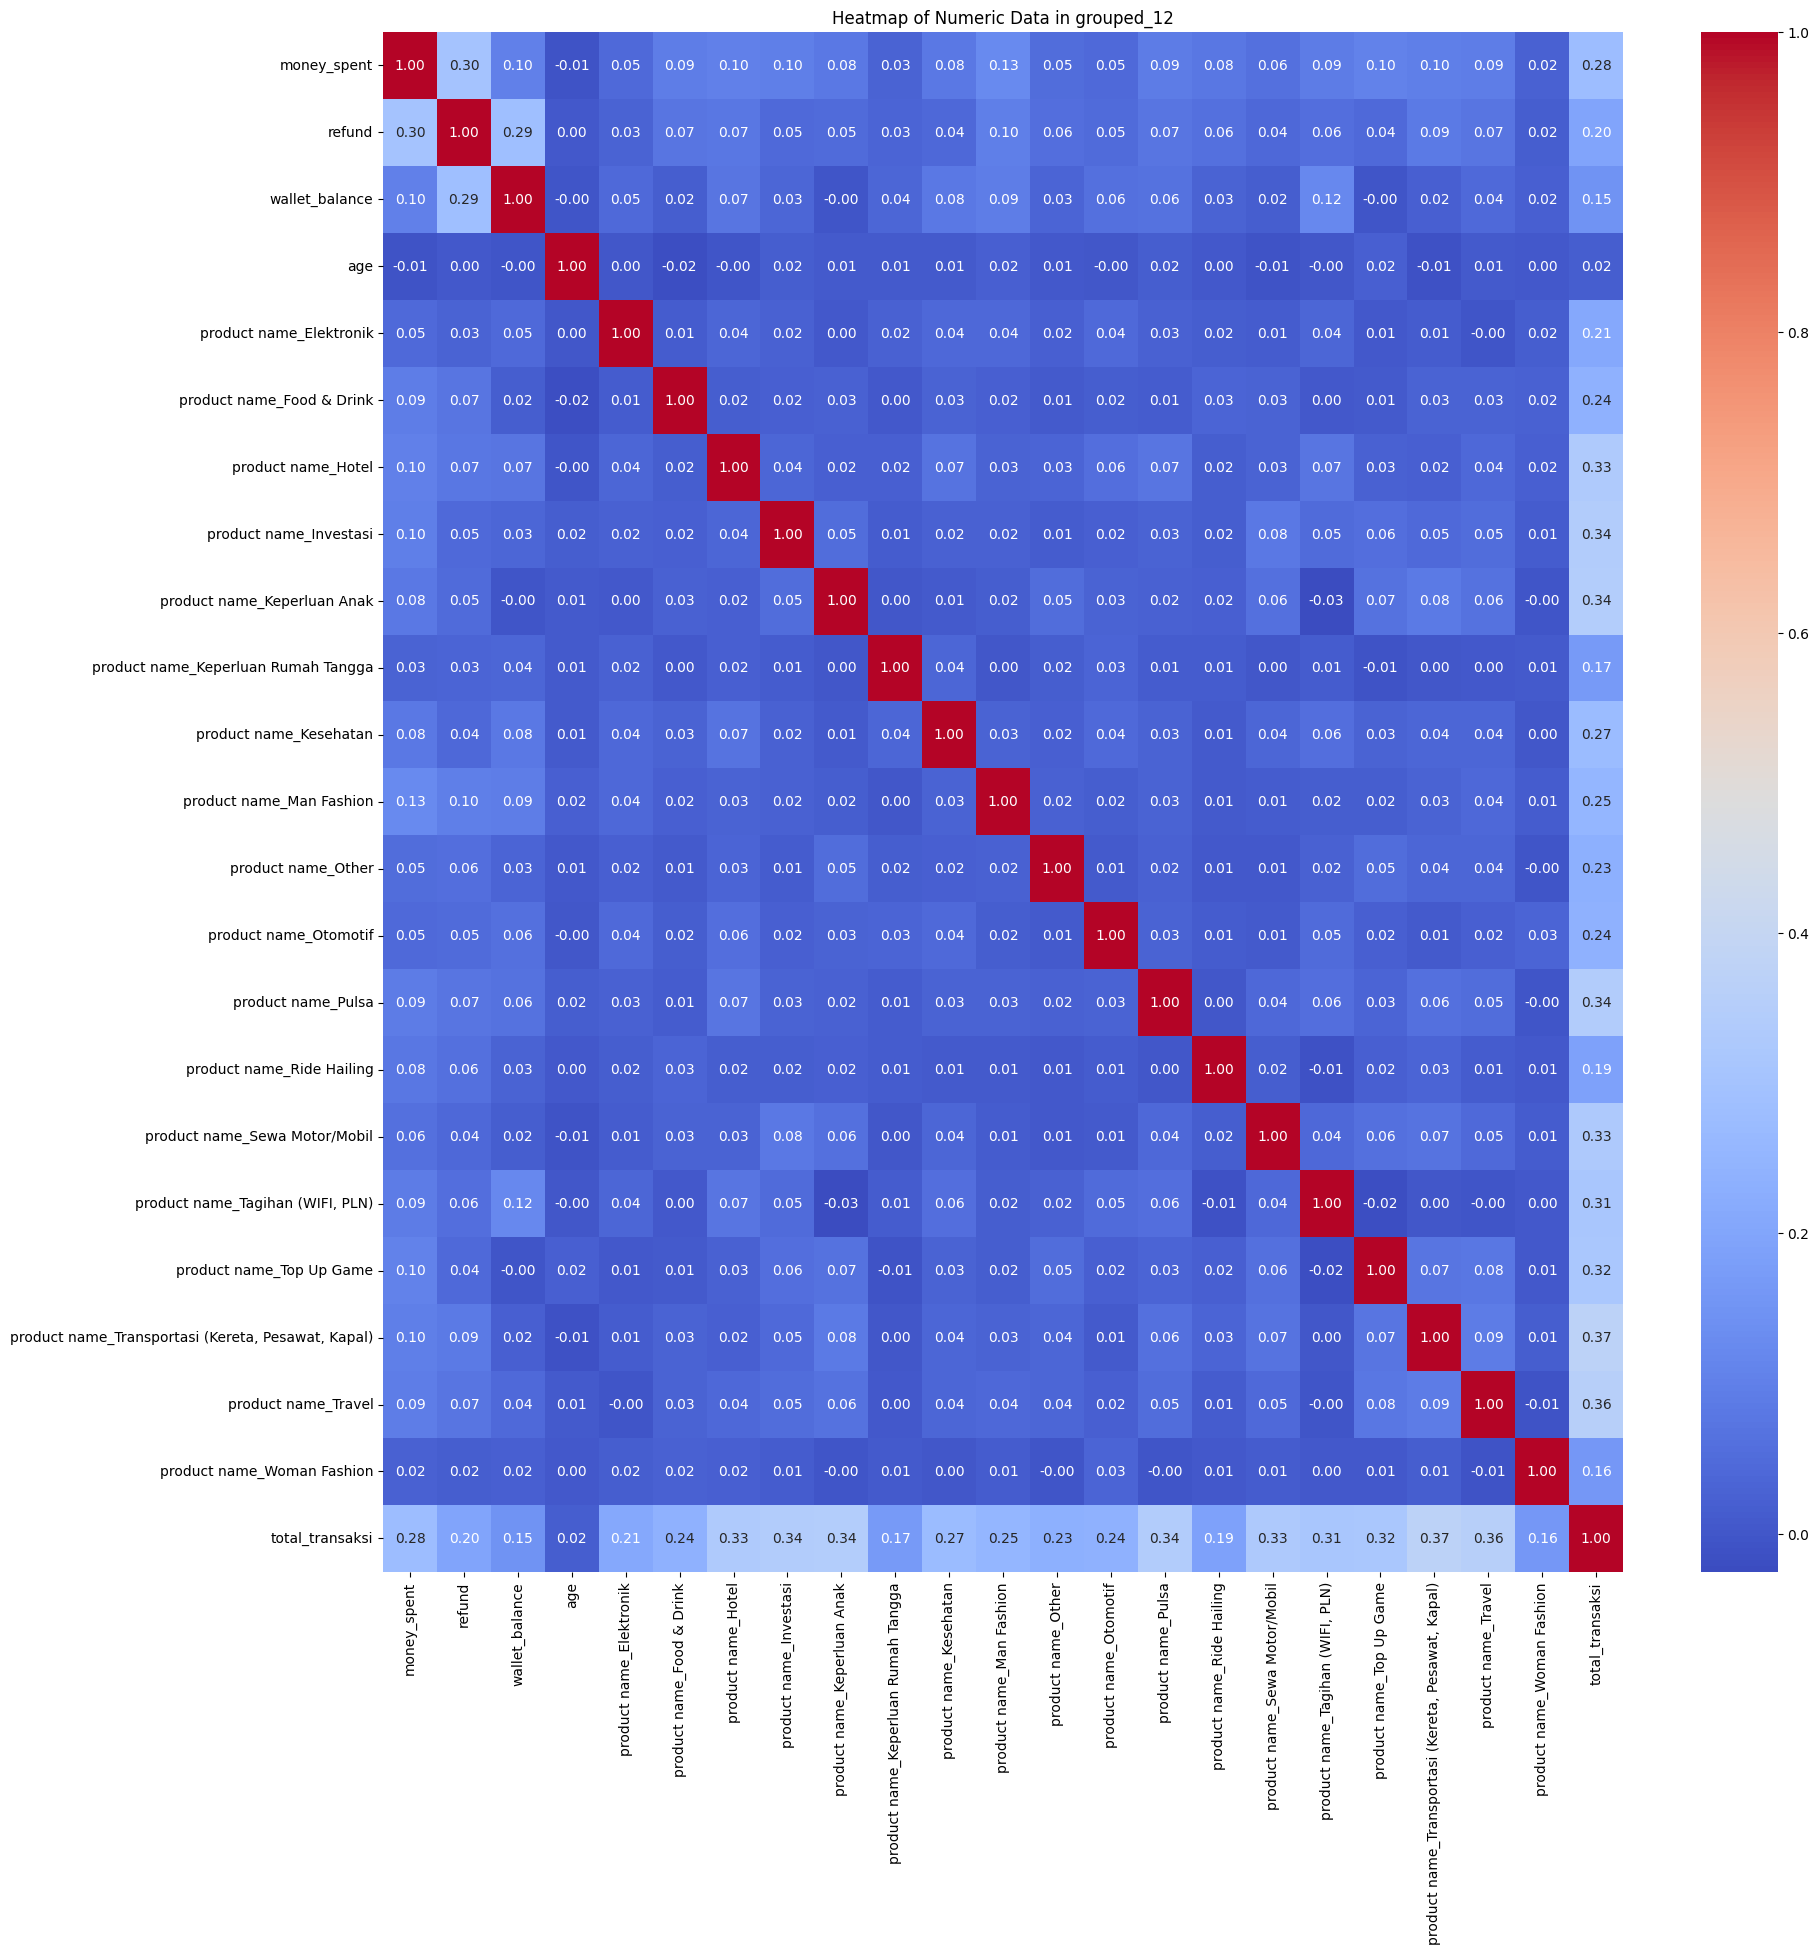

In [ ]:
# Memilih hanya kolom numerik
numeric_cols = grouped_13.select_dtypes(include='number')

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numeric Data in grouped_12')
plt.show()

Dari correlation heatmap diatas, dapat diketahui bahwa fitur yang paling berkorelasi tinggi adalah product name_ transportasi (Kereta, Pesawat, Kapal) dengan total transaksi

## Modelling

Saat modeling, sesuai dengan judul project kami yang mengsegmentasi berdasarkan transaksi, maka kami akan menggunakan kolom money_spent, transaksi produk, dan total transaksi saja

In [ ]:
# Column_cluster_13 adalah variabel yang berisi kolom untuk pembuatan cluster, drop data yang tidak digunakan
column_cluster_13 = grouped_13.drop(columns=['user_id', 'refund', 'age', 'wallet_balance', 'gender', 'birth', 'nama kabupaten'])

**Feature Scaling**

Scaling dilakukan untuk mentransformasi nilai dari suatu fitur menjadi
range yang spesifik. Feature Scaling yang digunakan adalah normalisasi (MinMaxScaler), MinMaxScaler akan memperkecil rentang data dari 0 sampai 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_vector = column_cluster_13.values.flatten().reshape(-1, 1)

# Gunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()

# Lakukan scaling
scaled_vector = scaler.fit_transform(data_vector)

# Kembalikan vektor yang telah discaling ke bentuk aslinya (dataframe)
column_cluster_13 = pd.DataFrame(scaled_vector.reshape(column_cluster_13.shape), columns=column_cluster_13.columns)

**Model 1 - Mini Batch Kmeans Clustering**

Pada final project ini, sebelum menerapkan model final, kami akan membandingkan algoritma kmeans dan mini batch kmeans terlebih dahulu berdasarkan silhoutte score.

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import MiniBatchKMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, random state dan batch size nya
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, max_iter=50, random_state=42, batch_size = 20 )
mini_batch_kmeans.fit(column_cluster_13)

MiniBatchKMeans(batch_size=20, max_iter=50, n_clusters=4, random_state=42)

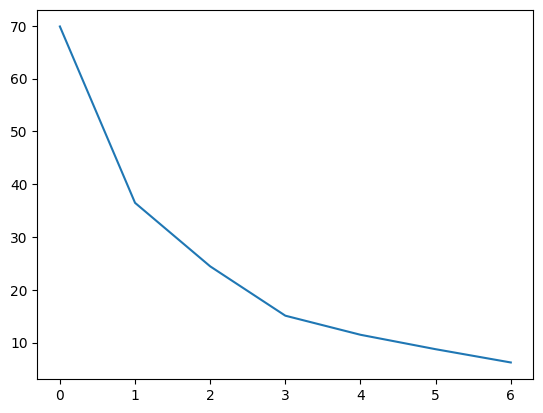

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  mini_batch_kmeans = MiniBatchKMeans (n_clusters=num_clusters, max_iter=50, random_state=42, batch_size = 20)
  mini_batch_kmeans.fit(column_cluster_13)

  ssd.append(mini_batch_kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
    # Inisialisasi Mini-Batch K-Means
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, max_iter = 50, batch_size = 20)
    mini_batch_kmeans.fit(column_cluster_13)
    cluster_labels = mini_batch_kmeans.labels_

    # Kalkulasi silhouette score
    silhouette_avg = silhouette_score(column_cluster_13, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.570017538596587
For n_clusters=3, the silhouette score is 0.5287587586962271
For n_clusters=4, the silhouette score is 0.5081056019928182
For n_clusters=5, the silhouette score is 0.5152783600596661
For n_clusters=6, the silhouette score is 0.5182801942447488
For n_clusters=7, the silhouette score is 0.5173202113662723
For n_clusters=8, the silhouette score is 0.5195655223129226


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.570017538596587. Silhoutte score juga berperan sebagai metrik evaluasi yang mengindikasikan baik buruknya suatu model cluster.

**Model 2 - Kmeans Clustering**

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import KMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, dan random state
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(column_cluster_13)

KMeans(max_iter=50, n_clusters=4, random_state=42)

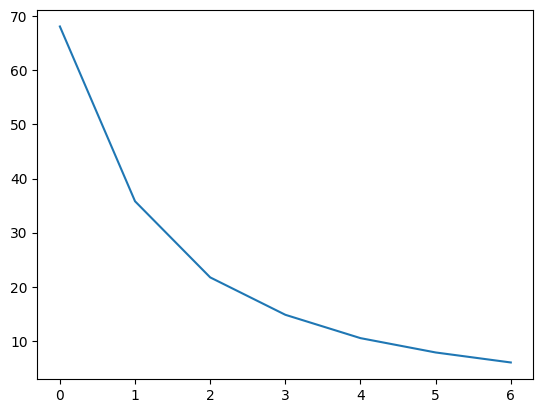

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  kmeans = KMeans (n_clusters=num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_13)

  ssd.append(kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

Berdasarkan elbow method yang ada, jumlah kluster optimal adalah 2

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
  # Inisialisasi model
  kmeans = KMeans (num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_13)
  cluster_labels = kmeans.labels_

# Kalkulasi silhouette Score
  silhouette_avg = silhouette_score(column_cluster_13, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.576186321937177
For n_clusters=3, the silhouette score is 0.5326100267441616
For n_clusters=4, the silhouette score is 0.5281834524587178
For n_clusters=5, the silhouette score is 0.5200964430727104
For n_clusters=6, the silhouette score is 0.5230251671272813
For n_clusters=7, the silhouette score is 0.521060857962808
For n_clusters=8, the silhouette score is 0.5265945779135824


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.576186321937177

**Final Model**

Dari kedua model, silhoutte score tertinggi terdapat pada jumlah cluster 2. Diantara kmeans dan minibatch kmeans, silhouette score kmeans lebih tinggi daripada minibatch kmeans (0.576186321937177 > 0.570017538596587). Oleh karena itu, model final yang digunakan adalah kmeans

In [ ]:
# Final model dengan k=2
kmeans = KMeans (n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(column_cluster_13)

KMeans(max_iter=50, n_clusters=2, random_state=42)

In [ ]:
# Menetapkan label pada grouped_13
grouped_13['Cluster_id'] = kmeans.labels_
grouped_13.sample(5)

user_id  money_spent     refund  wallet_balance   age  \
8045   SC1312032003009 1,610,000.00 120,000.00      810,000.00 31.00   
10573  SC1375011007005 2,140,000.00  30,000.00      510,000.00 23.00   
1100   SC1301102005002 2,010,000.00 210,000.00      510,000.00 46.00   
2477   SC1303032008004 2,170,000.00 170,000.00      670,000.00 51.00   
6636   SC1308132003002 2,220,000.00 110,000.00      670,000.00 38.00   

          gender      birth    nama kabupaten  product name_Elektronik  \
8045   perempuan 1992-10-14     PASAMAN BARAT                        2   
10573  perempuan 2000-10-21  KOTA BUKITTINGGI                        4   
1100   laki-laki 1978-02-15   PESISIR SELATAN                        4   
2477   perempuan 1972-07-04         SIJUNJUNG                        2   
6636   perempuan 1985-08-07           PASAMAN                        3   

       product name_Food & Drink  ...  product name_Pulsa  \
8045                           3  ...                   0   
10573                          0  ...                   4   
1100                           4  ...                   0   
2477                           2  ...                   2   
6636                           4  ...                   2   

       product name_Ride Hailing  product name_Sewa Motor/Mobil  \
8045                           3                              0   
10573                          3                              0   
1100                           2                              0   
2477                           4                              0   
6636                           2                              0   

       product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
8045                                  4                         0   
10573                                 3                         0   
1100                                  3                         4   
2477                                  0                         0   
6636                                  0                         0   

       product name_Transportasi (Kereta, Pesawat, Kapal)  \
8045                                                   0    
10573                                                  0    
1100                                                   2    
2477                                                   2    
6636                                                   0    

       product name_Travel  product name_Woman Fashion  total_transaksi  \
8045                     0                           3               28   
10573                    0                           3               30   
1100                     0                           3               34   
2477                     0                           2               31   
6636                     4                           4               35   

       Cluster_id  
8045            0  
10573           1  
1100            1  
2477            1  
6636            1  

[5 rows x 28 columns]

Cluster id diterapkan pada variabel grouped_13, yang sebelumnya sudah dijelaskan berisi kolom yang ingin kita analisa lebih lanjut.

In [ ]:
# Mengubah nama kolom agar data menjadi lebih rapi
grouped_13 = grouped_13.rename(columns=lambda x: x.replace('product name_', 'Transaksi '))

# Melihat 5 data teratas dari grouped_13
grouped_13.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC1301012001001 2,140,000.00 130,000.00      770,000.00 44.00  laki-laki   
1  SC1301012001002 1,910,000.00 140,000.00      910,000.00 24.00  perempuan   
2  SC1301012001003 2,040,000.00 120,000.00      800,000.00 16.00  perempuan   
3  SC1301012001004 1,910,000.00  50,000.00      640,000.00 16.00  perempuan   
4  SC1301012001005 2,290,000.00 100,000.00      600,000.00 21.00  perempuan   

       birth   nama kabupaten  Transaksi Elektronik  Transaksi Food & Drink  \
0 1980-06-07  PESISIR SELATAN                     2                       3   
1 1999-07-25  PESISIR SELATAN                     2                       3   
2 2007-12-04  PESISIR SELATAN                     4                       2   
3 2007-08-15  PESISIR SELATAN                     4                       3   
4 2003-06-07  PESISIR SELATAN                     2                       4   

   ...  Transaksi Pulsa  Transaksi Ride Hailing  Transaksi Sewa Motor/Mobil  \
0  ...                3                       3                           0   
1  ...                0                       4                           0   
2  ...                3                       2                           0   
3  ...                4                       4                           3   
4  ...                2                       2                           4   

   Transaksi Tagihan (WIFI, PLN)  Transaksi Top Up Game  \
0                              0                      2   
1                              0                      0   
2                              4                      0   
3                              0                      0   
4                              0                      4   

   Transaksi Transportasi (Kereta, Pesawat, Kapal)  Transaksi Travel  \
0                                                0                 3   
1                                                0                 3   
2                                                0                 3   
3                                                3                 2   
4                                                4                 2   

   Transaksi Woman Fashion  total_transaksi  Cluster_id  
0                        3               40           1  
1                        4               36           1  
2                        4               46           1  
3                        3               46           1  
4                        4               56           1  

[5 rows x 28 columns]

In [ ]:
# Mengecek jumlah masing-masing cluster
name_counts = grouped_13['Cluster_id'].value_counts()

print("\nFrekuensi nilai unik dalam kolom 'cluster_id':")
print(name_counts)


Frekuensi nilai unik dalam kolom 'cluster_id':
Cluster_id
1    6368
0    4946
Name: count, dtype: int64


Dapat terlihat, jumlah cluster 1 lebih banyak daripada cluster 0

In [ ]:
from google.colab import files

grouped_13.to_csv("grouped_13_new.csv", index=False)
# Mengunduh file CSV
files.download("grouped_13_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Diatas adalah kode untuk mengunduh file csv grouped_13 yang sudah di assign label dan diubah nama kolomnya.

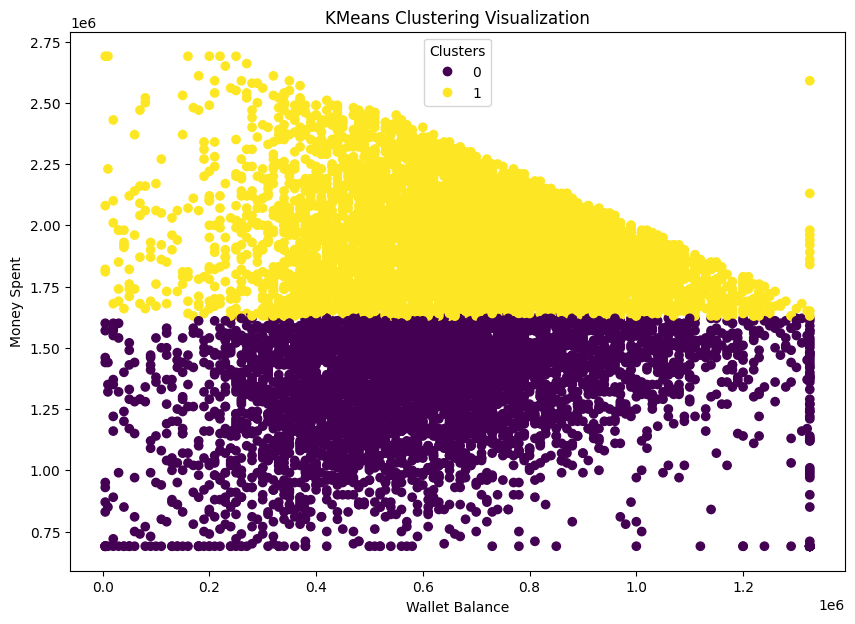

In [ ]:
# Visualisasi hasil clustering berdasarkan 'wallet_balance' dan 'money_spent'
plt.figure(figsize=(10, 7))
scatter = plt.scatter(grouped_13['wallet_balance'], grouped_13['money_spent'], c=grouped_13['Cluster_id'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization')
plt.xlabel('Wallet Balance')
plt.ylabel('Money Spent')
plt.show()

Karena dimensi data yang besar, kami mencoba memvisualisasikan dalam 2 dimensi saja menggunakan wallet_balance dan money spent. Dapat terlihat data tercluster dengan baik

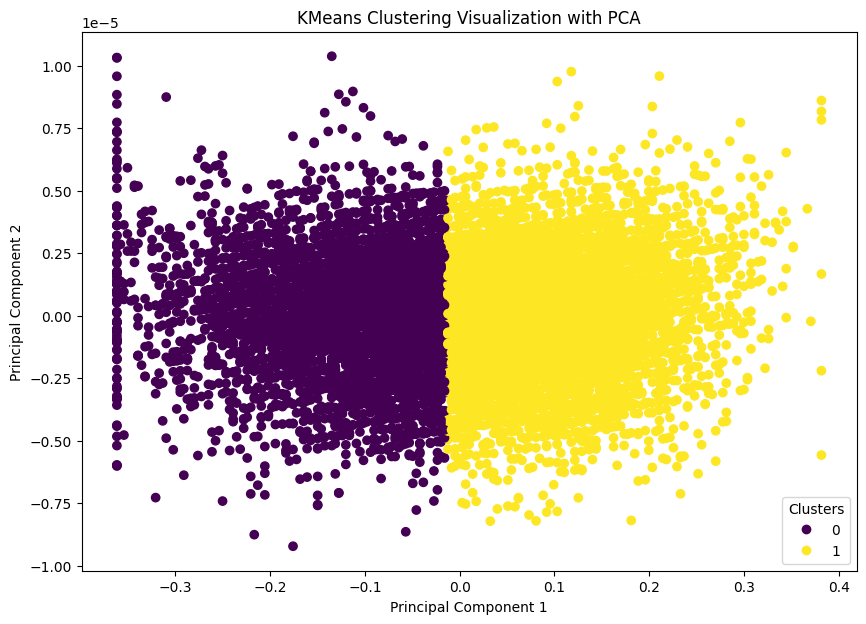

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Proyeksi data ke dalam dua dimensi menggunakan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(column_cluster_13)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Menambahkan label ke DataFrame PCA untuk visualisasi
pca_df['cluster_label'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['cluster_label'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Karena dimensi data yang sangat besar pula, kami menggunakan pca untuk memproyeksikan data menjadi dua dimensi saja. Dapat terlihat bahwa data tercluster dengan baik

# Papua Tengah (TRX 94)

## Data Preparation

**Data Merging**

Dilakukan data merging pada 4 tabel : transaction_94, product_reference, user, dan location_reference untuk melihat sekiranya informasi apa yang dapat diambil dari keseluruhan tabel.

In [ ]:
# Melihat tabel transaction_94
transaction_94

trx_id          user_id  product_id  gross_amount  discounts  \
0     TRX722042  SC9404152007902           1     41,700.00        NaN   
1     TRX722043  SC9404152007902           1      9,300.00        NaN   
2     TRX722044  SC9404152007902           1     27,100.00  27,100.00   
3     TRX722045  SC9404152007902           1     41,900.00  12,900.00   
4     TRX722046  SC9404152007902           2     68,200.00        NaN   
...         ...              ...         ...           ...        ...   
3060  TRX725102  SC9401052001003          16     75,000.00  10,000.00   
3061  TRX725103  SC9401052001003          17     16,200.00        NaN   
3062  TRX725104  SC9401052001003          17     83,800.00        NaN   
3063  TRX725105  SC9401052001003          18     57,800.00        NaN   
3064  TRX725106  SC9401052001003          18     52,200.00        NaN   

     transaction_date  
0          2024-05-24  
1          2024-04-11  
2          2024-05-08  
3          2024-05-17  
4          2024-01-13  
...               ...  
3060       2024-04-12  
3061       2024-01-07  
3062       2024-10-14  
3063       2024-02-22  
3064       2024-09-08  

[3065 rows x 6 columns]

In [ ]:
# Melakukan left join berdasarkan kolom 'Product ID'
product_transaction_94 = pd.merge(transaction_94, product_reference, on='product_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel transaction_94 dan product_reference bernama product_transaction
product_transaction_94.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX722042  SC9404152007902           1     41,700.00        NaN   
1  TRX722043  SC9404152007902           1      9,300.00        NaN   
2  TRX722044  SC9404152007902           1     27,100.00  27,100.00   
3  TRX722045  SC9404152007902           1     41,900.00  12,900.00   
4  TRX722046  SC9404152007902           2     68,200.00        NaN   

  transaction_date   product name  
0       2024-05-24    Man Fashion  
1       2024-04-11    Man Fashion  
2       2024-05-08    Man Fashion  
3       2024-05-17    Man Fashion  
4       2024-01-13  Woman Fashion

In [ ]:
# Melakukan left join berdasarkan kolom 'User ID'
user_transaction_94 = pd.merge(product_transaction_94, user, on='user_id', how='left')

# Melihat 5 data teratas dari hasil merging tabel product_transaction_94 dan user bernama user_transaction_94
user_transaction_94.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX722042  SC9404152007902           1     41,700.00        NaN   
1  TRX722043  SC9404152007902           1      9,300.00        NaN   
2  TRX722044  SC9404152007902           1     27,100.00  27,100.00   
3  TRX722045  SC9404152007902           1     41,900.00  12,900.00   
4  TRX722046  SC9404152007902           2     68,200.00        NaN   

  transaction_date   product name full_name     gender  money_spent    refund  \
0       2024-05-24    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
1       2024-04-11    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
2       2024-05-08    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
3       2024-05-17    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
4       2024-01-13  Woman Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   

   wallet_balance   join_date       birth kode kecamatan  
0       90,000.00  2023-10-19  2007-06-24         940415  
1       90,000.00  2023-10-19  2007-06-24         940415  
2       90,000.00  2023-10-19  2007-06-24         940415  
3       90,000.00  2023-10-19  2007-06-24         940415  
4       90,000.00  2023-10-19  2007-06-24         940415

In [ ]:
# Melakukan left join berdasarkan kolom 'kode kecamatan'
data_94 = pd.merge(user_transaction_94, location_reference, on='kode kecamatan', how='left')

#  Melihat 5 data teratas dari hasil merging tabel user_transaction_94 dan  location_reference bernama data_94
data_94.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX722042  SC9404152007902           1     41,700.00        NaN   
1  TRX722043  SC9404152007902           1      9,300.00        NaN   
2  TRX722044  SC9404152007902           1     27,100.00  27,100.00   
3  TRX722045  SC9404152007902           1     41,900.00  12,900.00   
4  TRX722046  SC9404152007902           2     68,200.00        NaN   

  transaction_date   product name full_name     gender  money_spent    refund  \
0       2024-05-24    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
1       2024-04-11    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
2       2024-05-08    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
3       2024-05-17    Man Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   
4       2024-01-13  Woman Fashion    KUSUMA  laki-laki 1,450,000.00 20,000.00   

   wallet_balance   join_date       birth kode kecamatan nama provinsi  \
0       90,000.00  2023-10-19  2007-06-24         940415  PAPUA TENGAH   
1       90,000.00  2023-10-19  2007-06-24         940415  PAPUA TENGAH   
2       90,000.00  2023-10-19  2007-06-24         940415  PAPUA TENGAH   
3       90,000.00  2023-10-19  2007-06-24         940415  PAPUA TENGAH   
4       90,000.00  2023-10-19  2007-06-24         940415  PAPUA TENGAH   

   kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0             94         MIMIKA           9404          IWAKA  
1             94         MIMIKA           9404          IWAKA  
2             94         MIMIKA           9404          IWAKA  
3             94         MIMIKA           9404          IWAKA  
4             94         MIMIKA           9404          IWAKA

In [ ]:
# Melihat 5 sampel data
data_94.sample(5)

trx_id          user_id  product_id  gross_amount  discounts  \
671   TRX722713  SC9401011002009           7     32,400.00        NaN   
2326  TRX724368  SC9401011006009           2    169,000.00  50,000.00   
2339  TRX724381  SC9401011006009           6      3,000.00        NaN   
23    TRX722065  SC9404152007902          10     63,800.00        NaN   
2426  TRX724468  SC9401012012004           3    273,500.00  30,000.00   

     transaction_date                           product name  \
671        2024-03-01                         Keperluan Anak   
2326       2024-05-21                          Woman Fashion   
2339       2024-11-08                                 Travel   
23         2024-03-03  Transportasi (Kereta, Pesawat, Kapal)   
2426       2024-05-24                           Food & Drink   

                     full_name     gender  money_spent     refund  \
671        PADMODIMULJO TIMTIM  perempuan 2,440,000.00 360,000.00   
2326   MULYADI GUSTI PUTU M.A.  laki-laki 2,640,000.00 140,000.00   
2339   MULYADI GUSTI PUTU M.A.  laki-laki 2,640,000.00 140,000.00   
23                      KUSUMA  laki-laki 1,450,000.00  20,000.00   
2426  MUSLIMIN H. S.Sos., M.A.  laki-laki 2,870,000.00  60,000.00   

      wallet_balance   join_date       birth kode kecamatan nama provinsi  \
671       440,000.00  2023-11-21  1987-09-06         940101  PAPUA TENGAH   
2326      170,000.00  2023-10-04  1999-11-02         940101  PAPUA TENGAH   
2339      170,000.00  2023-10-04  1999-11-02         940101  PAPUA TENGAH   
23         90,000.00  2023-10-19  2007-06-24         940415  PAPUA TENGAH   
2426       60,000.00  2023-11-22  2007-07-11         940101  PAPUA TENGAH   

      kode provinsi nama kabupaten kode kabupaten nama kecamatan  
671              94         NABIRE           9401         NABIRE  
2326             94         NABIRE           9401         NABIRE  
2339             94         NABIRE           9401         NABIRE  
23               94         MIMIKA           9404          IWAKA  
2426             94         NABIRE           9401         NABIRE

In [ ]:
# Melihat informasi dari data_94
data_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trx_id            3065 non-null   object 
 1   user_id           3065 non-null   object 
 2   product_id        3065 non-null   int64  
 3   gross_amount      3057 non-null   float64
 4   discounts         808 non-null    float64
 5   transaction_date  3065 non-null   object 
 6   product name      3065 non-null   object 
 7   full_name         3065 non-null   object 
 8   gender            3065 non-null   object 
 9   money_spent       3065 non-null   float64
 10  refund            3065 non-null   float64
 11  wallet_balance    3065 non-null   float64
 12  join_date         3065 non-null   object 
 13  birth             3065 non-null   object 
 14  kode kecamatan    3065 non-null   object 
 15  nama provinsi     3065 non-null   object 
 16  kode provinsi     3065 non-null   int64  


In [ ]:
# Melihat detail statistik dari data_94
data_94.describe()

product_id  gross_amount  discounts  money_spent        refund  \
count    3,065.00      3,057.00     808.00     3,065.00      3,065.00   
mean         9.00     52,463.20  27,551.73 2,371,882.54    226,982.06   
std          5.18     98,170.78  41,110.97   556,441.52    509,863.28   
min          1.00        100.00     200.00         0.00 -2,790,000.00   
25%          4.00      6,900.00   6,700.00 2,370,000.00     80,000.00   
50%          9.00     17,700.00  12,900.00 2,570,000.00    240,000.00   
75%         14.00     52,800.00  30,000.00 2,700,000.00    360,000.00   
max         18.00  1,824,500.00 510,000.00 3,000,000.00  2,340,000.00   

       wallet_balance  kode provinsi  
count        3,065.00       3,065.00  
mean       337,735.73          94.00  
std        442,222.57           0.00  
min     -1,430,000.00          94.00  
25%        180,000.00          94.00  
50%        280,000.00          94.00  
75%        440,000.00          94.00  
max      2,280,000.00          94.00

melihat kolom refund, dan wallet_balance ada yang bernilai minus, kami menganggap kolom tersebut adalah anomali karena berdasarkan analisa kami, kolom tersebut tidak mungkin minus. Oleh karena itu, kami langsung melakukan drop baris pada kolom bernilai minus tersebut.

In [ ]:
# Kolom-kolom yang ingin dilakukan pengecekan baris berisi nilai minus
Columns = [ 'refund', 'wallet_balance']

# Menghapus baris dengan nilai minus di salah satu dari dua kolom
data_94 = data_94.drop(data_94[(data_94[Columns] < 0).any(axis=1)].index)

In [ ]:
# Mengecek detail statistik dari data yang sudah dihilangkan anomali pada data
data_94.describe()

product_id  gross_amount  discounts  money_spent       refund  \
count    2,967.00      2,960.00     783.00     2,967.00     2,967.00   
mean         8.97     51,459.46  27,400.64 2,358,011.46   281,193.12   
std          5.17     92,040.16  41,020.53   560,171.34   333,865.25   
min          1.00        100.00     200.00         0.00         0.00   
25%          4.00      6,900.00   6,650.00 2,370,000.00    90,000.00   
50%          9.00     17,800.00  12,900.00 2,570,000.00   250,000.00   
75%         14.00     52,550.00  30,000.00 2,690,000.00   360,000.00   
max         18.00  1,125,300.00 510,000.00 2,920,000.00 2,340,000.00   

       wallet_balance  kode provinsi  
count        2,967.00       2,967.00  
mean       367,101.45          94.00  
std        391,553.29           0.00  
min              0.00          94.00  
25%        180,000.00          94.00  
50%        290,000.00          94.00  
75%        440,000.00          94.00  
max      2,280,000.00          94.00

Dapat dilihat, nilai yang sebelumnya minus pada kolom refund dan wallet balance sudah dihilangkan.

**Check Missing Value**

In [ ]:
# Mengecek jumlah nilai null pada setiap kolom pada data_94
data_94.isnull().sum()

trx_id                 0
user_id                0
product_id             0
gross_amount           7
discounts           2184
transaction_date       0
product name           0
full_name              0
gender                 0
money_spent            0
refund                 0
wallet_balance         0
join_date              0
birth                  0
kode kecamatan         0
nama provinsi          0
kode provinsi          0
nama kabupaten         0
kode kabupaten         0
nama kecamatan         0
dtype: int64

Terdapat nilai null pada discounts dan gross amount

In [ ]:
# Mengisi nilai discounts dengan nilai 0
data_94['discounts'] = data_94['discounts'].fillna(0)

Kami mengisi nilai discounts dengan 0 dengan asumsi nilai discounts yang kosong menandakan tidak adanya discount --> 0

In [ ]:
# Menghitung skewness hanya untuk kolom 'gross_amount' untuk menentukan cara mengisi nilai null pada gross_amount
skewness_gross_amount = data_94['gross_amount'].skew()

# Mencetak nilai skewness
print("Skewness untuk kolom 'gross_amount':", skewness_gross_amount)

Skewness untuk kolom 'gross_amount': 4.2855951514378665


Karena Right Skewness, digunakan median untuk mengisi missing value pada kolom gross_amount

In [ ]:
# Hitung nilai median dari kolom 'gross_amount'
median_gross_amount = data_94['gross_amount'].median()

# Mengisi nilai null dalam kolom 'gross_amount' dengan nilai median
data_94['gross_amount'].fillna(median_gross_amount, inplace=True)

In [ ]:
# Mengecek apakah masih ada nilai yang null
data_94.isnull().sum()

trx_id              0
user_id             0
product_id          0
gross_amount        0
discounts           0
transaction_date    0
product name        0
full_name           0
gender              0
money_spent         0
refund              0
wallet_balance      0
join_date           0
birth               0
kode kecamatan      0
nama provinsi       0
kode provinsi       0
nama kabupaten      0
kode kabupaten      0
nama kecamatan      0
dtype: int64

Terdeteksi tidak ada lagi data yang kosong

**Data Duplikat**

In [ ]:
# Mengecek nilai duplikat
data_94.duplicated().sum()

0

Karena tidak adanya data duplikat, maka kita bisa lanjut ke langkah selanjutnya.

**Handling Outlier**

In [ ]:
# Kolom numerik yang dicek dan ditangani outliernya
outlier_check = ['gross_amount', 'discounts', 'money_spent', 'refund', 'wallet_balance']

In [ ]:
import numpy as np

# Fungsi untuk menghitung outlier
def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(data_94[feature_name], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data_94[feature_name], 75, interpolation = 'midpoint')

    IQR = Q3 - Q1

    # Batas atas (Above Upper bound)
    upper = data_94[feature_name] >= (Q3 + 1.5 * IQR)

    # Batas bawah (Below Lower bound)
    lower = data_94[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))

In [ ]:
# Mencetak jumlah outlier sesuai feature yang ada pada variabel outlier_check

print("Number of Outlier values with respect to features : \n")

for feature in outlier_check:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

gross_amount  :  337
discounts  :  614
money_spent  :  507
refund  :  58
wallet_balance  :  174


Dapat dilihat diatas adalah jumlah outlier yang ada pada fitur numerik

<Axes: xlabel='wallet_balance'>

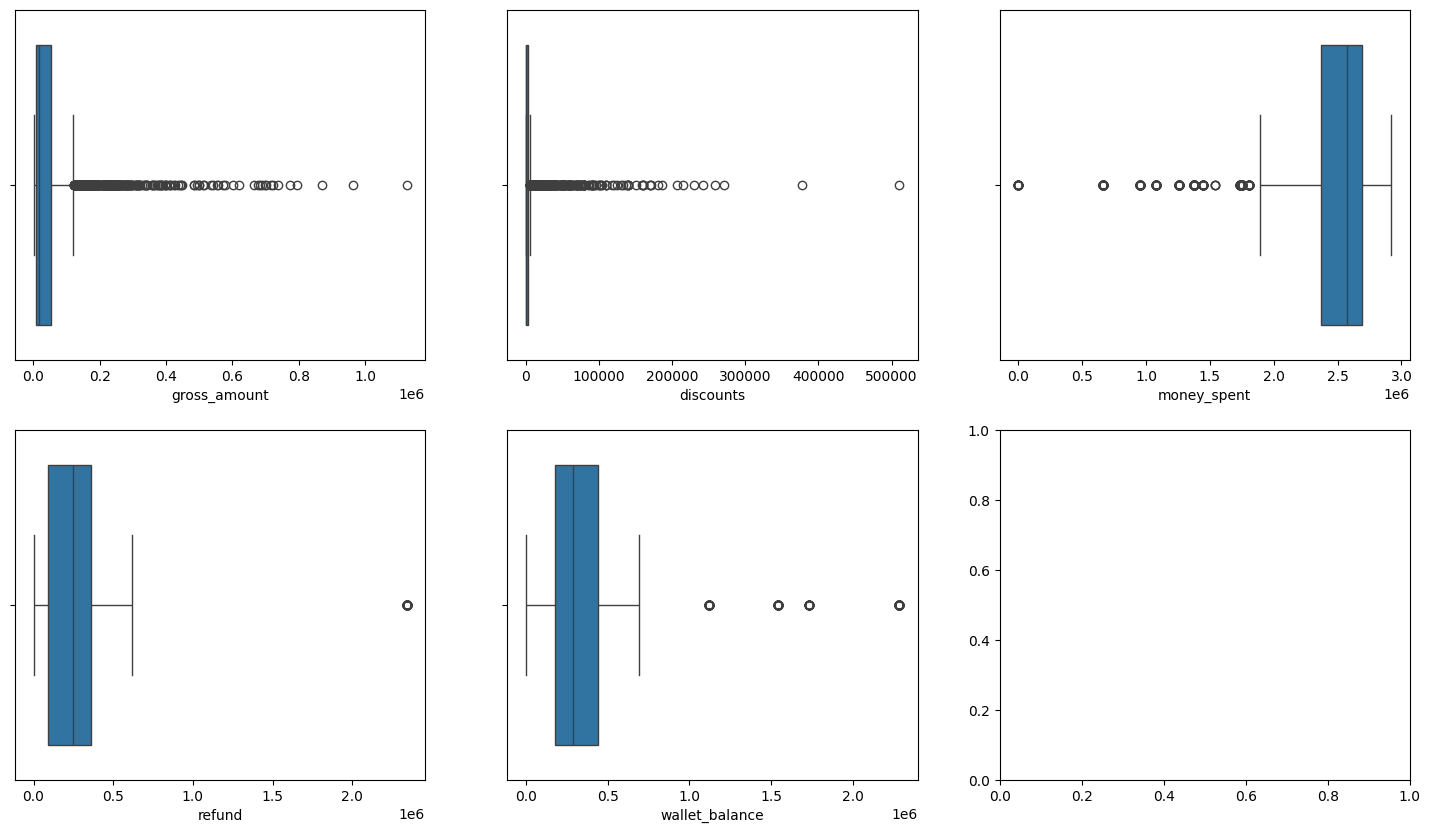

In [ ]:
# Memvisualisasikan distribusi dari fitur dan mengedintifikasikan outlier menggunakan boxplot
fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_94, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_94, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_94, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_94, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_94, x = 'wallet_balance', ax = axes[1, 1])

Dapat dilihat berdasarkan visualisasi di atas, terdapat outlier pada semua kolom yang divisualisasikan. Pada final project kali ini, untuk menghilangkan outlier dan menghindari kehilangan informasi pada data dan mempertahankan karakteristik data yang sangat besar ataupun sangat kecil, kami menggunakan **capping method** , jika data lebih dari atau kurang dari bound yang ada ( upper and lower ) maka dia sebagai outlier akan diganti nilai nya dengan nilai upper/lower bound.

In [ ]:
# Menangani Outlier
def handle_outliers_iqr(df, column):
    Q1 = data_94[column].quantile(0.25)
    Q3 = data_94[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    data_94[column] = np.where(data_94[column] < lower_bound, lower_bound, data_94[column])
    data_94[column] = np.where(data_94[column] > upper_bound, upper_bound, data_94[column])

In [ ]:
for column in outlier_check:
    handle_outliers_iqr(data_94, column)

<Axes: xlabel='wallet_balance'>

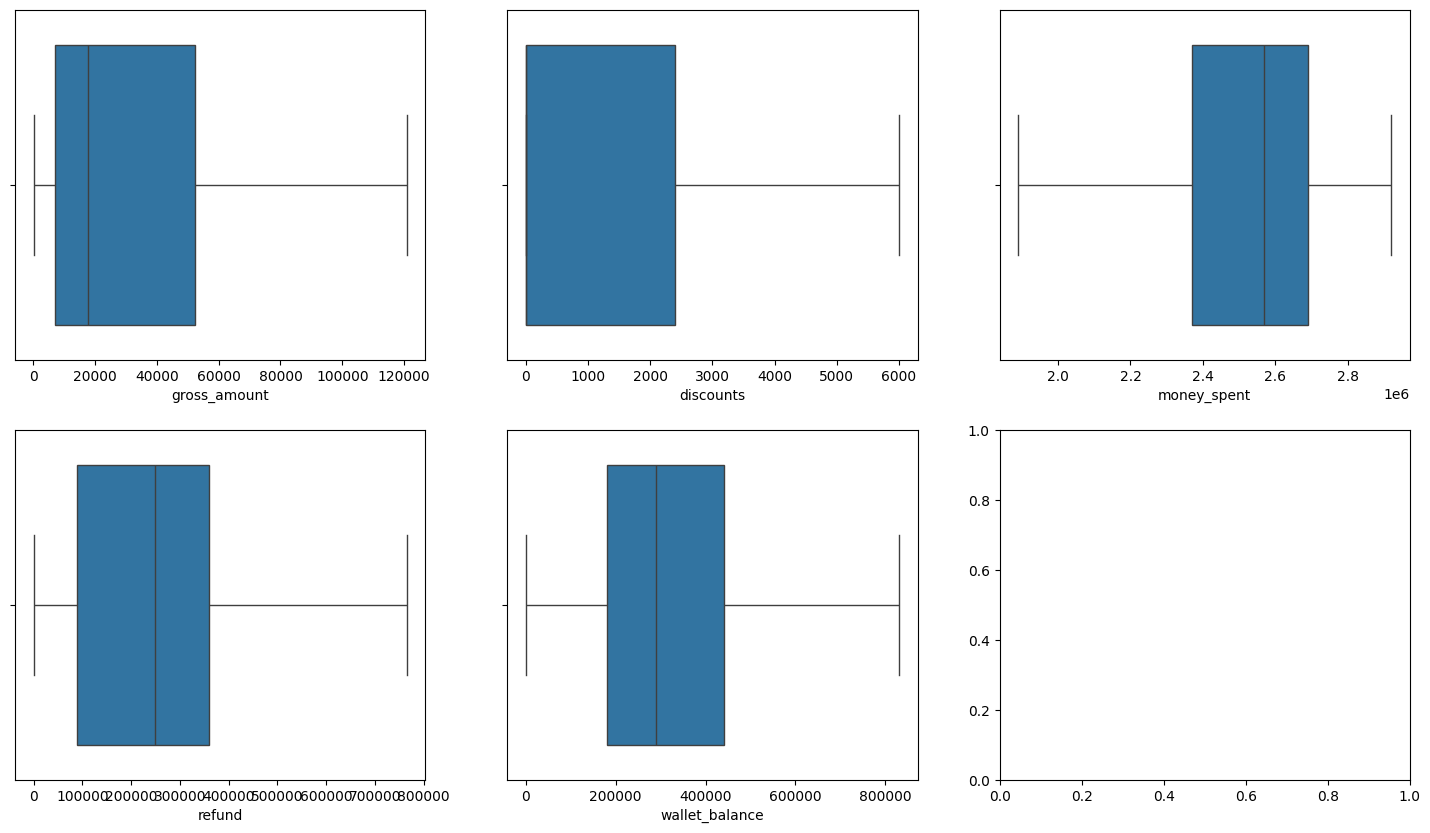

In [ ]:
# Memvisualisasikan distribusi dari fitur dan melihat apakah masih adanya outlier

fig, axes = plt.subplots(2, 3, figsize = (18, 10))

sns.boxplot(data_94, x = 'gross_amount', ax = axes[0, 0])
sns.boxplot(data_94, x = 'discounts', ax = axes[0, 1])
sns.boxplot(data_94, x = 'money_spent', ax = axes[0, 2])
sns.boxplot(data_94, x = 'refund', ax = axes[1, 0])
sns.boxplot(data_94, x = 'wallet_balance', ax = axes[1, 1])

Dapat terlihat, data sudah bersih dari outlier

**Changing Data Type**

In [ ]:
data_94.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2967 entries, 0 to 3064
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trx_id            2967 non-null   object 
 1   user_id           2967 non-null   object 
 2   product_id        2967 non-null   int64  
 3   gross_amount      2967 non-null   float64
 4   discounts         2967 non-null   float64
 5   transaction_date  2967 non-null   object 
 6   product name      2967 non-null   object 
 7   full_name         2967 non-null   object 
 8   gender            2967 non-null   object 
 9   money_spent       2967 non-null   float64
 10  refund            2967 non-null   float64
 11  wallet_balance    2967 non-null   float64
 12  join_date         2967 non-null   object 
 13  birth             2967 non-null   object 
 14  kode kecamatan    2967 non-null   object 
 15  nama provinsi     2967 non-null   object 
 16  kode provinsi     2967 non-null   int64  
 17  

In [ ]:
# Mengubah tipe data yang harusnya datetime menjadi datetime
data_94['transaction_date'] = pd.to_datetime(data_94['transaction_date'])
data_94['birth'] = pd.to_datetime(data_94['birth'])
data_94['join_date'] = pd.to_datetime(data_94['join_date'])

In [ ]:
data_94.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2967 entries, 0 to 3064
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   trx_id            2967 non-null   object        
 1   user_id           2967 non-null   object        
 2   product_id        2967 non-null   int64         
 3   gross_amount      2967 non-null   float64       
 4   discounts         2967 non-null   float64       
 5   transaction_date  2967 non-null   datetime64[ns]
 6   product name      2967 non-null   object        
 7   full_name         2967 non-null   object        
 8   gender            2967 non-null   object        
 9   money_spent       2967 non-null   float64       
 10  refund            2967 non-null   float64       
 11  wallet_balance    2967 non-null   float64       
 12  join_date         2967 non-null   datetime64[ns]
 13  birth             2967 non-null   datetime64[ns]
 14  kode kecamatan    2967 non-nu

## EDA

In [ ]:
# Menampilkan five statistic
data_94.describe()

product_id  gross_amount  discounts               transaction_date  \
count    2,967.00      2,967.00   2,967.00                           2967   
mean         8.97     36,272.42   1,454.23  2024-07-02 15:26:01.577350912   
min          1.00        100.00       0.00            2024-01-01 00:00:00   
25%          4.00      6,900.00       0.00            2024-04-01 00:00:00   
50%          9.00     17,800.00       0.00            2024-07-06 00:00:00   
75%         14.00     52,450.00   2,400.00            2024-10-02 00:00:00   
max         18.00    120,775.00   6,000.00            2024-12-31 00:00:00   
std          5.17     39,697.65   2,505.69                            NaN   

       money_spent     refund  wallet_balance                      join_date  \
count     2,967.00   2,967.00        2,967.00                           2967   
mean  2,461,584.09 250,404.45      315,433.10  2023-11-14 00:40:16.986855424   
min   1,890,000.00       0.00            0.00            2023-10-01 00:00:00   
25%   2,370,000.00  90,000.00      180,000.00            2023-10-26 00:00:00   
50%   2,570,000.00 250,000.00      290,000.00            2023-11-14 00:00:00   
75%   2,690,000.00 360,000.00      440,000.00            2023-12-05 00:00:00   
max   2,920,000.00 765,000.00      830,000.00            2024-02-11 00:00:00   
std     319,692.70 179,464.88      212,852.40                            NaN   

                               birth  kode provinsi  
count                           2967       2,967.00  
mean   1992-04-16 01:28:19.898887808          94.00  
min              1967-10-15 00:00:00          94.00  
25%              1985-11-26 00:00:00          94.00  
50%              1992-09-13 00:00:00          94.00  
75%              2000-07-01 00:00:00          94.00  
max              2007-12-18 00:00:00          94.00  
std                              NaN           0.00

Daapt dilihat dari code diatas, kami akan melihat detail statistik dari data, termasuk min, q1 (25%), q2 (50%), q3 (75%), dan max dari tiap-tiap kolom.

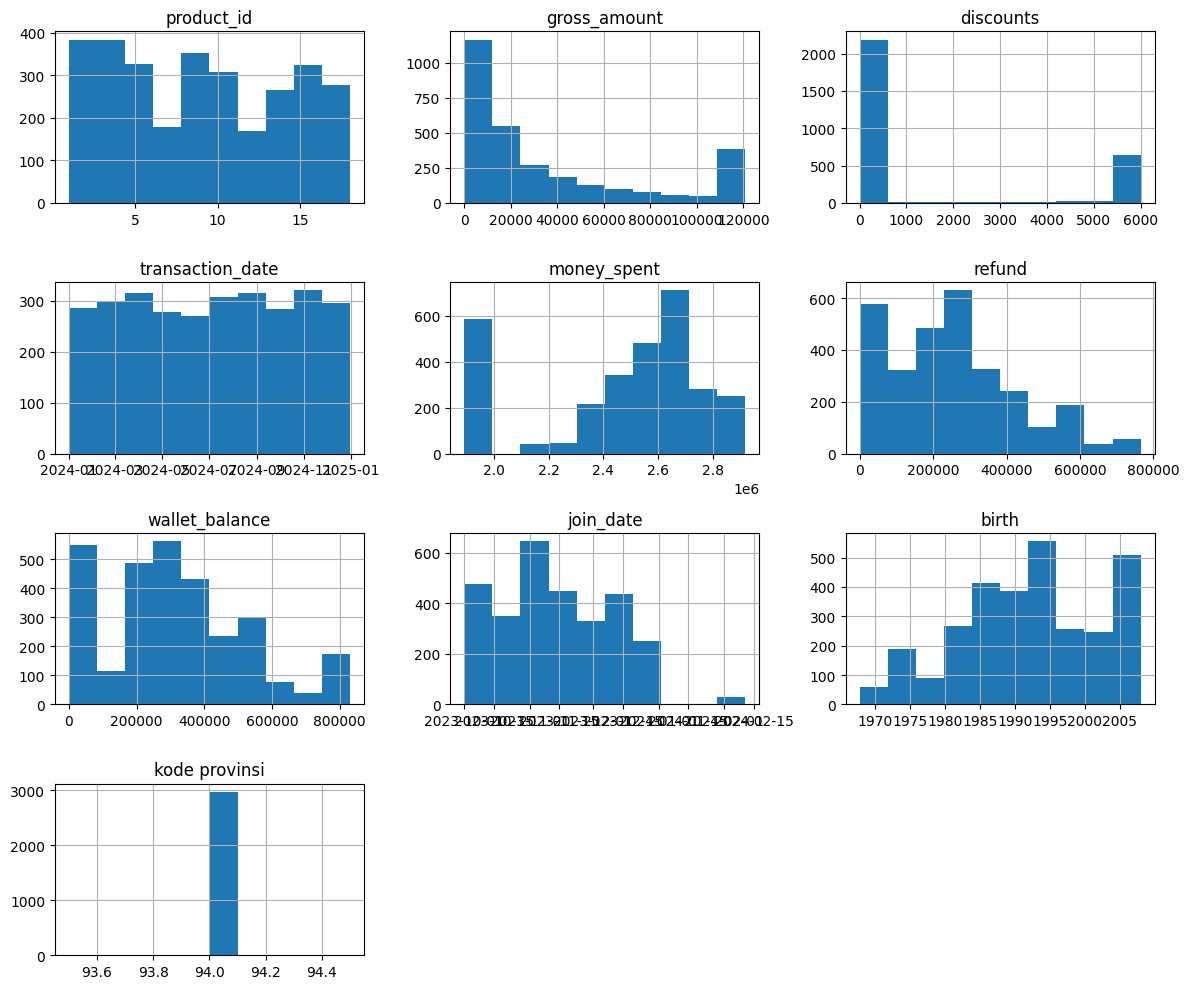

In [ ]:
# Menampilkan histogram pada variabel numerik
data_94.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

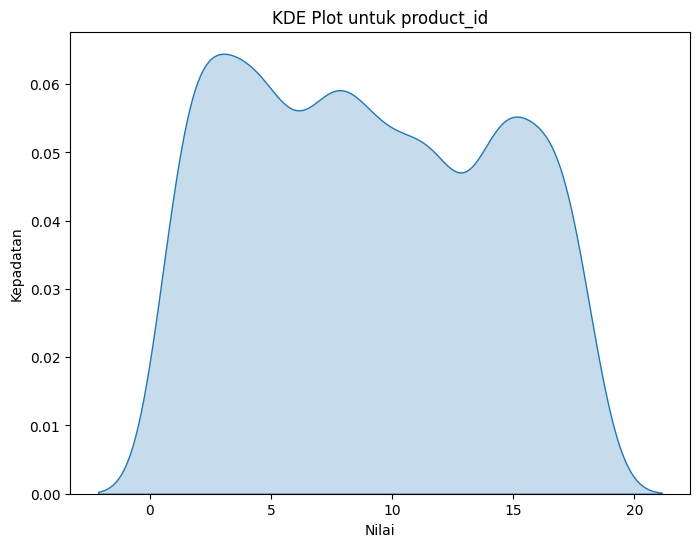

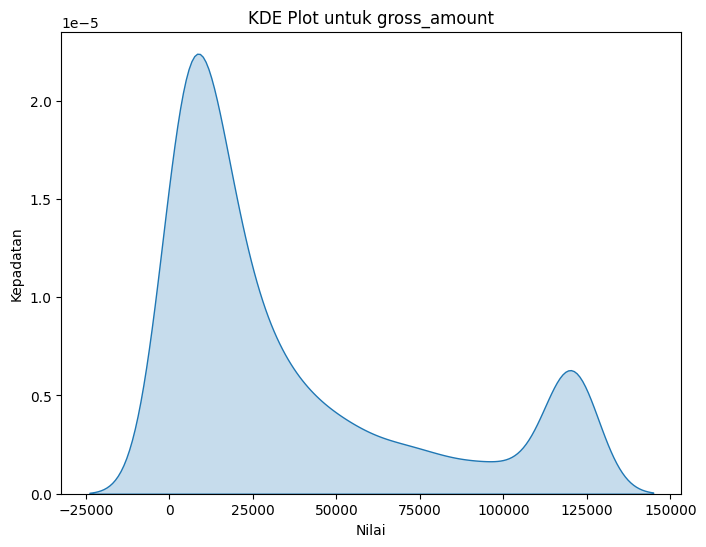

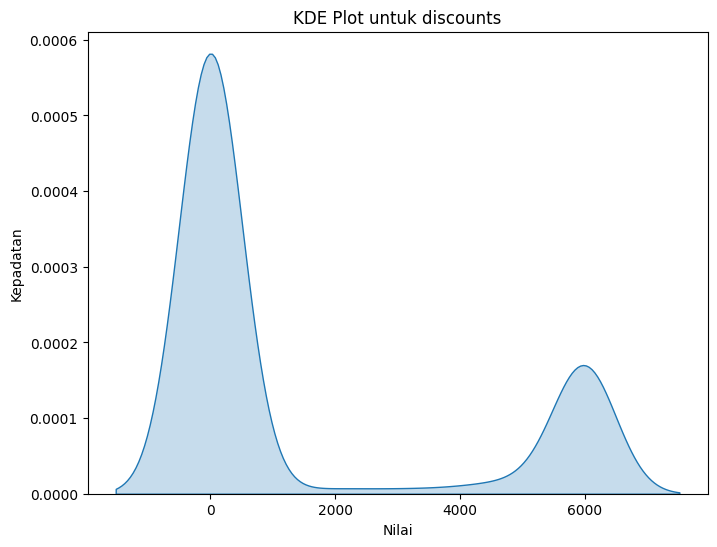

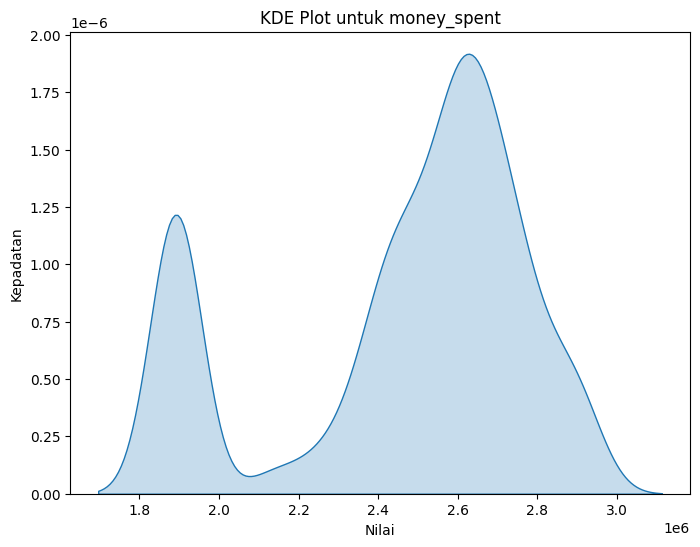

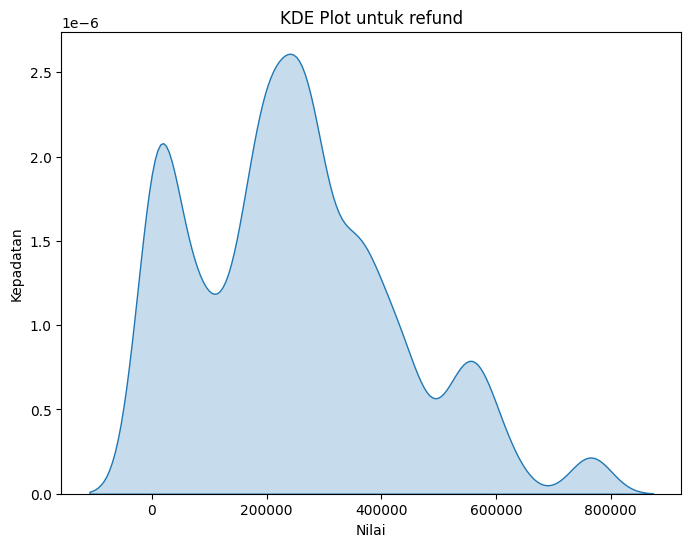

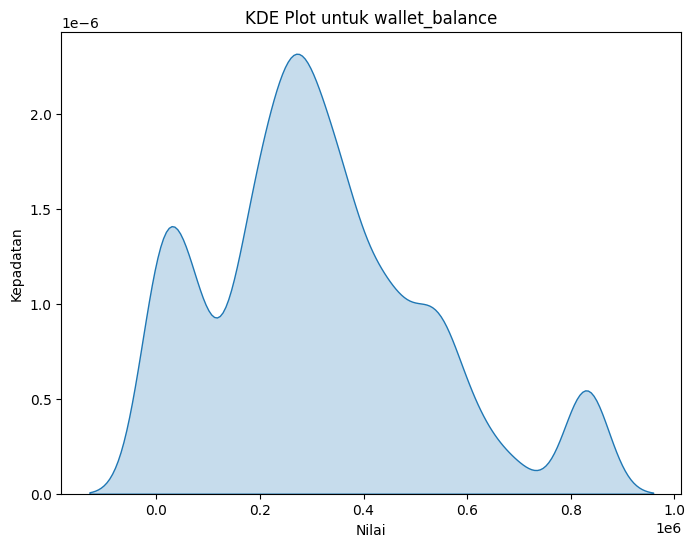

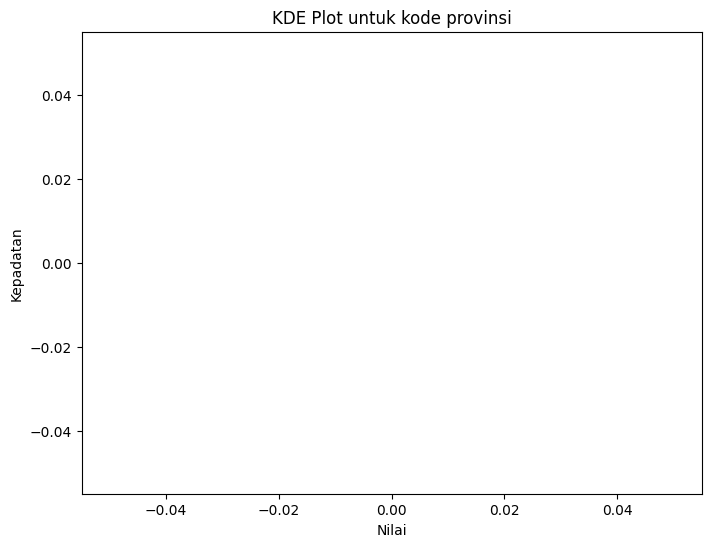

In [ ]:
#KDE Plot untuk mengetahui bentuk distrbusi

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loop melalui setiap kolom dalam DataFrame
for column in data_94.columns:
    # Pilih hanya kolom numerik
    if data_94[column].dtype in ['int64', 'float64']:
        # Buat KDE plot untuk setiap kolom numerik
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data_94[column], shade=True)

        # Tambahkan judul dan label sumbu
        plt.title('KDE Plot untuk ' + column)
        plt.xlabel('Nilai')
        plt.ylabel('Kepadatan')

        # Tampilkan plot
        plt.show()

Berdasarkan histogram dan KDE Plot yang digunakan, kita dapat mengetahui modality dari data (jumlah puncak). Seperti contohnya pada kolom discount adalah bimodal, refund adalah multimodal, dan transaction date adalah uniform.

In [ ]:
# Memilih hanya kolom-kolom numerik
numeric_columns = data_94.select_dtypes(include=['int', 'float'])

# Menghitung skewness hanya untuk kolom-kolom numerik
skewness = numeric_columns.skew()

print("Skewness untuk kolom-kolom numerik:")
print(skewness)

Skewness untuk kolom-kolom numerik:
product_id        0.11
gross_amount      1.19
discounts         1.19
money_spent      -0.80
refund            0.57
wallet_balance    0.62
kode provinsi     0.00
dtype: float64


Disini kami ingin **mengkalkulasikan skewness** dari data,

Skewness merupakan cara untuk memperkirakan atau mengukur bentuk distribusi.  skewness digunakan untuk memperkirakan perilaku asimetris daripada menghitung distribusi frekuensi. Skewness dapat terdiri dari dua jenis:

- Simetris: Sebuah distribusi dapat disebut simetris jika terlihat sama dari kiri dan kanan dari titik tengah.
- Asimetris: Sebuah distribusi dapat disebut asimetris jika tidak tampak sama dari kiri dan kanan dari titik pusat.
Distribusi berdasarkan nilai kemencengan:

berikut adalah penjelasan mengenai skewness score:
- Skewness = 0: Berarti terdistribusi secara normal.
- Skewness > 0: Maka lebih banyak bobot di ekor kiri distribusi.
- Skewness < 0: Maka lebih banyak bobot di ekor kanan distribusi.

Berdasarkan skor di atas, dapat disimpulkan bahwa skewness fitur:

Data condong ke kanan:

- product_id (0.11)
- Gross_amount (1.19)
- Discounts (1.19)
- refund (0.57)
- wallet_balance (0.62)


Data condong ke kiri:

- Money_spent (-0.80)

Berdistribusi Normal:

- Kode Provinsi (0.000000)

## Feature Engineering

**Feature Selection**

Feature selection adalah cara memilih subset fitur yang paling relevan dari
kumpulan fitur asli dengan menghapus fitur yang redundan, tidak relevan, atau
berisik. Disini kami hanya memilih beberapa fitur yang relevan untuk kami analisis lebih lanjut hingga pembuatan dashboard

In [ ]:
# Melihat 5 data teratas dari data_94
data_94.head(5)

trx_id          user_id  product_id  gross_amount  discounts  \
0  TRX722042  SC9404152007902           1     41,700.00       0.00   
1  TRX722043  SC9404152007902           1      9,300.00       0.00   
2  TRX722044  SC9404152007902           1     27,100.00   6,000.00   
3  TRX722045  SC9404152007902           1     41,900.00   6,000.00   
4  TRX722046  SC9404152007902           2     68,200.00       0.00   

  transaction_date   product name full_name     gender  money_spent    refund  \
0       2024-05-24    Man Fashion    KUSUMA  laki-laki 1,890,000.00 20,000.00   
1       2024-04-11    Man Fashion    KUSUMA  laki-laki 1,890,000.00 20,000.00   
2       2024-05-08    Man Fashion    KUSUMA  laki-laki 1,890,000.00 20,000.00   
3       2024-05-17    Man Fashion    KUSUMA  laki-laki 1,890,000.00 20,000.00   
4       2024-01-13  Woman Fashion    KUSUMA  laki-laki 1,890,000.00 20,000.00   

   wallet_balance  join_date      birth kode kecamatan nama provinsi  \
0       90,000.00 2023-10-19 2007-06-24         940415  PAPUA TENGAH   
1       90,000.00 2023-10-19 2007-06-24         940415  PAPUA TENGAH   
2       90,000.00 2023-10-19 2007-06-24         940415  PAPUA TENGAH   
3       90,000.00 2023-10-19 2007-06-24         940415  PAPUA TENGAH   
4       90,000.00 2023-10-19 2007-06-24         940415  PAPUA TENGAH   

   kode provinsi nama kabupaten kode kabupaten nama kecamatan  
0             94         MIMIKA           9404          IWAKA  
1             94         MIMIKA           9404          IWAKA  
2             94         MIMIKA           9404          IWAKA  
3             94         MIMIKA           9404          IWAKA  
4             94         MIMIKA           9404          IWAKA

In [ ]:
# Memilih feature yang relevan yang disimpan dalam variabel feature_94
features_94 = data_94[['user_id', 'wallet_balance', 'money_spent', 'product name', 'gender', 'refund', 'birth', 'nama kabupaten']]

# Melihat isi dari features_35
features_94

user_id  wallet_balance  money_spent         product name  \
0     SC9404152007902       90,000.00 1,890,000.00          Man Fashion   
1     SC9404152007902       90,000.00 1,890,000.00          Man Fashion   
2     SC9404152007902       90,000.00 1,890,000.00          Man Fashion   
3     SC9404152007902       90,000.00 1,890,000.00          Man Fashion   
4     SC9404152007902       90,000.00 1,890,000.00        Woman Fashion   
...               ...             ...          ...                  ...   
3060  SC9401052001003       60,000.00 2,910,000.00     Sewa Motor/Mobil   
3061  SC9401052001003       60,000.00 2,910,000.00                Hotel   
3062  SC9401052001003       60,000.00 2,910,000.00                Hotel   
3063  SC9401052001003       60,000.00 2,910,000.00  Tagihan (WIFI, PLN)   
3064  SC9401052001003       60,000.00 2,910,000.00  Tagihan (WIFI, PLN)   

         gender     refund      birth nama kabupaten  
0     laki-laki  20,000.00 2007-06-24         MIMIKA  
1     laki-laki  20,000.00 2007-06-24         MIMIKA  
2     laki-laki  20,000.00 2007-06-24         MIMIKA  
3     laki-laki  20,000.00 2007-06-24         MIMIKA  
4     laki-laki  20,000.00 2007-06-24         MIMIKA  
...         ...        ...        ...            ...  
3060  laki-laki 150,000.00 1995-01-06         NABIRE  
3061  laki-laki 150,000.00 1995-01-06         NABIRE  
3062  laki-laki 150,000.00 1995-01-06         NABIRE  
3063  laki-laki 150,000.00 1995-01-06         NABIRE  
3064  laki-laki 150,000.00 1995-01-06         NABIRE  

[2967 rows x 8 columns]

Diatas adalah Feature yang digunakan, yaitu user_id, wallet_balance, money_spent, product_name, gender, refund, birth dan nama kabupaten. dapat dilihat juga pada data diatas, beberapa baris memiliki user_id yang sama, oleh karena itu kami harus melakukan group by berdasarkan user_id.

**Feature encoding (one hot encoding)**

Karena kami ingin melihat jumlah transaksi user pada setiap produk, kami pertama kali akan melakukan one hot encoding pada product_name, kemudian nanti kami akan melakukan fungsi agregasi sum pada product_name bersamaan dengan groupby berdasarkan user_id untuk melihat jumlah pembelian produk masing-masing user

In [ ]:
# Melakukan One Hot Encoding pada feature_94 yang disimpan dalam variabel encoded_94
encoded_94 = pd.get_dummies(features_94, columns=['product name'], dtype=int)

# Menampilkan 5 data teratas pada encoded_94
encoded_94.head(5)

user_id  wallet_balance  money_spent     gender    refund  \
0  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
1  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
2  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
3  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
4  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   

       birth nama kabupaten  product name_Elektronik  \
0 2007-06-24         MIMIKA                        0   
1 2007-06-24         MIMIKA                        0   
2 2007-06-24         MIMIKA                        0   
3 2007-06-24         MIMIKA                        0   
4 2007-06-24         MIMIKA                        0   

   product name_Food & Drink  product name_Hotel  ...  product name_Other  \
0                          0                   0  ...                   0   
1                          0                   0  ...                   0   
2                          0                   0  ...                   0   
3                          0                   0  ...                   0   
4                          0                   0  ...                   0   

   product name_Otomotif  product name_Pulsa  product name_Ride Hailing  \
0                      0                   0                          0   
1                      0                   0                          0   
2                      0                   0                          0   
3                      0                   0                          0   
4                      0                   0                          0   

   product name_Sewa Motor/Mobil  product name_Tagihan (WIFI, PLN)  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   product name_Top Up Game  \
0                         0   
1                         0   
2                         0   
3                         0   
4                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  
0                           0  
1                           0  
2                           0  
3                           0  
4                           1  

[5 rows x 25 columns]

**Feature Creation**

Pada feature creation, kami membuat kolom age berdasarkan kolom birth, dan kami akan membuat kolom total transaksi dengan menjumlahkan semua transaksi produk. Kolom age nantinya akan digunakan saat membuat dashboard, dan total transaksi akan digunakan untuk pembentukan cluster

In [ ]:
# Membuat Kolom Age
def calculate_age(birth_date):
    today = pd.Timestamp.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Membuat kolom 'age' berdasarkan kolom 'birth'
encoded_94['age'] = encoded_94['birth'].apply(calculate_age)

# Memindahkan kolom 'age' ke posisi ke-7
col_name = 'age'
col_position = 6  # posisi ke-7 (index mulai dari 0)
age_col = encoded_94.pop(col_name)
encoded_94.insert(col_position, col_name, age_col)

In [ ]:
# Membuat kolom total transaksi
encoded_94['total_transaksi'] = encoded_94.iloc[:, 8:].sum(axis=1)

In [ ]:
# Melihat 5 data teratas encoded_94 yang sudah dilakukan feature creation
encoded_94.head(5)

user_id  wallet_balance  money_spent     gender    refund  \
0  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
1  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
2  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
3  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   
4  SC9404152007902       90,000.00 1,890,000.00  laki-laki 20,000.00   

       birth  age nama kabupaten  product name_Elektronik  \
0 2007-06-24   16         MIMIKA                        0   
1 2007-06-24   16         MIMIKA                        0   
2 2007-06-24   16         MIMIKA                        0   
3 2007-06-24   16         MIMIKA                        0   
4 2007-06-24   16         MIMIKA                        0   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          0  ...                      0                   0   
1                          0  ...                      0                   0   
2                          0  ...                      0                   0   
3                          0  ...                      0                   0   
4                          0  ...                      0                   0   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         0   
3                                 0                         0   
4                                 0                         0   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   product name_Woman Fashion  total_transaksi  
0                           0                1  
1                           0                1  
2                           0                1  
3                           0                1  
4                           1                1  

[5 rows x 27 columns]

**Grouping Data**

Disini, kami menggunakan data grouping, berdasarkan user_id

In [ ]:
# Mengecek jumlah nilai unik dalam kolom 'user_id'
unique_id_count = data_94['user_id'].nunique()

print("\nJumlah nilai unik dalam kolom 'user_id':")
print(unique_id_count)



Jumlah nilai unik dalam kolom 'user_id':
65


berdasarkan jumlah nilai unik pada kolom user_id, disimpulkan bahwa terdapat 65 user unik pada provinsi papua tengah (trx 94)

In [ ]:
# Agregasi pada kolom
agg_dict = {
    'money_spent': 'mean',
    'refund': 'mean',
    'wallet_balance': 'mean',
    'age': 'mean',
    'gender': 'first',
    'birth': 'first',
    'nama kabupaten': 'first'
}

# Menambahkan fungsi sum untuk semua kolom produk
for column in encoded_94.columns:
    if column not in ['user_id', 'money_spent', 'refund', 'wallet_balance', 'age', 'gender', 'birth', 'nama kabupaten']:
        agg_dict[column] = 'sum'

# Group by 'user_id' dan 'product_id', aggregate sesuai dengan agg_dict
grouped_94 = encoded_94.groupby('user_id').agg(agg_dict).reset_index()

# Mengatur tampilan agar hasil lebih mudah dibaca
pd.options.display.float_format = '{:,.2f}'.format

# Melihat 5 data teratas dari seluruh data yang telah dilakukan grouping
grouped_94.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC9401011001001 2,650,000.00 310,000.00      310,000.00 17.00  perempuan   
1  SC9401011001002 2,760,000.00 240,000.00      240,000.00 22.00  laki-laki   
2  SC9401011001010 2,460,000.00 540,000.00      540,000.00 23.00  perempuan   
3  SC9401011001013 2,460,000.00 360,000.00      380,000.00 16.00  perempuan   
4  SC9401011001019 1,890,000.00       0.00            0.00 31.00  laki-laki   

       birth nama kabupaten  product name_Elektronik  \
0 2007-04-02         NABIRE                        4   
1 2001-08-12         NABIRE                        4   
2 2000-07-01         NABIRE                        3   
3 2007-08-14         NABIRE                        2   
4 1993-04-27         NABIRE                        3   

   product name_Food & Drink  ...  product name_Otomotif  product name_Pulsa  \
0                          4  ...                      2                   3   
1                          2  ...                      0                   2   
2                          4  ...                      4                   2   
3                          2  ...                      3                   0   
4                          2  ...                      0                   2   

   product name_Ride Hailing  product name_Sewa Motor/Mobil  \
0                          3                              4   
1                          3                              4   
2                          2                              0   
3                          4                              4   
4                          2                              0   

   product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
0                                 2                         3   
1                                 4                         3   
2                                 0                         3   
3                                 4                         3   
4                                 3                         4   

   product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
0                                                  3                     0   
1                                                  2                     2   
2                                                  4                     2   
3                                                  2                     0   
4                                                  3                     3   

   product name_Woman Fashion  total_transaksi  
0                           2               48  
1                           4               52  
2                           3               51  
3                           4               49  
4                           3               44  

[5 rows x 27 columns]

Setelah dilakukan groupby berdasarkan user_id, dapat dilihat tidak adanya redundansi baris user_id, lengkap dengan jumlah transaksi setiap produk dan total transaksi

**Feature Correlation**

Disini, kami ingin melihat korelasi antar fitur, semakin mendekati angka 1, baik plus atau minus, maka korelasi akan semakin kuat baik secara positif maupun negatif.

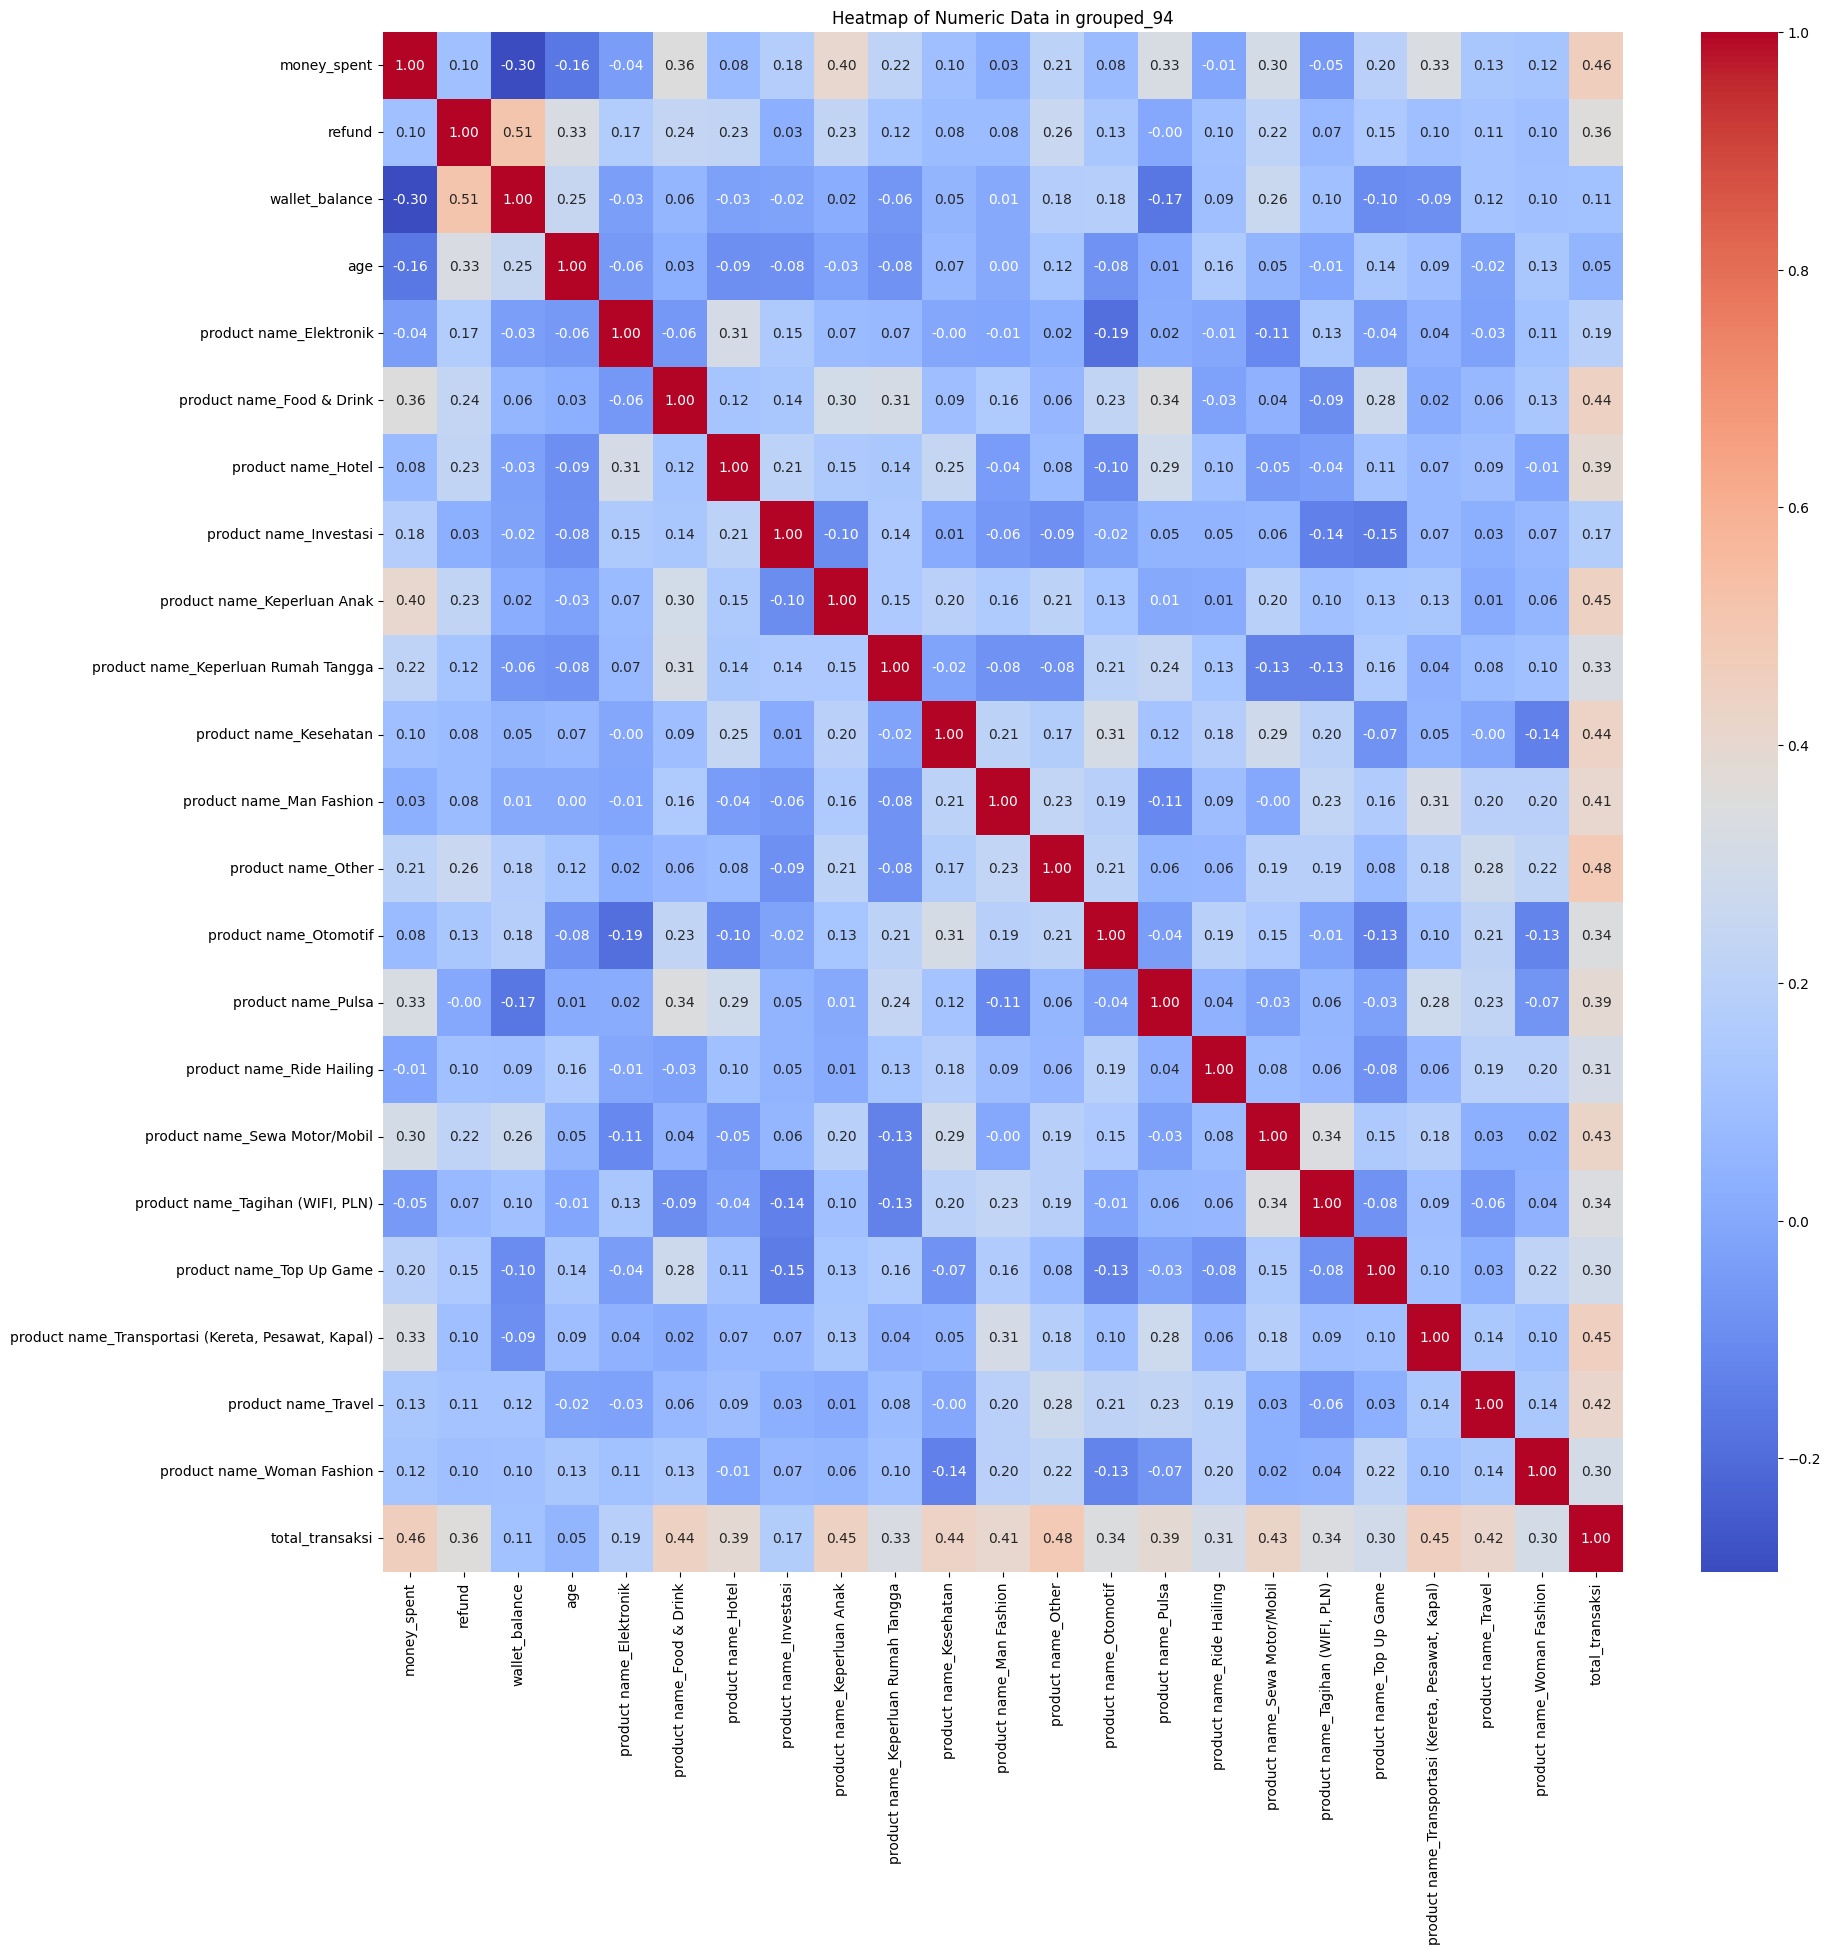

In [ ]:
# Memilih hanya kolom numerik
numeric_cols = grouped_94.select_dtypes(include='number')

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Numeric Data in grouped_94')
plt.show()

Dari correlation heatmap diatas, dapat diketahui bahwa fitur yang paling berkorelasi tinggi adalah wallet_balance dengan refund dengan nilai 0.51.

## Modelling

Saat modeling, sesuai dengan judul project kami yang mengsegmentasi berdasarkan transaksi, maka kami akan menggunakan kolom money_spent, transaksi produk, dan total transaksi saja

In [ ]:
# Column_cluster_94 adalah variabel yang berisi kolom untuk pembuatan cluster, drop data yang tidak digunakan
column_cluster_94 = grouped_94.drop(columns=['user_id', 'refund', 'age', 'wallet_balance', 'gender', 'birth', 'nama kabupaten'])

**Feature Scaling**

Scaling dilakukan untuk mentransformasi nilai dari suatu fitur menjadi
range yang spesifik. Feature Scaling yang digunakan adalah normalisasi (MinMaxScaler), MinMaxScaler akan memperkecil rentang data dari 0 sampai 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_vector = column_cluster_94.values.flatten().reshape(-1, 1)

# Gunakan MinMaxScaler untuk normalisasi
scaler = MinMaxScaler()

# Lakukan scaling
scaled_vector = scaler.fit_transform(data_vector)

# Kembalikan vektor yang telah discaling ke bentuk aslinya (dataframe)
column_cluster_94 = pd.DataFrame(scaled_vector.reshape(column_cluster_94.shape), columns=column_cluster_94.columns)

**Model 1 - Mini Batch Kmeans Clustering**

Pada final project ini, sebelum menerapkan model final, kami akan membandingkan algoritma kmeans dan mini batch kmeans terlebih dahulu berdasarkan silhoutte score.

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import MiniBatchKMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, random state dan batch size nya
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, max_iter=50, random_state=42, batch_size = 20 )
mini_batch_kmeans.fit(column_cluster_94)

MiniBatchKMeans(batch_size=20, max_iter=50, n_clusters=4, random_state=42)

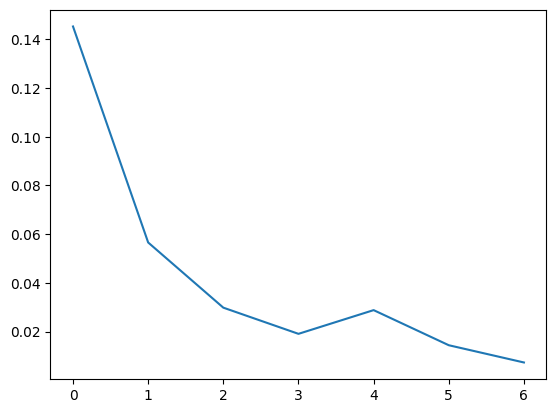

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  mini_batch_kmeans = MiniBatchKMeans (n_clusters=num_clusters, max_iter=50, random_state=42, batch_size = 20)
  mini_batch_kmeans.fit(column_cluster_94)

  ssd.append(mini_batch_kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

Berdasarkan tikungan pada elbow curve, didapatkan jumlah kluster optimal adalah 2. Karena elbow curve sering kali bersifat ambigu, maka dilakukan analisa silhoutte score untuk menentukan nilai k yang optimal

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
    # Inisialisasi Mini-Batch K-Means
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, max_iter = 50, batch_size = 20)
    mini_batch_kmeans.fit(column_cluster_94)
    cluster_labels = mini_batch_kmeans.labels_

    # Kalkulasi silhouette score
    silhouette_avg = silhouette_score(column_cluster_94, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7654994466529081
For n_clusters=3, the silhouette score is 0.6239431614045581
For n_clusters=4, the silhouette score is 0.6430810521544057
For n_clusters=5, the silhouette score is 0.6058345280208792
For n_clusters=6, the silhouette score is 0.5732196310696764
For n_clusters=7, the silhouette score is 0.589103915397175
For n_clusters=8, the silhouette score is 0.627629463262373


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.7654994466529081. Silhoutte score juga berperan sebagai metrik evaluasi yang mengindikasikan baik buruknya suatu model cluster.

**Model 2 - Kmeans Clustering**

In [ ]:
# Mengimport library yang diperlukan
from sklearn.cluster import KMeans

# Pembuatan model dengan inisialisasi jumlah kluster, iterasi maksimum, dan random state
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(column_cluster_94)

KMeans(max_iter=50, n_clusters=4, random_state=42)

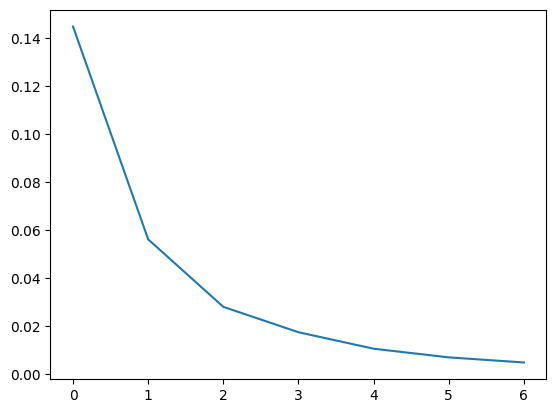

In [ ]:
# Elbow-curve/SSD untuk mengetahui jumlah kluster optimal
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
  kmeans = KMeans (n_clusters=num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_94)

  ssd.append(kmeans.inertia_)
# plot ssd untuk setiap n_cluster
plt.plot(ssd)

Berdasarkan elbow method yang ada, jumlah kluster optimal adalah 2

In [ ]:
from sklearn.metrics import silhouette_score

# Kisaran jumlah cluster yang akan dievaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Iterasi pada rentang jumlah cluster
for num_clusters in range_n_clusters:
  # Inisialisasi model
  kmeans = KMeans (num_clusters, max_iter=50, random_state=42)
  kmeans.fit(column_cluster_94)
  cluster_labels = kmeans.labels_

# Kalkulasi silhouette Score
  silhouette_avg = silhouette_score(column_cluster_94, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7654994466529081
For n_clusters=3, the silhouette score is 0.6271233418669697
For n_clusters=4, the silhouette score is 0.6502352282969585
For n_clusters=5, the silhouette score is 0.6506876440571703
For n_clusters=6, the silhouette score is 0.6548319015290085
For n_clusters=7, the silhouette score is 0.6491136731168758
For n_clusters=8, the silhouette score is 0.6487622323839798


Berdasarkan silhoutte score yang ada, jumlah kluster yang paling optimal adalah 2 dengan skor 0.7654994466529081

**Final Model**

Dari kedua model, minibatch dan kemans, dengan jumlah kluster yang sama yaitu 2, kmeans dan minibatch kmeans memiliki silhoutte score yang sama. Namun kami mengasumsikan hasil dari kmeans lebih stabil karena dimulai dari n_cluster 3 hingga 8, nilainya secara stabil di angka 0.6 sedangkan minibatch tidak. Oleh karena itu untuk model final kami memilih menggunakan kmeans.

In [ ]:
# Final model dengan k=2
kmeans = KMeans (n_clusters=2, max_iter=50, random_state=42)
kmeans.fit(column_cluster_94)

KMeans(max_iter=50, n_clusters=2, random_state=42)

In [ ]:
# Menetapkan label pada grouped_94
grouped_94['Cluster_id'] = kmeans.labels_
grouped_94.sample(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
30  SC9401011008013 1,900,000.00 290,000.00      260,000.00 31.00  laki-laki   
10  SC9401011002010 2,450,000.00 390,000.00      480,000.00 35.00  perempuan   
13  SC9401011002016 2,660,000.00       0.00            0.00 43.00  laki-laki   
55  SC9401072004004 1,910,000.00  20,000.00       20,000.00 46.00  perempuan   
7   SC9401011002003 2,630,000.00 350,000.00      350,000.00 42.00  laki-laki   

        birth nama kabupaten  product name_Elektronik  \
30 1992-10-16         NABIRE                        3   
10 1988-09-03         NABIRE                        3   
13 1980-08-12         NABIRE                        2   
55 1977-08-23         NABIRE                        3   
7  1982-02-26         NABIRE                        2   

    product name_Food & Drink  ...  product name_Pulsa  \
30                          2  ...                   0   
10                          4  ...                   4   
13                          3  ...                   0   
55                          2  ...                   2   
7                           2  ...                   0   

    product name_Ride Hailing  product name_Sewa Motor/Mobil  \
30                          4                              0   
10                          3                              0   
13                          3                              0   
55                          3                              0   
7                           2                              4   

    product name_Tagihan (WIFI, PLN)  product name_Top Up Game  \
30                                 4                         0   
10                                 0                         2   
13                                 0                         4   
55                                 3                         0   
7                                  2                         3   

    product name_Transportasi (Kereta, Pesawat, Kapal)  product name_Travel  \
30                                                  2                     0   
10                                                  2                     4   
13                                                  2                     2   
55                                                  4                     0   
7                                                   2                     0   

    product name_Woman Fashion  total_transaksi  Cluster_id  
30                           2               38           1  
10                           4               47           0  
13                           4               35           0  
55                           4               42           1  
7                            4               38           0  

[5 rows x 28 columns]

Cluster id diterapkan pada variabel grouped_94, yang sebelumnya sudah dijelaskan berisi kolom yang ingin kita analisa lebih lanjut.

In [ ]:
# Mengubah nama kolom agar data menjadi lebih rapi
grouped_94 = grouped_94.rename(columns=lambda x: x.replace('product name_', 'Transaksi '))

# Melihat 5 data teratas dari grouped_94
grouped_94.head(5)

user_id  money_spent     refund  wallet_balance   age     gender  \
0  SC9401011001001 2,650,000.00 310,000.00      310,000.00 17.00  perempuan   
1  SC9401011001002 2,760,000.00 240,000.00      240,000.00 22.00  laki-laki   
2  SC9401011001010 2,460,000.00 540,000.00      540,000.00 23.00  perempuan   
3  SC9401011001013 2,460,000.00 360,000.00      380,000.00 16.00  perempuan   
4  SC9401011001019 1,890,000.00       0.00            0.00 31.00  laki-laki   

       birth nama kabupaten  Transaksi Elektronik  Transaksi Food & Drink  \
0 2007-04-02         NABIRE                     4                       4   
1 2001-08-12         NABIRE                     4                       2   
2 2000-07-01         NABIRE                     3                       4   
3 2007-08-14         NABIRE                     2                       2   
4 1993-04-27         NABIRE                     3                       2   

   ...  Transaksi Pulsa  Transaksi Ride Hailing  Transaksi Sewa Motor/Mobil  \
0  ...                3                       3                           4   
1  ...                2                       3                           4   
2  ...                2                       2                           0   
3  ...                0                       4                           4   
4  ...                2                       2                           0   

   Transaksi Tagihan (WIFI, PLN)  Transaksi Top Up Game  \
0                              2                      3   
1                              4                      3   
2                              0                      3   
3                              4                      3   
4                              3                      4   

   Transaksi Transportasi (Kereta, Pesawat, Kapal)  Transaksi Travel  \
0                                                3                 0   
1                                                2                 2   
2                                                4                 2   
3                                                2                 0   
4                                                3                 3   

   Transaksi Woman Fashion  total_transaksi  Cluster_id  
0                        2               48           0  
1                        4               52           0  
2                        3               51           0  
3                        4               49           0  
4                        3               44           1  

[5 rows x 28 columns]

In [ ]:
# Mengecek jumlah masing-masing cluster
name_counts = grouped_94['Cluster_id'].value_counts()

print("\nFrekuensi nilai unik dalam kolom 'cluster_id':")
print(name_counts)


Frekuensi nilai unik dalam kolom 'cluster_id':
Cluster_id
0    48
1    17
Name: count, dtype: int64


Dapat terlihat, jumlah cluster 0 lebih banyak daripada cluster 1

In [ ]:
from google.colab import files

grouped_94.to_csv("grouped_94_new.csv", index=False)
# Mengunduh file CSV
files.download("grouped_94_new.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Diatas adalah kode untuk mengunduh file csv grouped_94 yang sudah di assign label dan diubah nama kolomnya.

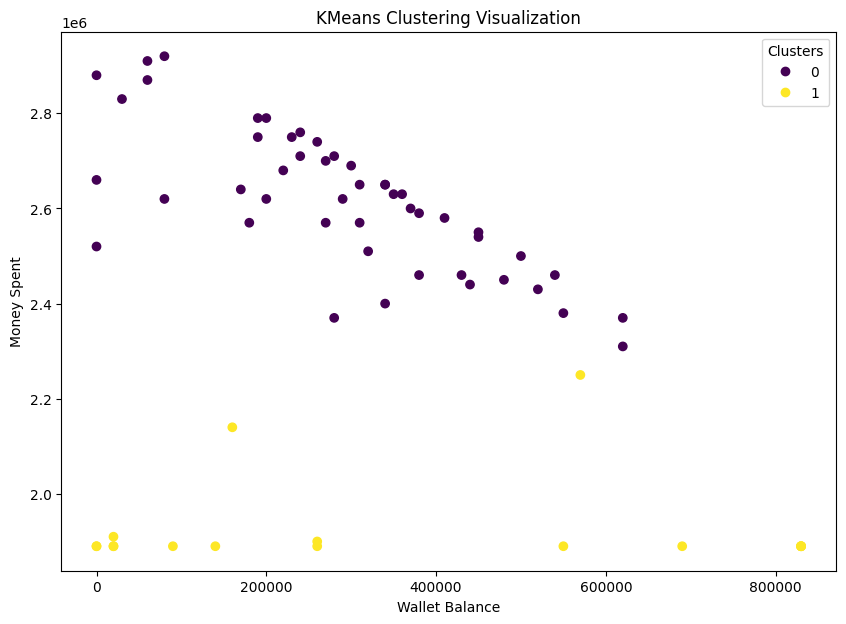

In [ ]:
# Visualisasi hasil clustering berdasarkan 'wallet_balance' dan 'money_spent'
plt.figure(figsize=(10, 7))
scatter = plt.scatter(grouped_94['wallet_balance'], grouped_94['money_spent'], c=grouped_94['Cluster_id'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization')
plt.xlabel('Wallet Balance')
plt.ylabel('Money Spent')
plt.show()

Karena dimensi data yang besar, kami mencoba memvisualisasikan dalam 2 dimensi saja menggunakan wallet_balance dan money spent. Dapat terlihat data tercluster dengan baik

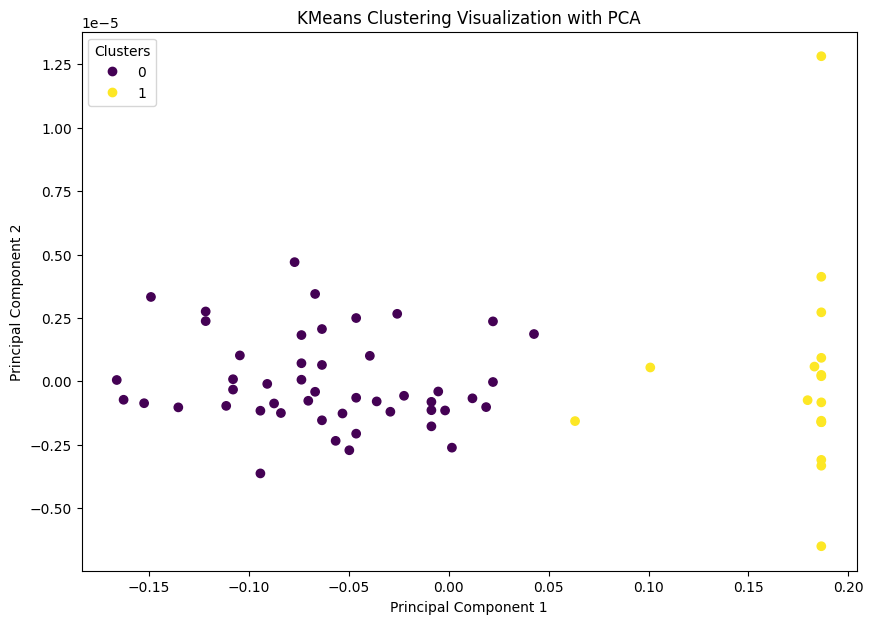

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Proyeksi data ke dalam dua dimensi menggunakan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(column_cluster_94)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Menambahkan label ke DataFrame PCA untuk visualisasi
pca_df['cluster_label'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'], c=pca_df['cluster_label'], cmap='viridis')

# Menambahkan legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Karena dimensi data yang sangat besar pula, kami menggunakan pca untuk memproyeksikan data menjadi dua dimensi saja. Dapat terlihat bahwa data terc;uster dengan baik